In [1]:
# Load imports

import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import os

In [211]:
ipd.Audio('dataset/sounds/100032-3-0-0.wav')

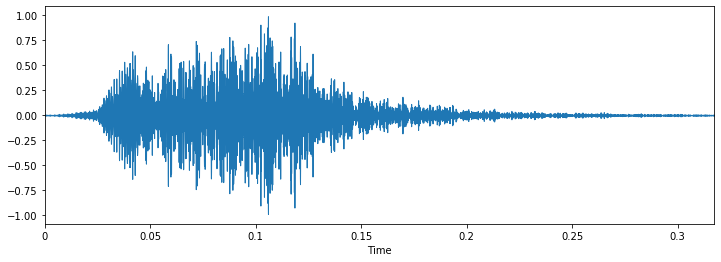

In [349]:
# Class: Dog barking

filename = 'dataset/sounds/100032-3-0-0.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)

In [7]:
import pandas as pd
metadata = pd.read_csv('dataset/metadata/urbansound8k.txt')
metadata.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

         class_name  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [8]:
print(metadata.class_name.value_counts())

air_conditioner     1000
engine_idling       1000
dog_bark            1000
street_music        1000
drilling            1000
jackhammer          1000
children_playing    1000
siren                929
car_horn             429
gun_shot             374
Name: class_name, dtype: int64


In [9]:
import struct

class WavFileHelper():
    
    def read_file_properties(self, filename):

        wave_file = open(filename,"rb")
        
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]

        return (num_channels, sample_rate, bit_depth)

In [10]:
wavfilehelper = WavFileHelper()

audiodata = []
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath('dataset/folds/'),'fold'+str(row["fold"])+'\\',str(row["slice_file_name"]))
    data = wavfilehelper.read_file_properties(file_name)
    audiodata.append(data)

    print(metadata)
# Convert into a Panda dataframe

         slice_file_name    fsID       start         end  salience  fold  \
0       100032-3-0-0.wav  100032    0.000000    0.317551         1     5   
1     100263-2-0-117.wav  100263   58.500000   62.500000         1     5   
2     100263-2-0-121.wav  100263   60.500000   64.500000         1     5   
3     100263-2-0-126.wav  100263   63.000000   67.000000         1     5   
4     100263-2-0-137.wav  100263   68.500000   72.500000         1     5   
...                  ...     ...         ...         ...       ...   ...   
8727     99812-1-2-0.wav   99812  159.522205  163.522205         2     7   
8728     99812-1-3-0.wav   99812  181.142431  183.284976         2     7   
8729     99812-1-4-0.wav   99812  242.691902  246.197885         2     7   
8730     99812-1-5-0.wav   99812  253.209850  255.741948         2     7   
8731     99812-1-6-0.wav   99812  332.289233  334.821332         2     7   

      classID        class_name  
0           3          dog_bark  
1           2  chil

         slice_file_name    fsID       start         end  salience  fold  \
0       100032-3-0-0.wav  100032    0.000000    0.317551         1     5   
1     100263-2-0-117.wav  100263   58.500000   62.500000         1     5   
2     100263-2-0-121.wav  100263   60.500000   64.500000         1     5   
3     100263-2-0-126.wav  100263   63.000000   67.000000         1     5   
4     100263-2-0-137.wav  100263   68.500000   72.500000         1     5   
...                  ...     ...         ...         ...       ...   ...   
8727     99812-1-2-0.wav   99812  159.522205  163.522205         2     7   
8728     99812-1-3-0.wav   99812  181.142431  183.284976         2     7   
8729     99812-1-4-0.wav   99812  242.691902  246.197885         2     7   
8730     99812-1-5-0.wav   99812  253.209850  255.741948         2     7   
8731     99812-1-6-0.wav   99812  332.289233  334.821332         2     7   

      classID        class_name  
0           3          dog_bark  
1           2  chil

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\100648-1-0-0.wav'

In [11]:
# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

In [12]:
print(audiodf.num_channels.value_counts(normalize=True))

2    1.0
Name: num_channels, dtype: float64


In [13]:
# sample rates 

print(audiodf.sample_rate.value_counts(normalize=True))

44100    1.0
Name: sample_rate, dtype: float64


In [187]:
# bit depth

print(audiodf.bit_depth.value_counts(normalize=True))

16    1.0
Name: bit_depth, dtype: float64


In [351]:
import librosa 
from scipy.io import wavfile as wav
import numpy as np

filename = 'dataset/folds/fold5/100263-2-0-117.wav'

librosa_audio, librosa_sample_rate = librosa.load(filename, res_type='kaiser_fast') 
scipy_sample_rate, scipy_audio = wav.read(filename) 

print('Original sample rate:', scipy_sample_rate) 
print('Librosa sample rate:', librosa_sample_rate)

Original sample rate: 44100
Librosa sample rate: 22050


In [352]:
print('Original audio file min~max range:', np.min(scipy_audio), 'to', np.max(scipy_audio))
print('Librosa audio file min~max range:', np.min(librosa_audio), 'to', np.max(librosa_audio))

Original audio file min~max range: -4461 to 3258
Librosa audio file min~max range: -0.06483523 to 0.05120339


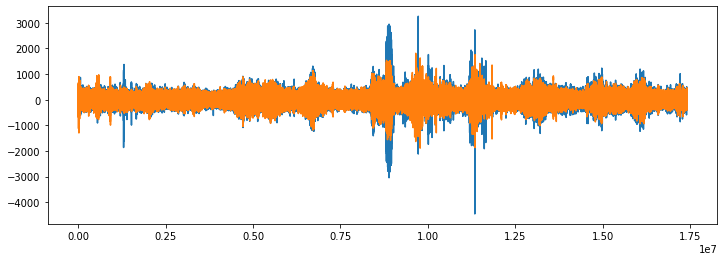

In [353]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)

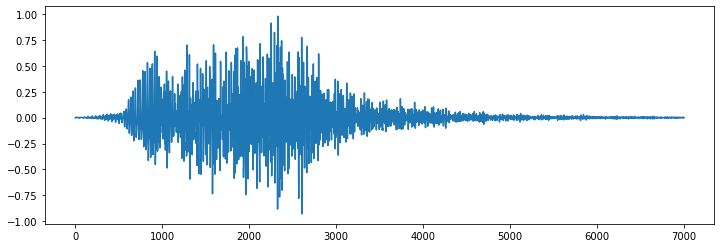

In [202]:
# Librosa audio with channels merged 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio)

In [203]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)
print(mfccs[0])

(40, 14)
[-306.77256932 -177.59208536  -99.13616999  -65.97198084  -49.2520268
  -59.58246675 -107.87768307 -167.95878741 -222.83724304 -273.53257113
 -320.83808984 -358.29947534 -391.58907556 -419.86180327]


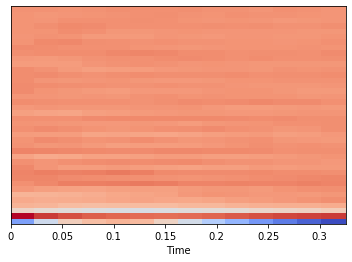

In [204]:
import librosa.display
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

In [105]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        print(e)
        print("-------")
        return None 
     
    return mfccsscaled

In [106]:
# Load various imports 
import pandas as pd
import os
import librosa

# Set the path to the full UrbanSound dataset 
fulldatasetpath = 'dataset/classified sounds/'

metadata = pd.read_csv('dataset/metadata/UrbanSound8K.txt')

features = []

nr = 0

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath('dataset/folds/'),'fold'+str(row["fold"])+'\\',str(row["slice_file_name"]))
    
    class_label = row["class_name"]
    data = extract_features(file_name)
    
    if data is not None:
        features.append([data, class_label])
    else:
        print("Data is None")
    
    nr = nr + 1
    fn = "{0}:{1}".format(nr, file_name)
    print(fn)

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')

1:D:\Development\Python\sound-classification\dataset\folds\fold5\100032-3-0-0.wav
2:D:\Development\Python\sound-classification\dataset\folds\fold5\100263-2-0-117.wav
3:D:\Development\Python\sound-classification\dataset\folds\fold5\100263-2-0-121.wav
4:D:\Development\Python\sound-classification\dataset\folds\fold5\100263-2-0-126.wav
5:D:\Development\Python\sound-classification\dataset\folds\fold5\100263-2-0-137.wav
6:D:\Development\Python\sound-classification\dataset\folds\fold5\100263-2-0-143.wav
7:D:\Development\Python\sound-classification\dataset\folds\fold5\100263-2-0-161.wav
8:D:\Development\Python\sound-classification\dataset\folds\fold5\100263-2-0-3.wav
9:D:\Development\Python\sound-classification\dataset\folds\fold5\100263-2-0-36.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\100648-1-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\100648-1-0-0.wav'
--

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\100852-0-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\100852-0-0-2.wav'
-------
Data is None
35:D:\Development\Python\sound-classification\dataset\folds\fold5\100852-0-0-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\100852-0-0-20.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\100852-0-0-20.wav'
-------
Data is None
36:D:\Development\Python\sound-classification\dataset\folds\fold5\100852-0-0-20.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\100852-0-0-21.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\100852-0-0-21.wav'
-------
Data is None
37:D:\Development\Python\sound-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\101382-2-0-20.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\101382-2-0-20.wav'
-------
Data is None
59:D:\Development\Python\sound-classification\dataset\folds\fold10\101382-2-0-20.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\101382-2-0-21.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\101382-2-0-21.wav'
-------
Data is None
60:D:\Development\Python\sound-classification\dataset\folds\fold10\101382-2-0-21.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\101382-2-0-29.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\101382-2-0-29.wav'
-------
Data is None
61:D:\Development\Py

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\102842-3-1-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\102842-3-1-6.wav'
-------
Data is None
114:D:\Development\Python\sound-classification\dataset\folds\fold1\102842-3-1-6.wav
115:D:\Development\Python\sound-classification\dataset\folds\fold7\102853-8-0-0.wav
116:D:\Development\Python\sound-classification\dataset\folds\fold7\102853-8-0-1.wav
117:D:\Development\Python\sound-classification\dataset\folds\fold7\102853-8-0-2.wav
118:D:\Development\Python\sound-classification\dataset\folds\fold7\102853-8-0-3.wav
119:D:\Development\Python\sound-classification\dataset\folds\fold7\102853-8-0-4.wav
120:D:\Development\Python\sound-classification\dataset\folds\fold7\102853-8-0-5.wav
121:D:\Development\Python\sound-classification\dataset\folds\fold7\102853-8-0-6.wav
122:D:\Development\Python\sound-classification\dataset\folds\f

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\103199-4-0-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\103199-4-0-6.wav'
-------
Data is None
201:D:\Development\Python\sound-classification\dataset\folds\fold3\103199-4-0-6.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\103199-4-1-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\103199-4-1-0.wav'
-------
Data is None
202:D:\Development\Python\sound-classification\dataset\folds\fold3\103199-4-1-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\103199-4-2-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\103199-4-2-0.wav'
-------
Data is None
203:D:\Development\Python\sound-cl

245:D:\Development\Python\sound-classification\dataset\folds\fold1\103258-5-0-15.wav
246:D:\Development\Python\sound-classification\dataset\folds\fold1\103258-5-0-16.wav
247:D:\Development\Python\sound-classification\dataset\folds\fold1\103258-5-0-17.wav
248:D:\Development\Python\sound-classification\dataset\folds\fold1\103258-5-0-18.wav
249:D:\Development\Python\sound-classification\dataset\folds\fold1\103258-5-0-19.wav
250:D:\Development\Python\sound-classification\dataset\folds\fold1\103258-5-0-2.wav
251:D:\Development\Python\sound-classification\dataset\folds\fold1\103258-5-0-3.wav
252:D:\Development\Python\sound-classification\dataset\folds\fold1\103258-5-0-4.wav
253:D:\Development\Python\sound-classification\dataset\folds\fold1\103258-5-0-5.wav
254:D:\Development\Python\sound-classification\dataset\folds\fold1\103258-5-0-6.wav
255:D:\Development\Python\sound-classification\dataset\folds\fold1\103258-5-0-7.wav
256:D:\Development\Python\sound-classification\dataset\folds\fold1\1032

317:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-11-2.wav
318:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-12-2.wav
319:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-14-1.wav
320:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-14-5.wav
321:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-14-6.wav
322:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-15-1.wav
323:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-15-3.wav
324:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-15-5.wav
325:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-15-9.wav
326:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-16-0.wav
327:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-16-10.wav
328:D:\Development\Python\sound-classification\dataset\folds\fol

414:D:\Development\Python\sound-classification\dataset\folds\fold9\105029-7-4-0.wav
415:D:\Development\Python\sound-classification\dataset\folds\fold9\105029-7-4-1.wav
416:D:\Development\Python\sound-classification\dataset\folds\fold9\105029-7-4-2.wav
417:D:\Development\Python\sound-classification\dataset\folds\fold9\105029-7-4-3.wav
418:D:\Development\Python\sound-classification\dataset\folds\fold9\105088-3-0-10.wav
419:D:\Development\Python\sound-classification\dataset\folds\fold9\105088-3-0-11.wav
420:D:\Development\Python\sound-classification\dataset\folds\fold9\105088-3-0-19.wav
421:D:\Development\Python\sound-classification\dataset\folds\fold9\105088-3-0-8.wav
422:D:\Development\Python\sound-classification\dataset\folds\fold7\105289-8-0-0.wav
423:D:\Development\Python\sound-classification\dataset\folds\fold7\105289-8-0-1.wav
424:D:\Development\Python\sound-classification\dataset\folds\fold7\105289-8-0-2.wav
425:D:\Development\Python\sound-classification\dataset\folds\fold7\105289

458:D:\Development\Python\sound-classification\dataset\folds\fold10\106014-5-0-0.wav
459:D:\Development\Python\sound-classification\dataset\folds\fold10\106014-5-0-1.wav
460:D:\Development\Python\sound-classification\dataset\folds\fold10\106014-5-0-2.wav
461:D:\Development\Python\sound-classification\dataset\folds\fold10\106014-5-0-3.wav
462:D:\Development\Python\sound-classification\dataset\folds\fold10\106014-5-0-4.wav
463:D:\Development\Python\sound-classification\dataset\folds\fold2\106015-5-0-0.wav
464:D:\Development\Python\sound-classification\dataset\folds\fold2\106015-5-0-1.wav
465:D:\Development\Python\sound-classification\dataset\folds\fold2\106015-5-0-10.wav
466:D:\Development\Python\sound-classification\dataset\folds\fold2\106015-5-0-11.wav
467:D:\Development\Python\sound-classification\dataset\folds\fold2\106015-5-0-12.wav
468:D:\Development\Python\sound-classification\dataset\folds\fold2\106015-5-0-13.wav
469:D:\Development\Python\sound-classification\dataset\folds\fold2\

515:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-0-6.wav
516:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-0-7.wav
517:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-0-8.wav
518:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-1-0.wav
519:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-1-1.wav
520:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-1-10.wav
521:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-1-11.wav
522:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-1-12.wav
523:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-1-13.wav
524:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-1-14.wav
525:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-1-15.wav
526:D:\Development\Python\sound-classification\dataset\folds\fold7\107

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\109233-3-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\109233-3-0-3.wav'
-------
Data is None
584:D:\Development\Python\sound-classification\dataset\folds\fold6\109233-3-0-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\109233-3-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\109233-3-0-4.wav'
-------
Data is None
585:D:\Development\Python\sound-classification\dataset\folds\fold6\109233-3-0-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\109233-3-0-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\109233-3-0-5.wav'
-------
Data is None
586:D:\Development\Python\sound-cl

623:D:\Development\Python\sound-classification\dataset\folds\fold7\110918-3-0-1.wav
624:D:\Development\Python\sound-classification\dataset\folds\fold7\110918-3-0-26.wav
625:D:\Development\Python\sound-classification\dataset\folds\fold7\110918-3-0-40.wav
626:D:\Development\Python\sound-classification\dataset\folds\fold7\110918-3-0-9.wav
627:D:\Development\Python\sound-classification\dataset\folds\fold6\111048-6-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\111386-5-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\111386-5-0-0.wav'
-------
Data is None
628:D:\Development\Python\sound-classification\dataset\folds\fold6\111386-5-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\111386-5-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\1

651:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-0.wav
652:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-1.wav
653:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-10.wav
654:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-11.wav
655:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-12.wav
656:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-13.wav
657:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-14.wav
658:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-15.wav
659:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-16.wav
660:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-17.wav
661:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-18.wav
662:D:\Development\Python\sound-classification\dataset\folds\fold5\

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\113202-5-0-11.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\113202-5-0-11.wav'
-------
Data is None
693:D:\Development\Python\sound-classification\dataset\folds\fold8\113202-5-0-11.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\113202-5-0-12.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\113202-5-0-12.wav'
-------
Data is None
694:D:\Development\Python\sound-classification\dataset\folds\fold8\113202-5-0-12.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\113202-5-0-13.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\113202-5-0-13.wav'
-------
Data is None
695:D:\Development\Python\

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\113202-5-0-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\113202-5-0-8.wav'
-------
Data is None
717:D:\Development\Python\sound-classification\dataset\folds\fold8\113202-5-0-8.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\113202-5-0-9.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\113202-5-0-9.wav'
-------
Data is None
718:D:\Development\Python\sound-classification\dataset\folds\fold8\113202-5-0-9.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\113203-5-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\113203-5-0-0.wav'
-------
Data is None
719:D:\Development\Python\sound-cl

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\113205-5-1-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\113205-5-1-1.wav'
-------
Data is None
741:D:\Development\Python\sound-classification\dataset\folds\fold1\113205-5-1-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\113205-5-1-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\113205-5-1-2.wav'
-------
Data is None
742:D:\Development\Python\sound-classification\dataset\folds\fold1\113205-5-1-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\113205-5-1-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\113205-5-1-3.wav'
-------
Data is None
743:D:\Development\Python\sound-cl

794:D:\Development\Python\sound-classification\dataset\folds\fold6\115243-9-0-0.wav
795:D:\Development\Python\sound-classification\dataset\folds\fold6\115243-9-0-16.wav
796:D:\Development\Python\sound-classification\dataset\folds\fold6\115243-9-0-4.wav
797:D:\Development\Python\sound-classification\dataset\folds\fold6\115243-9-0-46.wav
798:D:\Development\Python\sound-classification\dataset\folds\fold6\115243-9-0-81.wav
799:D:\Development\Python\sound-classification\dataset\folds\fold6\115243-9-0-94.wav
800:D:\Development\Python\sound-classification\dataset\folds\fold7\115411-3-0-0.wav
801:D:\Development\Python\sound-classification\dataset\folds\fold7\115411-3-2-0.wav
802:D:\Development\Python\sound-classification\dataset\folds\fold7\115411-3-3-0.wav
803:D:\Development\Python\sound-classification\dataset\folds\fold4\115415-9-0-0.wav
804:D:\Development\Python\sound-classification\dataset\folds\fold4\115415-9-0-1.wav
805:D:\Development\Python\sound-classification\dataset\folds\fold4\11541

866:D:\Development\Python\sound-classification\dataset\folds\fold6\117271-3-0-1.wav
867:D:\Development\Python\sound-classification\dataset\folds\fold6\117271-3-0-2.wav
868:D:\Development\Python\sound-classification\dataset\folds\fold6\117271-3-0-3.wav
869:D:\Development\Python\sound-classification\dataset\folds\fold4\117536-1-0-0.wav
870:D:\Development\Python\sound-classification\dataset\folds\fold10\117889-9-0-12.wav
871:D:\Development\Python\sound-classification\dataset\folds\fold10\117889-9-0-20.wav
872:D:\Development\Python\sound-classification\dataset\folds\fold10\117889-9-0-30.wav
873:D:\Development\Python\sound-classification\dataset\folds\fold10\117889-9-0-36.wav
874:D:\Development\Python\sound-classification\dataset\folds\fold10\117889-9-0-39.wav
875:D:\Development\Python\sound-classification\dataset\folds\fold10\117889-9-0-40.wav
876:D:\Development\Python\sound-classification\dataset\folds\fold3\118070-1-0-0.wav
877:D:\Development\Python\sound-classification\dataset\folds\fol

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\118558-5-1-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\118558-5-1-2.wav'
-------
Data is None
927:D:\Development\Python\sound-classification\dataset\folds\fold10\118558-5-1-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\118558-5-2-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\118558-5-2-0.wav'
-------
Data is None
928:D:\Development\Python\sound-classification\dataset\folds\fold10\118558-5-2-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\118558-5-2-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\118558-5-2-1.wav'
-------
Data is None
929:D:\Development\Python\

967:D:\Development\Python\sound-classification\dataset\folds\fold6\121285-0-0-0.wav
968:D:\Development\Python\sound-classification\dataset\folds\fold6\121285-0-0-1.wav
969:D:\Development\Python\sound-classification\dataset\folds\fold6\121285-0-0-2.wav
970:D:\Development\Python\sound-classification\dataset\folds\fold6\121285-0-0-3.wav
971:D:\Development\Python\sound-classification\dataset\folds\fold6\121285-0-0-4.wav
972:D:\Development\Python\sound-classification\dataset\folds\fold6\121285-0-0-5.wav
973:D:\Development\Python\sound-classification\dataset\folds\fold6\121285-0-0-6.wav
974:D:\Development\Python\sound-classification\dataset\folds\fold6\121285-0-0-7.wav
975:D:\Development\Python\sound-classification\dataset\folds\fold6\121285-0-0-8.wav
976:D:\Development\Python\sound-classification\dataset\folds\fold6\121285-0-0-9.wav
977:D:\Development\Python\sound-classification\dataset\folds\fold5\121286-0-0-0.wav
978:D:\Development\Python\sound-classification\dataset\folds\fold5\121286-0-

1048:D:\Development\Python\sound-classification\dataset\folds\fold2\123688-8-1-4.wav
1049:D:\Development\Python\sound-classification\dataset\folds\fold2\123688-8-1-5.wav
1050:D:\Development\Python\sound-classification\dataset\folds\fold2\123688-8-2-0.wav
1051:D:\Development\Python\sound-classification\dataset\folds\fold2\123688-8-2-1.wav
1052:D:\Development\Python\sound-classification\dataset\folds\fold2\123688-8-2-2.wav
1053:D:\Development\Python\sound-classification\dataset\folds\fold2\123688-8-2-3.wav
1054:D:\Development\Python\sound-classification\dataset\folds\fold2\123688-8-2-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\124389-8-1-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\124389-8-1-0.wav'
-------
Data is None
1055:D:\Development\Python\sound-classification\dataset\folds\fold6\124389-8-1-0.wav
Error encountered while parsing file:  D:\Development\

1085:D:\Development\Python\sound-classification\dataset\folds\fold3\125523-3-0-1.wav
1086:D:\Development\Python\sound-classification\dataset\folds\fold3\125523-3-0-11.wav
1087:D:\Development\Python\sound-classification\dataset\folds\fold3\125523-3-0-3.wav
1088:D:\Development\Python\sound-classification\dataset\folds\fold6\125554-3-0-0.wav
1089:D:\Development\Python\sound-classification\dataset\folds\fold6\125574-3-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\125678-7-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\125678-7-0-0.wav'
-------
Data is None
1090:D:\Development\Python\sound-classification\dataset\folds\fold8\125678-7-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\125678-7-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fol

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\125678-7-2-7.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\125678-7-2-7.wav'
-------
Data is None
1116:D:\Development\Python\sound-classification\dataset\folds\fold8\125678-7-2-7.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\125678-7-2-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\125678-7-2-8.wav'
-------
Data is None
1117:D:\Development\Python\sound-classification\dataset\folds\fold8\125678-7-2-8.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\125678-7-3-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\125678-7-3-0.wav'
-------
Data is None
1118:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\126153-9-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\126153-9-0-1.wav'
-------
Data is None
1140:D:\Development\Python\sound-classification\dataset\folds\fold8\126153-9-0-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\126153-9-0-11.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\126153-9-0-11.wav'
-------
Data is None
1141:D:\Development\Python\sound-classification\dataset\folds\fold8\126153-9-0-11.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\126153-9-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\126153-9-0-4.wav'
-------
Data is None
1142:D:\Development\Python\so

1193:D:\Development\Python\sound-classification\dataset\folds\fold4\128160-5-0-3.wav
1194:D:\Development\Python\sound-classification\dataset\folds\fold4\128160-5-0-4.wav
1195:D:\Development\Python\sound-classification\dataset\folds\fold4\128160-5-0-5.wav
1196:D:\Development\Python\sound-classification\dataset\folds\fold4\128160-5-0-6.wav
1197:D:\Development\Python\sound-classification\dataset\folds\fold4\128160-5-0-7.wav
1198:D:\Development\Python\sound-classification\dataset\folds\fold4\128160-5-0-8.wav
1199:D:\Development\Python\sound-classification\dataset\folds\fold4\128160-5-0-9.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\128240-3-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\128240-3-0-1.wav'
-------
Data is None
1200:D:\Development\Python\sound-classification\dataset\folds\fold10\128240-3-0-1.wav
Error encountered while parsing file:  D:\Developme

1249:D:\Development\Python\sound-classification\dataset\folds\fold7\130961-4-1-4.wav
1250:D:\Development\Python\sound-classification\dataset\folds\fold7\130961-4-2-1.wav
1251:D:\Development\Python\sound-classification\dataset\folds\fold7\130961-4-2-2.wav
1252:D:\Development\Python\sound-classification\dataset\folds\fold7\130961-4-3-0.wav
1253:D:\Development\Python\sound-classification\dataset\folds\fold7\130961-4-3-1.wav
1254:D:\Development\Python\sound-classification\dataset\folds\fold7\130961-4-3-2.wav
1255:D:\Development\Python\sound-classification\dataset\folds\fold7\130961-4-4-0.wav
1256:D:\Development\Python\sound-classification\dataset\folds\fold7\130961-4-5-0.wav
1257:D:\Development\Python\sound-classification\dataset\folds\fold7\130961-4-5-1.wav
1258:D:\Development\Python\sound-classification\dataset\folds\fold7\130961-4-5-2.wav
1259:D:\Development\Python\sound-classification\dataset\folds\fold7\130961-4-5-3.wav
1260:D:\Development\Python\sound-classification\dataset\folds\fol

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\132021-7-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\132021-7-0-0.wav'
-------
Data is None
1294:D:\Development\Python\sound-classification\dataset\folds\fold6\132021-7-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\132021-7-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\132021-7-0-1.wav'
-------
Data is None
1295:D:\Development\Python\sound-classification\dataset\folds\fold6\132021-7-0-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\132021-7-0-10.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\132021-7-0-10.wav'
-------
Data is None
1296:D:\Development\Python\sou

1325:D:\Development\Python\sound-classification\dataset\folds\fold6\132162-9-1-68.wav
1326:D:\Development\Python\sound-classification\dataset\folds\fold6\132162-9-1-73.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\13230-0-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\13230-0-0-1.wav'
-------
Data is None
1327:D:\Development\Python\sound-classification\dataset\folds\fold3\13230-0-0-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\13230-0-0-10.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\13230-0-0-10.wav'
-------
Data is None
1328:D:\Development\Python\sound-classification\dataset\folds\fold3\13230-0-0-10.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\13230-0-0-11.wav
[Errno 2] 

1351:D:\Development\Python\sound-classification\dataset\folds\fold3\132855-2-0-113.wav
1352:D:\Development\Python\sound-classification\dataset\folds\fold3\132855-2-0-41.wav
1353:D:\Development\Python\sound-classification\dataset\folds\fold3\132855-2-0-58.wav
1354:D:\Development\Python\sound-classification\dataset\folds\fold3\132855-2-0-70.wav
1355:D:\Development\Python\sound-classification\dataset\folds\fold3\132855-2-0-77.wav
1356:D:\Development\Python\sound-classification\dataset\folds\fold3\132855-2-0-88.wav
1357:D:\Development\Python\sound-classification\dataset\folds\fold3\132855-2-0-90.wav
1358:D:\Development\Python\sound-classification\dataset\folds\fold3\132855-2-0-99.wav
1359:D:\Development\Python\sound-classification\dataset\folds\fold8\133090-2-0-14.wav
1360:D:\Development\Python\sound-classification\dataset\folds\fold8\133090-2-0-20.wav
1361:D:\Development\Python\sound-classification\dataset\folds\fold8\133090-2-0-28.wav
1362:D:\Development\Python\sound-classification\datas

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\135526-6-3-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\135526-6-3-0.wav'
-------
Data is None
1428:D:\Development\Python\sound-classification\dataset\folds\fold3\135526-6-3-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\135526-6-4-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\135526-6-4-0.wav'
-------
Data is None
1429:D:\Development\Python\sound-classification\dataset\folds\fold3\135526-6-4-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\135526-6-5-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\135526-6-5-0.wav'
-------
Data is None
1430:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\135527-6-2-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\135527-6-2-0.wav'
-------
Data is None
1452:D:\Development\Python\sound-classification\dataset\folds\fold7\135527-6-2-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\135527-6-3-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\135527-6-3-0.wav'
-------
Data is None
1453:D:\Development\Python\sound-classification\dataset\folds\fold7\135527-6-3-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\135527-6-4-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\135527-6-4-0.wav'
-------
Data is None
1454:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\135544-6-1-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\135544-6-1-0.wav'
-------
Data is None
1476:D:\Development\Python\sound-classification\dataset\folds\fold6\135544-6-1-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\135544-6-10-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\135544-6-10-0.wav'
-------
Data is None
1477:D:\Development\Python\sound-classification\dataset\folds\fold6\135544-6-10-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\135544-6-11-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\135544-6-11-0.wav'
-------
Data is None
1478:D:\Development\Python\

1504:D:\Development\Python\sound-classification\dataset\folds\fold1\135776-2-0-85.wav
1505:D:\Development\Python\sound-classification\dataset\folds\fold1\135776-2-0-90.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\13579-2-0-15.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\13579-2-0-15.wav'
-------
Data is None
1506:D:\Development\Python\sound-classification\dataset\folds\fold9\13579-2-0-15.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\13579-2-0-16.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\13579-2-0-16.wav'
-------
Data is None
1507:D:\Development\Python\sound-classification\dataset\folds\fold9\13579-2-0-16.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\13579-2-0-17.wav
[Errno 

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\137971-2-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\137971-2-0-0.wav'
-------
Data is None
1558:D:\Development\Python\sound-classification\dataset\folds\fold4\137971-2-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\137971-2-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\137971-2-0-2.wav'
-------
Data is None
1559:D:\Development\Python\sound-classification\dataset\folds\fold4\137971-2-0-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\137971-2-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\137971-2-0-3.wav'
-------
Data is None
1560:D:\Development\Python\sound

1590:D:\Development\Python\sound-classification\dataset\folds\fold8\139000-4-0-0.wav
1591:D:\Development\Python\sound-classification\dataset\folds\fold8\139000-4-0-1.wav
1592:D:\Development\Python\sound-classification\dataset\folds\fold8\139000-4-0-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\139665-9-0-19.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\139665-9-0-19.wav'
-------
Data is None
1593:D:\Development\Python\sound-classification\dataset\folds\fold5\139665-9-0-19.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\139665-9-0-23.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\139665-9-0-23.wav'
-------
Data is None
1594:D:\Development\Python\sound-classification\dataset\folds\fold5\139665-9-0-23.wav
Error encountered while parsing file:

1630:D:\Development\Python\sound-classification\dataset\folds\fold8\142003-2-0-0.wav
1631:D:\Development\Python\sound-classification\dataset\folds\fold8\142003-2-0-1.wav
1632:D:\Development\Python\sound-classification\dataset\folds\fold8\142003-2-0-19.wav
1633:D:\Development\Python\sound-classification\dataset\folds\fold8\142003-2-0-20.wav
1634:D:\Development\Python\sound-classification\dataset\folds\fold8\142003-2-0-21.wav
1635:D:\Development\Python\sound-classification\dataset\folds\fold8\142003-2-0-24.wav
1636:D:\Development\Python\sound-classification\dataset\folds\fold8\142003-2-0-30.wav
1637:D:\Development\Python\sound-classification\dataset\folds\fold8\142003-2-0-8.wav
1638:D:\Development\Python\sound-classification\dataset\folds\fold10\142641-3-0-0.wav
1639:D:\Development\Python\sound-classification\dataset\folds\fold6\143115-1-0-0.wav
1640:D:\Development\Python\sound-classification\dataset\folds\fold6\143115-1-1-0.wav
1641:D:\Development\Python\sound-classification\dataset\fol

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\144007-5-0-11.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\144007-5-0-11.wav'
-------
Data is None
1682:D:\Development\Python\sound-classification\dataset\folds\fold4\144007-5-0-11.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\144007-5-0-12.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\144007-5-0-12.wav'
-------
Data is None
1683:D:\Development\Python\sound-classification\dataset\folds\fold4\144007-5-0-12.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\144007-5-0-13.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\144007-5-0-13.wav'
-------
Data is None
1684:D:\Development\Pyth

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\144007-5-1-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\144007-5-1-3.wav'
-------
Data is None
1706:D:\Development\Python\sound-classification\dataset\folds\fold4\144007-5-1-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\144007-5-1-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\144007-5-1-4.wav'
-------
Data is None
1707:D:\Development\Python\sound-classification\dataset\folds\fold4\144007-5-1-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\144007-5-1-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\144007-5-1-5.wav'
-------
Data is None
1708:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\14468-3-1-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\14468-3-1-0.wav'
-------
Data is None
1772:D:\Development\Python\sound-classification\dataset\folds\fold10\14468-3-1-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\14468-3-5-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\14468-3-5-0.wav'
-------
Data is None
1773:D:\Development\Python\sound-classification\dataset\folds\fold10\14468-3-5-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\14470-2-0-10.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\14470-2-0-10.wav'
-------
Data is None
1774:D:\Development\Python\sou

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\145390-9-0-7.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\145390-9-0-7.wav'
-------
Data is None
1803:D:\Development\Python\sound-classification\dataset\folds\fold9\145390-9-0-7.wav
1804:D:\Development\Python\sound-classification\dataset\folds\fold2\145577-1-0-0.wav
1805:D:\Development\Python\sound-classification\dataset\folds\fold2\145608-6-0-0.wav
1806:D:\Development\Python\sound-classification\dataset\folds\fold2\145608-6-1-0.wav
1807:D:\Development\Python\sound-classification\dataset\folds\fold2\145608-6-2-0.wav
1808:D:\Development\Python\sound-classification\dataset\folds\fold2\145608-6-3-0.wav
1809:D:\Development\Python\sound-classification\dataset\folds\fold5\145609-6-0-0.wav
1810:D:\Development\Python\sound-classification\dataset\folds\fold5\145609-6-1-0.wav
1811:D:\Development\Python\sound-classification\datase

1896:D:\Development\Python\sound-classification\dataset\folds\fold3\146714-0-0-18.wav
1897:D:\Development\Python\sound-classification\dataset\folds\fold3\146714-0-0-2.wav
1898:D:\Development\Python\sound-classification\dataset\folds\fold3\146714-0-0-21.wav
1899:D:\Development\Python\sound-classification\dataset\folds\fold3\146714-0-0-22.wav
1900:D:\Development\Python\sound-classification\dataset\folds\fold3\146714-0-0-27.wav
1901:D:\Development\Python\sound-classification\dataset\folds\fold3\146714-0-0-33.wav
1902:D:\Development\Python\sound-classification\dataset\folds\fold3\146714-0-0-35.wav
1903:D:\Development\Python\sound-classification\dataset\folds\fold3\146714-0-0-36.wav
1904:D:\Development\Python\sound-classification\dataset\folds\fold3\146714-0-0-38.wav
1905:D:\Development\Python\sound-classification\dataset\folds\fold3\146714-0-0-41.wav
1906:D:\Development\Python\sound-classification\dataset\folds\fold3\146714-0-0-43.wav
1907:D:\Development\Python\sound-classification\dataset

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\14772-7-7-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\14772-7-7-0.wav'
-------
Data is None
1966:D:\Development\Python\sound-classification\dataset\folds\fold7\14772-7-7-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\14772-7-8-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\14772-7-8-0.wav'
-------
Data is None
1967:D:\Development\Python\sound-classification\dataset\folds\fold7\14772-7-8-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\14772-7-9-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\14772-7-9-0.wav'
-------
Data is None
1968:D:\Development\Python\sound-classif

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\148827-6-3-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\148827-6-3-0.wav'
-------
Data is None
2044:D:\Development\Python\sound-classification\dataset\folds\fold7\148827-6-3-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\148827-6-4-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\148827-6-4-0.wav'
-------
Data is None
2045:D:\Development\Python\sound-classification\dataset\folds\fold7\148827-6-4-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\148828-6-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\148828-6-0-0.wav'
-------
Data is None
2046:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\149193-5-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\149193-5-0-2.wav'
-------
Data is None
2068:D:\Development\Python\sound-classification\dataset\folds\fold7\149193-5-0-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\149193-5-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\149193-5-0-3.wav'
-------
Data is None
2069:D:\Development\Python\sound-classification\dataset\folds\fold7\149193-5-0-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\149193-5-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\149193-5-0-4.wav'
-------
Data is None
2070:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\151005-4-2-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\151005-4-2-0.wav'
-------
Data is None
2105:D:\Development\Python\sound-classification\dataset\folds\fold4\151005-4-2-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\151005-4-2-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\151005-4-2-1.wav'
-------
Data is None
2106:D:\Development\Python\sound-classification\dataset\folds\fold4\151005-4-2-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\151005-4-3-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\151005-4-3-0.wav'
-------
Data is None
2107:D:\Development\Python\sound

2175:D:\Development\Python\sound-classification\dataset\folds\fold4\154758-5-0-0.wav
2176:D:\Development\Python\sound-classification\dataset\folds\fold4\154758-5-0-1.wav
2177:D:\Development\Python\sound-classification\dataset\folds\fold4\154758-5-0-10.wav
2178:D:\Development\Python\sound-classification\dataset\folds\fold4\154758-5-0-11.wav
2179:D:\Development\Python\sound-classification\dataset\folds\fold4\154758-5-0-12.wav
2180:D:\Development\Python\sound-classification\dataset\folds\fold4\154758-5-0-13.wav
2181:D:\Development\Python\sound-classification\dataset\folds\fold4\154758-5-0-14.wav
2182:D:\Development\Python\sound-classification\dataset\folds\fold4\154758-5-0-15.wav
2183:D:\Development\Python\sound-classification\dataset\folds\fold4\154758-5-0-16.wav
2184:D:\Development\Python\sound-classification\dataset\folds\fold4\154758-5-0-17.wav
2185:D:\Development\Python\sound-classification\dataset\folds\fold4\154758-5-0-18.wav
2186:D:\Development\Python\sound-classification\dataset\

2271:D:\Development\Python\sound-classification\dataset\folds\fold5\155243-9-0-53.wav
2272:D:\Development\Python\sound-classification\dataset\folds\fold5\155243-9-0-55.wav
2273:D:\Development\Python\sound-classification\dataset\folds\fold10\155262-2-0-101.wav
2274:D:\Development\Python\sound-classification\dataset\folds\fold10\155262-2-0-11.wav
2275:D:\Development\Python\sound-classification\dataset\folds\fold10\155262-2-0-15.wav
2276:D:\Development\Python\sound-classification\dataset\folds\fold10\155262-2-0-2.wav
2277:D:\Development\Python\sound-classification\dataset\folds\fold10\155262-2-0-21.wav
2278:D:\Development\Python\sound-classification\dataset\folds\fold10\155262-2-0-48.wav
2279:D:\Development\Python\sound-classification\dataset\folds\fold10\155262-2-0-58.wav
2280:D:\Development\Python\sound-classification\dataset\folds\fold10\155262-2-0-63.wav
2281:D:\Development\Python\sound-classification\dataset\folds\fold3\155263-2-0-12.wav
2282:D:\Development\Python\sound-classificatio

2346:D:\Development\Python\sound-classification\dataset\folds\fold8\156358-5-0-1.wav
2347:D:\Development\Python\sound-classification\dataset\folds\fold8\156358-5-0-2.wav
2348:D:\Development\Python\sound-classification\dataset\folds\fold8\156358-5-0-3.wav
2349:D:\Development\Python\sound-classification\dataset\folds\fold8\156358-5-0-4.wav
2350:D:\Development\Python\sound-classification\dataset\folds\fold8\156358-5-0-5.wav
2351:D:\Development\Python\sound-classification\dataset\folds\fold8\156358-5-0-6.wav
2352:D:\Development\Python\sound-classification\dataset\folds\fold4\156362-4-0-0.wav
2353:D:\Development\Python\sound-classification\dataset\folds\fold4\156362-4-0-1.wav
2354:D:\Development\Python\sound-classification\dataset\folds\fold4\156362-4-0-2.wav
2355:D:\Development\Python\sound-classification\dataset\folds\fold4\156362-4-0-3.wav
2356:D:\Development\Python\sound-classification\dataset\folds\fold4\156362-4-1-0.wav
2357:D:\Development\Python\sound-classification\dataset\folds\fol

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\156869-8-0-7.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\156869-8-0-7.wav'
-------
Data is None
2409:D:\Development\Python\sound-classification\dataset\folds\fold5\156869-8-0-7.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\156869-8-0-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\156869-8-0-8.wav'
-------
Data is None
2410:D:\Development\Python\sound-classification\dataset\folds\fold5\156869-8-0-8.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\156869-8-0-9.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\156869-8-0-9.wav'
-------
Data is None
2411:D:\Development\Python\sound

2471:D:\Development\Python\sound-classification\dataset\folds\fold9\157866-8-0-26.wav
2472:D:\Development\Python\sound-classification\dataset\folds\fold9\157866-8-0-27.wav
2473:D:\Development\Python\sound-classification\dataset\folds\fold9\157866-8-0-3.wav
2474:D:\Development\Python\sound-classification\dataset\folds\fold9\157866-8-0-4.wav
2475:D:\Development\Python\sound-classification\dataset\folds\fold9\157866-8-0-5.wav
2476:D:\Development\Python\sound-classification\dataset\folds\fold9\157866-8-0-6.wav
2477:D:\Development\Python\sound-classification\dataset\folds\fold9\157866-8-0-7.wav
2478:D:\Development\Python\sound-classification\dataset\folds\fold9\157866-8-0-8.wav
2479:D:\Development\Python\sound-classification\dataset\folds\fold9\157866-8-0-9.wav
2480:D:\Development\Python\sound-classification\dataset\folds\fold1\157867-8-0-0.wav
2481:D:\Development\Python\sound-classification\dataset\folds\fold1\157867-8-0-1.wav
2482:D:\Development\Python\sound-classification\dataset\folds\f

2567:D:\Development\Python\sound-classification\dataset\folds\fold4\158608-8-0-4.wav
2568:D:\Development\Python\sound-classification\dataset\folds\fold4\158608-8-0-5.wav
2569:D:\Development\Python\sound-classification\dataset\folds\fold4\158608-8-0-6.wav
2570:D:\Development\Python\sound-classification\dataset\folds\fold4\158608-8-0-7.wav
2571:D:\Development\Python\sound-classification\dataset\folds\fold4\158608-8-0-8.wav
2572:D:\Development\Python\sound-classification\dataset\folds\fold4\158608-8-0-9.wav
2573:D:\Development\Python\sound-classification\dataset\folds\fold4\158977-6-0-0.wav
2574:D:\Development\Python\sound-classification\dataset\folds\fold7\158978-6-0-0.wav
2575:D:\Development\Python\sound-classification\dataset\folds\fold6\158979-6-0-0.wav
2576:D:\Development\Python\sound-classification\dataset\folds\fold4\159176-3-0-0.wav
2577:D:\Development\Python\sound-classification\dataset\folds\fold5\159439-2-0-0.wav
2578:D:\Development\Python\sound-classification\dataset\folds\fol

2663:D:\Development\Python\sound-classification\dataset\folds\fold9\159744-8-0-13.wav
2664:D:\Development\Python\sound-classification\dataset\folds\fold9\159744-8-0-2.wav
2665:D:\Development\Python\sound-classification\dataset\folds\fold9\159744-8-0-3.wav
2666:D:\Development\Python\sound-classification\dataset\folds\fold9\159744-8-0-4.wav
2667:D:\Development\Python\sound-classification\dataset\folds\fold9\159744-8-0-5.wav
2668:D:\Development\Python\sound-classification\dataset\folds\fold9\159744-8-0-6.wav
2669:D:\Development\Python\sound-classification\dataset\folds\fold9\159744-8-0-7.wav
2670:D:\Development\Python\sound-classification\dataset\folds\fold9\159744-8-0-8.wav
2671:D:\Development\Python\sound-classification\dataset\folds\fold9\159744-8-0-9.wav
2672:D:\Development\Python\sound-classification\dataset\folds\fold9\159745-8-0-0.wav
2673:D:\Development\Python\sound-classification\dataset\folds\fold9\159745-8-1-0.wav
2674:D:\Development\Python\sound-classification\dataset\folds\fo

2760:D:\Development\Python\sound-classification\dataset\folds\fold4\159752-8-0-3.wav
2761:D:\Development\Python\sound-classification\dataset\folds\fold4\159752-8-0-4.wav
2762:D:\Development\Python\sound-classification\dataset\folds\fold4\159752-8-0-5.wav
2763:D:\Development\Python\sound-classification\dataset\folds\fold4\159752-8-0-6.wav
2764:D:\Development\Python\sound-classification\dataset\folds\fold4\159752-8-0-7.wav
2765:D:\Development\Python\sound-classification\dataset\folds\fold4\159752-8-0-8.wav
2766:D:\Development\Python\sound-classification\dataset\folds\fold4\159752-8-0-9.wav
2767:D:\Development\Python\sound-classification\dataset\folds\fold4\159752-8-1-0.wav
2768:D:\Development\Python\sound-classification\dataset\folds\fold4\159752-8-2-0.wav
2769:D:\Development\Python\sound-classification\dataset\folds\fold4\159752-8-2-1.wav
2770:D:\Development\Python\sound-classification\dataset\folds\fold4\159752-8-2-2.wav
2771:D:\Development\Python\sound-classification\dataset\folds\fol

2829:D:\Development\Python\sound-classification\dataset\folds\fold3\160093-3-0-0.wav
2830:D:\Development\Python\sound-classification\dataset\folds\fold1\160094-3-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\160366-3-0-13.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\160366-3-0-13.wav'
-------
Data is None
2831:D:\Development\Python\sound-classification\dataset\folds\fold2\160366-3-0-13.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\160366-3-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\160366-3-0-4.wav'
-------
Data is None
2832:D:\Development\Python\sound-classification\dataset\folds\fold2\160366-3-0-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\160366-3-0-7.wav
[Errno

2888:D:\Development\Python\sound-classification\dataset\folds\fold8\162103-0-0-13.wav
2889:D:\Development\Python\sound-classification\dataset\folds\fold8\162103-0-0-14.wav
2890:D:\Development\Python\sound-classification\dataset\folds\fold8\162103-0-0-15.wav
2891:D:\Development\Python\sound-classification\dataset\folds\fold8\162103-0-0-16.wav
2892:D:\Development\Python\sound-classification\dataset\folds\fold8\162103-0-0-17.wav
2893:D:\Development\Python\sound-classification\dataset\folds\fold8\162103-0-0-2.wav
2894:D:\Development\Python\sound-classification\dataset\folds\fold8\162103-0-0-3.wav
2895:D:\Development\Python\sound-classification\dataset\folds\fold8\162103-0-0-4.wav
2896:D:\Development\Python\sound-classification\dataset\folds\fold8\162103-0-0-5.wav
2897:D:\Development\Python\sound-classification\dataset\folds\fold8\162103-0-0-6.wav
2898:D:\Development\Python\sound-classification\dataset\folds\fold8\162103-0-0-7.wav
2899:D:\Development\Python\sound-classification\dataset\fold

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\162318-2-0-55.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\162318-2-0-55.wav'
-------
Data is None
2969:D:\Development\Python\sound-classification\dataset\folds\fold5\162318-2-0-55.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\162318-2-0-7.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\162318-2-0-7.wav'
-------
Data is None
2970:D:\Development\Python\sound-classification\dataset\folds\fold5\162318-2-0-7.wav
2971:D:\Development\Python\sound-classification\dataset\folds\fold3\162431-6-0-0.wav
2972:D:\Development\Python\sound-classification\dataset\folds\fold3\162431-6-1-0.wav
2973:D:\Development\Python\sound-classification\dataset\folds\fold3\162431-6-2-0.wav
2974:D:\Development\Python\sound-classif

3037:D:\Development\Python\sound-classification\dataset\folds\fold1\164312-3-1-0.wav
3038:D:\Development\Python\sound-classification\dataset\folds\fold1\164312-3-3-0.wav
3039:D:\Development\Python\sound-classification\dataset\folds\fold1\164312-3-4-0.wav
3040:D:\Development\Python\sound-classification\dataset\folds\fold5\164344-9-0-0.wav
3041:D:\Development\Python\sound-classification\dataset\folds\fold5\164344-9-0-26.wav
3042:D:\Development\Python\sound-classification\dataset\folds\fold5\164344-9-0-38.wav
3043:D:\Development\Python\sound-classification\dataset\folds\fold5\164344-9-0-39.wav
3044:D:\Development\Python\sound-classification\dataset\folds\fold5\164344-9-0-40.wav
3045:D:\Development\Python\sound-classification\dataset\folds\fold5\164344-9-0-44.wav
3046:D:\Development\Python\sound-classification\dataset\folds\fold10\164377-9-0-16.wav
3047:D:\Development\Python\sound-classification\dataset\folds\fold10\164377-9-1-15.wav
3048:D:\Development\Python\sound-classification\dataset\

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\165039-7-16-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\165039-7-16-0.wav'
-------
Data is None
3084:D:\Development\Python\sound-classification\dataset\folds\fold3\165039-7-16-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\165039-7-17-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\165039-7-17-0.wav'
-------
Data is None
3085:D:\Development\Python\sound-classification\dataset\folds\fold3\165039-7-17-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\165039-7-17-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\165039-7-17-1.wav'
-------
Data is None
3086:D:\Development\Pyth

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\165166-8-0-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\165166-8-0-6.wav'
-------
Data is None
3115:D:\Development\Python\sound-classification\dataset\folds\fold10\165166-8-0-6.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\165166-8-0-7.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\165166-8-0-7.wav'
-------
Data is None
3116:D:\Development\Python\sound-classification\dataset\folds\fold10\165166-8-0-7.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\165166-8-0-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\165166-8-0-8.wav'
-------
Data is None
3117:D:\Development\Pyth

3190:D:\Development\Python\sound-classification\dataset\folds\fold3\166101-5-3-0.wav
3191:D:\Development\Python\sound-classification\dataset\folds\fold1\166268-3-0-0.wav
3192:D:\Development\Python\sound-classification\dataset\folds\fold1\166268-3-1-0.wav
3193:D:\Development\Python\sound-classification\dataset\folds\fold1\166268-3-2-0.wav
3194:D:\Development\Python\sound-classification\dataset\folds\fold2\166421-3-0-29.wav
3195:D:\Development\Python\sound-classification\dataset\folds\fold2\166421-3-0-31.wav
3196:D:\Development\Python\sound-classification\dataset\folds\fold2\166421-3-0-5.wav
3197:D:\Development\Python\sound-classification\dataset\folds\fold6\166489-3-0-1.wav
3198:D:\Development\Python\sound-classification\dataset\folds\fold6\166489-3-0-2.wav
3199:D:\Development\Python\sound-classification\dataset\folds\fold6\166489-3-0-4.wav
3200:D:\Development\Python\sound-classification\dataset\folds\fold4\16692-5-0-0.wav
3201:D:\Development\Python\sound-classification\dataset\folds\fo

3286:D:\Development\Python\sound-classification\dataset\folds\fold8\167702-4-0-0.wav
3287:D:\Development\Python\sound-classification\dataset\folds\fold8\167702-4-1-0.wav
3288:D:\Development\Python\sound-classification\dataset\folds\fold8\167702-4-2-0.wav
3289:D:\Development\Python\sound-classification\dataset\folds\fold8\167702-4-3-0.wav
3290:D:\Development\Python\sound-classification\dataset\folds\fold8\167702-4-4-0.wav
3291:D:\Development\Python\sound-classification\dataset\folds\fold8\167702-4-5-0.wav
3292:D:\Development\Python\sound-classification\dataset\folds\fold8\167702-4-6-0.wav
3293:D:\Development\Python\sound-classification\dataset\folds\fold8\167702-4-7-0.wav
3294:D:\Development\Python\sound-classification\dataset\folds\fold8\167702-4-7-1.wav
3295:D:\Development\Python\sound-classification\dataset\folds\fold8\167702-4-8-0.wav
3296:D:\Development\Python\sound-classification\dataset\folds\fold8\167702-4-9-0.wav
3297:D:\Development\Python\sound-classification\dataset\folds\fol

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\168846-5-1-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\168846-5-1-2.wav'
-------
Data is None
3338:D:\Development\Python\sound-classification\dataset\folds\fold7\168846-5-1-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\168846-5-1-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\168846-5-1-3.wav'
-------
Data is None
3339:D:\Development\Python\sound-classification\dataset\folds\fold7\168846-5-1-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\168846-5-1-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\168846-5-1-4.wav'
-------
Data is None
3340:D:\Development\Python\sound

3410:D:\Development\Python\sound-classification\dataset\folds\fold4\169466-4-2-4.wav
3411:D:\Development\Python\sound-classification\dataset\folds\fold4\169466-4-2-6.wav
3412:D:\Development\Python\sound-classification\dataset\folds\fold4\169466-4-2-8.wav
3413:D:\Development\Python\sound-classification\dataset\folds\fold4\169466-4-3-1.wav
3414:D:\Development\Python\sound-classification\dataset\folds\fold4\169466-4-3-10.wav
3415:D:\Development\Python\sound-classification\dataset\folds\fold4\169466-4-3-12.wav
3416:D:\Development\Python\sound-classification\dataset\folds\fold4\169466-4-3-14.wav
3417:D:\Development\Python\sound-classification\dataset\folds\fold4\169466-4-3-3.wav
3418:D:\Development\Python\sound-classification\dataset\folds\fold4\169466-4-3-7.wav
3419:D:\Development\Python\sound-classification\dataset\folds\fold4\169466-4-3-8.wav
3420:D:\Development\Python\sound-classification\dataset\folds\fold4\169466-4-3-9.wav
3421:D:\Development\Python\sound-classification\dataset\folds\

3469:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-12-0.wav
3470:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-13-0.wav
3471:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-14-0.wav
3472:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-15-0.wav
3473:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-16-0.wav
3474:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-17-0.wav
3475:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-18-0.wav
3476:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-19-0.wav
3477:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-2-0.wav
3478:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-20-0.wav
3479:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-21-0.wav
3480:D:\Development\Python\sound-classification\dataset

3546:D:\Development\Python\sound-classification\dataset\folds\fold10\172519-9-0-67.wav
3547:D:\Development\Python\sound-classification\dataset\folds\fold10\172519-9-0-8.wav
3548:D:\Development\Python\sound-classification\dataset\folds\fold2\172593-2-0-10.wav
3549:D:\Development\Python\sound-classification\dataset\folds\fold2\172593-2-0-13.wav
3550:D:\Development\Python\sound-classification\dataset\folds\fold2\172593-2-0-14.wav
3551:D:\Development\Python\sound-classification\dataset\folds\fold2\172593-2-0-18.wav
3552:D:\Development\Python\sound-classification\dataset\folds\fold2\172593-2-0-22.wav
3553:D:\Development\Python\sound-classification\dataset\folds\fold2\172593-2-0-27.wav
3554:D:\Development\Python\sound-classification\dataset\folds\fold2\172593-2-0-28.wav
3555:D:\Development\Python\sound-classification\dataset\folds\fold2\172593-2-0-29.wav
3556:D:\Development\Python\sound-classification\dataset\folds\fold2\17307-1-0-0.wav
3557:D:\Development\Python\sound-classification\dataset

3621:D:\Development\Python\sound-classification\dataset\folds\fold1\174294-6-1-0.wav
3622:D:\Development\Python\sound-classification\dataset\folds\fold1\174294-6-2-0.wav
3623:D:\Development\Python\sound-classification\dataset\folds\fold9\174786-2-0-18.wav
3624:D:\Development\Python\sound-classification\dataset\folds\fold9\174786-2-0-19.wav
3625:D:\Development\Python\sound-classification\dataset\folds\fold9\174786-2-0-27.wav
3626:D:\Development\Python\sound-classification\dataset\folds\fold9\174786-2-0-30.wav
3627:D:\Development\Python\sound-classification\dataset\folds\fold9\174786-2-0-39.wav
3628:D:\Development\Python\sound-classification\dataset\folds\fold9\174786-2-0-60.wav
3629:D:\Development\Python\sound-classification\dataset\folds\fold9\174786-2-0-75.wav
3630:D:\Development\Python\sound-classification\dataset\folds\fold9\174786-2-0-89.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\17480-2-0-11.wav
[Errno 2] No such file 

3667:D:\Development\Python\sound-classification\dataset\folds\fold7\175296-2-0-86.wav
3668:D:\Development\Python\sound-classification\dataset\folds\fold5\17578-5-0-0.wav
3669:D:\Development\Python\sound-classification\dataset\folds\fold5\17578-5-0-1.wav
3670:D:\Development\Python\sound-classification\dataset\folds\fold5\17578-5-0-10.wav
3671:D:\Development\Python\sound-classification\dataset\folds\fold5\17578-5-0-11.wav
3672:D:\Development\Python\sound-classification\dataset\folds\fold5\17578-5-0-12.wav
3673:D:\Development\Python\sound-classification\dataset\folds\fold5\17578-5-0-14.wav
3674:D:\Development\Python\sound-classification\dataset\folds\fold5\17578-5-0-15.wav
3675:D:\Development\Python\sound-classification\dataset\folds\fold5\17578-5-0-16.wav
3676:D:\Development\Python\sound-classification\dataset\folds\fold5\17578-5-0-18.wav
3677:D:\Development\Python\sound-classification\dataset\folds\fold5\17578-5-0-2.wav
3678:D:\Development\Python\sound-classification\dataset\folds\fold5

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\17615-3-0-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\17615-3-0-6.wav'
-------
Data is None
3742:D:\Development\Python\sound-classification\dataset\folds\fold3\17615-3-0-6.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\176257-3-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\176257-3-0-0.wav'
-------
Data is None
3743:D:\Development\Python\sound-classification\dataset\folds\fold1\176257-3-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\176258-3-1-12.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\176258-3-1-12.wav'
-------
Data is None
3744:D:\Development\Python\sound-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\177537-7-0-14.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\177537-7-0-14.wav'
-------
Data is None
3804:D:\Development\Python\sound-classification\dataset\folds\fold7\177537-7-0-14.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\177537-7-0-15.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\177537-7-0-15.wav'
-------
Data is None
3805:D:\Development\Python\sound-classification\dataset\folds\fold7\177537-7-0-15.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\177537-7-0-16.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\177537-7-0-16.wav'
-------
Data is None
3806:D:\Development\Pyth

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\177537-7-0-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\177537-7-0-8.wav'
-------
Data is None
3828:D:\Development\Python\sound-classification\dataset\folds\fold7\177537-7-0-8.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\177537-7-0-9.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\177537-7-0-9.wav'
-------
Data is None
3829:D:\Development\Python\sound-classification\dataset\folds\fold7\177537-7-0-9.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\177537-7-1-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\177537-7-1-0.wav'
-------
Data is None
3830:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\177592-5-0-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\177592-5-0-8.wav'
-------
Data is None
3852:D:\Development\Python\sound-classification\dataset\folds\fold2\177592-5-0-8.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\177592-5-0-9.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\177592-5-0-9.wav'
-------
Data is None
3853:D:\Development\Python\sound-classification\dataset\folds\fold2\177592-5-0-9.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\177620-3-0-20.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\177620-3-0-20.wav'
-------
Data is None
3854:D:\Development\Python\sou

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\177621-0-0-48.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\177621-0-0-48.wav'
-------
Data is None
3876:D:\Development\Python\sound-classification\dataset\folds\fold1\177621-0-0-48.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\177621-0-0-54.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\177621-0-0-54.wav'
-------
Data is None
3877:D:\Development\Python\sound-classification\dataset\folds\fold1\177621-0-0-54.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\177621-0-0-57.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\177621-0-0-57.wav'
-------
Data is None
3878:D:\Development\Pyth

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\177726-0-0-28.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\177726-0-0-28.wav'
-------
Data is None
3900:D:\Development\Python\sound-classification\dataset\folds\fold8\177726-0-0-28.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\177726-0-0-29.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\177726-0-0-29.wav'
-------
Data is None
3901:D:\Development\Python\sound-classification\dataset\folds\fold8\177726-0-0-29.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\177726-0-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\177726-0-0-3.wav'
-------
Data is None
3902:D:\Development\Python

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\177729-0-0-28.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\177729-0-0-28.wav'
-------
Data is None
3924:D:\Development\Python\sound-classification\dataset\folds\fold7\177729-0-0-28.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\177729-0-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\177729-0-0-3.wav'
-------
Data is None
3925:D:\Development\Python\sound-classification\dataset\folds\fold7\177729-0-0-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\177729-0-0-38.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\177729-0-0-38.wav'
-------
Data is None
3926:D:\Development\Python\

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\177742-0-0-111.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\177742-0-0-111.wav'
-------
Data is None
3948:D:\Development\Python\sound-classification\dataset\folds\fold3\177742-0-0-111.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\177742-0-0-149.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\177742-0-0-149.wav'
-------
Data is None
3949:D:\Development\Python\sound-classification\dataset\folds\fold3\177742-0-0-149.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\177742-0-0-161.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\177742-0-0-161.wav'
-------
Data is None
3950:D:\Developm

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\177756-2-0-16.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\177756-2-0-16.wav'
-------
Data is None
3972:D:\Development\Python\sound-classification\dataset\folds\fold4\177756-2-0-16.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\177756-2-0-17.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\177756-2-0-17.wav'
-------
Data is None
3973:D:\Development\Python\sound-classification\dataset\folds\fold4\177756-2-0-17.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\177756-2-0-19.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\177756-2-0-19.wav'
-------
Data is None
3974:D:\Development\Pyth

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\178260-7-1-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\178260-7-1-8.wav'
-------
Data is None
4000:D:\Development\Python\sound-classification\dataset\folds\fold5\178260-7-1-8.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\178260-7-1-9.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\178260-7-1-9.wav'
-------
Data is None
4001:D:\Development\Python\sound-classification\dataset\folds\fold5\178260-7-1-9.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\178260-7-2-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\178260-7-2-0.wav'
-------
Data is None
4002:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\178261-7-1-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\178261-7-1-0.wav'
-------
Data is None
4024:D:\Development\Python\sound-classification\dataset\folds\fold10\178261-7-1-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\178261-7-2-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\178261-7-2-0.wav'
-------
Data is None
4025:D:\Development\Python\sound-classification\dataset\folds\fold10\178261-7-2-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\178261-7-3-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\178261-7-3-0.wav'
-------
Data is None
4026:D:\Development\Pyth

4089:D:\Development\Python\sound-classification\dataset\folds\fold5\178686-0-0-43.wav
4090:D:\Development\Python\sound-classification\dataset\folds\fold5\178686-0-0-44.wav
4091:D:\Development\Python\sound-classification\dataset\folds\fold5\178686-0-0-45.wav
4092:D:\Development\Python\sound-classification\dataset\folds\fold5\178686-0-0-46.wav
4093:D:\Development\Python\sound-classification\dataset\folds\fold5\178686-0-0-53.wav
4094:D:\Development\Python\sound-classification\dataset\folds\fold5\178686-0-0-55.wav
4095:D:\Development\Python\sound-classification\dataset\folds\fold5\178686-0-0-57.wav
4096:D:\Development\Python\sound-classification\dataset\folds\fold5\178686-0-0-6.wav
4097:D:\Development\Python\sound-classification\dataset\folds\fold5\178686-0-0-60.wav
4098:D:\Development\Python\sound-classification\dataset\folds\fold5\178686-0-0-63.wav
4099:D:\Development\Python\sound-classification\dataset\folds\fold5\178686-0-0-64.wav
4100:D:\Development\Python\sound-classification\dataset

4151:D:\Development\Python\sound-classification\dataset\folds\fold3\17973-2-0-9.wav
4152:D:\Development\Python\sound-classification\dataset\folds\fold1\179858-1-0-0.wav
4153:D:\Development\Python\sound-classification\dataset\folds\fold6\179860-1-0-0.wav
4154:D:\Development\Python\sound-classification\dataset\folds\fold5\179861-1-0-0.wav
4155:D:\Development\Python\sound-classification\dataset\folds\fold4\179862-1-0-0.wav
4156:D:\Development\Python\sound-classification\dataset\folds\fold3\179863-1-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\179864-1-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\179864-1-0-0.wav'
-------
Data is None
4157:D:\Development\Python\sound-classification\dataset\folds\fold2\179864-1-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\179865-1-0-0.wav
[Errno 2] No such fil

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\180125-4-2-17.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\180125-4-2-17.wav'
-------
Data is None
4200:D:\Development\Python\sound-classification\dataset\folds\fold5\180125-4-2-17.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\180125-4-3-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\180125-4-3-0.wav'
-------
Data is None
4201:D:\Development\Python\sound-classification\dataset\folds\fold5\180125-4-3-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\180125-4-3-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\180125-4-3-1.wav'
-------
Data is None
4202:D:\Development\Python\so

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\180127-4-0-15.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\180127-4-0-15.wav'
-------
Data is None
4224:D:\Development\Python\sound-classification\dataset\folds\fold10\180127-4-0-15.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\180127-4-0-16.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\180127-4-0-16.wav'
-------
Data is None
4225:D:\Development\Python\sound-classification\dataset\folds\fold10\180127-4-0-16.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\180127-4-0-17.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\180127-4-0-17.wav'
-------
Data is None
4226:D:\Developm

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\180128-4-5-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\180128-4-5-0.wav'
-------
Data is None
4248:D:\Development\Python\sound-classification\dataset\folds\fold5\180128-4-5-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\180128-4-6-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\180128-4-6-0.wav'
-------
Data is None
4249:D:\Development\Python\sound-classification\dataset\folds\fold5\180128-4-6-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\180128-4-6-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\180128-4-6-1.wav'
-------
Data is None
4250:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\180134-4-2-17.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\180134-4-2-17.wav'
-------
Data is None
4272:D:\Development\Python\sound-classification\dataset\folds\fold8\180134-4-2-17.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\180134-4-2-19.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\180134-4-2-19.wav'
-------
Data is None
4273:D:\Development\Python\sound-classification\dataset\folds\fold8\180134-4-2-19.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\180134-4-2-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\180134-4-2-3.wav'
-------
Data is None
4274:D:\Development\Python

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\180937-4-0-19.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\180937-4-0-19.wav'
-------
Data is None
4303:D:\Development\Python\sound-classification\dataset\folds\fold9\180937-4-0-19.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\180937-4-0-20.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\180937-4-0-20.wav'
-------
Data is None
4304:D:\Development\Python\sound-classification\dataset\folds\fold9\180937-4-0-20.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\180937-4-1-12.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\180937-4-1-12.wav'
-------
Data is None
4305:D:\Development\Pyth

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-1-13.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\180937-7-1-13.wav'
-------
Data is None
4327:D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-1-13.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-1-14.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\180937-7-1-14.wav'
-------
Data is None
4328:D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-1-14.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-1-15.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\180937-7-1-15.wav'
-------
Data is None
4329:D:\Development\Pyth

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-3-10.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\180937-7-3-10.wav'
-------
Data is None
4351:D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-3-10.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-3-11.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\180937-7-3-11.wav'
-------
Data is None
4352:D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-3-11.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-3-12.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\180937-7-3-12.wav'
-------
Data is None
4353:D:\Development\Pyth

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-3-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\180937-7-3-4.wav'
-------
Data is None
4375:D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-3-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-3-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\180937-7-3-5.wav'
-------
Data is None
4376:D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-3-5.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-3-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\180937-7-3-6.wav'
-------
Data is None
4377:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\181102-9-0-26.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\181102-9-0-26.wav'
-------
Data is None
4402:D:\Development\Python\sound-classification\dataset\folds\fold7\181102-9-0-26.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\181102-9-0-50.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\181102-9-0-50.wav'
-------
Data is None
4403:D:\Development\Python\sound-classification\dataset\folds\fold7\181102-9-0-50.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\181102-9-0-97.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\181102-9-0-97.wav'
-------
Data is None
4404:D:\Development\Pyth

[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\183894-1-7-0.wav'
-------
Data is None
4444:D:\Development\Python\sound-classification\dataset\folds\fold7\183894-1-7-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\183894-1-8-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\183894-1-8-0.wav'
-------
Data is None
4445:D:\Development\Python\sound-classification\dataset\folds\fold7\183894-1-8-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\183894-1-9-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\183894-1-9-0.wav'
-------
Data is None
4446:D:\Development\Python\sound-classification\dataset\folds\fold7\183894-1-9-0.wav
Error encountered while parsing file:  D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\184805-0-0-103.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\184805-0-0-103.wav'
-------
Data is None
4479:D:\Development\Python\sound-classification\dataset\folds\fold6\184805-0-0-103.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\184805-0-0-104.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\184805-0-0-104.wav'
-------
Data is None
4480:D:\Development\Python\sound-classification\dataset\folds\fold6\184805-0-0-104.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\184805-0-0-112.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\184805-0-0-112.wav'
-------
Data is None
4481:D:\Developm

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\184805-0-0-74.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\184805-0-0-74.wav'
-------
Data is None
4503:D:\Development\Python\sound-classification\dataset\folds\fold6\184805-0-0-74.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\184805-0-0-75.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\184805-0-0-75.wav'
-------
Data is None
4504:D:\Development\Python\sound-classification\dataset\folds\fold6\184805-0-0-75.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\184805-0-0-77.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\184805-0-0-77.wav'
-------
Data is None
4505:D:\Development\Pyth

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\185709-0-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\185709-0-0-1.wav'
-------
Data is None
4539:D:\Development\Python\sound-classification\dataset\folds\fold4\185709-0-0-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\185709-0-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\185709-0-0-2.wav'
-------
Data is None
4540:D:\Development\Python\sound-classification\dataset\folds\fold4\185709-0-0-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\185709-0-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\185709-0-0-3.wav'
-------
Data is None
4541:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\185909-2-0-17.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\185909-2-0-17.wav'
-------
Data is None
4563:D:\Development\Python\sound-classification\dataset\folds\fold4\185909-2-0-17.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\185909-2-0-22.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\185909-2-0-22.wav'
-------
Data is None
4564:D:\Development\Python\sound-classification\dataset\folds\fold4\185909-2-0-22.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\185909-2-0-34.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\185909-2-0-34.wav'
-------
Data is None
4565:D:\Development\Pyth

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\186339-9-0-12.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\186339-9-0-12.wav'
-------
Data is None
4594:D:\Development\Python\sound-classification\dataset\folds\fold3\186339-9-0-12.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\186339-9-0-17.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\186339-9-0-17.wav'
-------
Data is None
4595:D:\Development\Python\sound-classification\dataset\folds\fold3\186339-9-0-17.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\186339-9-0-18.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\186339-9-0-18.wav'
-------
Data is None
4596:D:\Development\Pyth

4635:D:\Development\Python\sound-classification\dataset\folds\fold10\187863-4-0-0.wav
4636:D:\Development\Python\sound-classification\dataset\folds\fold10\187863-4-0-1.wav
4637:D:\Development\Python\sound-classification\dataset\folds\fold10\187863-4-0-2.wav
4638:D:\Development\Python\sound-classification\dataset\folds\fold10\187863-4-0-3.wav
4639:D:\Development\Python\sound-classification\dataset\folds\fold10\187863-4-0-4.wav
4640:D:\Development\Python\sound-classification\dataset\folds\fold10\187863-4-0-5.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\187920-7-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\187920-7-0-0.wav'
-------
Data is None
4641:D:\Development\Python\sound-classification\dataset\folds\fold5\187920-7-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\187920-7-1-0.wav
[Errno 2] No s

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\188813-7-7-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\188813-7-7-0.wav'
-------
Data is None
4672:D:\Development\Python\sound-classification\dataset\folds\fold10\188813-7-7-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\188813-7-8-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\188813-7-8-0.wav'
-------
Data is None
4673:D:\Development\Python\sound-classification\dataset\folds\fold10\188813-7-8-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\188813-7-9-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\188813-7-9-0.wav'
-------
Data is None
4674:D:\Development\Pyth

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\188824-7-12-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\188824-7-12-0.wav'
-------
Data is None
4696:D:\Development\Python\sound-classification\dataset\folds\fold3\188824-7-12-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\188824-7-2-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\188824-7-2-0.wav'
-------
Data is None
4697:D:\Development\Python\sound-classification\dataset\folds\fold3\188824-7-2-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\188824-7-3-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\188824-7-3-0.wav'
-------
Data is None
4698:D:\Development\Python\so

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\189825-9-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\189825-9-0-2.wav'
-------
Data is None
4722:D:\Development\Python\sound-classification\dataset\folds\fold8\189825-9-0-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\189825-9-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\189825-9-0-3.wav'
-------
Data is None
4723:D:\Development\Python\sound-classification\dataset\folds\fold8\189825-9-0-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\189825-9-0-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\189825-9-0-5.wav'
-------
Data is None
4724:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\189982-0-0-11.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\189982-0-0-11.wav'
-------
Data is None
4749:D:\Development\Python\sound-classification\dataset\folds\fold10\189982-0-0-11.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\189982-0-0-13.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\189982-0-0-13.wav'
-------
Data is None
4750:D:\Development\Python\sound-classification\dataset\folds\fold10\189982-0-0-13.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\189982-0-0-16.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\189982-0-0-16.wav'
-------
Data is None
4751:D:\Developm

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\189982-0-0-7.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\189982-0-0-7.wav'
-------
Data is None
4773:D:\Development\Python\sound-classification\dataset\folds\fold10\189982-0-0-7.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\189985-0-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\189985-0-0-0.wav'
-------
Data is None
4774:D:\Development\Python\sound-classification\dataset\folds\fold10\189985-0-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\189985-0-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\189985-0-0-1.wav'
-------
Data is None
4775:D:\Development\Pyth

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\189991-0-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\189991-0-0-1.wav'
-------
Data is None
4797:D:\Development\Python\sound-classification\dataset\folds\fold2\189991-0-0-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\189991-0-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\189991-0-0-2.wav'
-------
Data is None
4798:D:\Development\Python\sound-classification\dataset\folds\fold2\189991-0-0-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\189991-0-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\189991-0-0-3.wav'
-------
Data is None
4799:D:\Development\Python\sound

4825:D:\Development\Python\sound-classification\dataset\folds\fold8\190996-3-0-0.wav
4826:D:\Development\Python\sound-classification\dataset\folds\fold8\190996-3-0-1.wav
4827:D:\Development\Python\sound-classification\dataset\folds\fold8\190996-3-0-8.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\191382-3-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\191382-3-0-0.wav'
-------
Data is None
4828:D:\Development\Python\sound-classification\dataset\folds\fold5\191382-3-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\191382-3-0-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\191382-3-0-5.wav'
-------
Data is None
4829:D:\Development\Python\sound-classification\dataset\folds\fold5\191382-3-0-5.wav
Error encountered while parsing file:  D:\D

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\192124-2-0-15.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\192124-2-0-15.wav'
-------
Data is None
4854:D:\Development\Python\sound-classification\dataset\folds\fold1\192124-2-0-15.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\192124-2-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\192124-2-0-3.wav'
-------
Data is None
4855:D:\Development\Python\sound-classification\dataset\folds\fold1\192124-2-0-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\192124-2-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\192124-2-0-4.wav'
-------
Data is None
4856:D:\Development\Python\so

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\194310-9-0-7.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\194310-9-0-7.wav'
-------
Data is None
4914:D:\Development\Python\sound-classification\dataset\folds\fold9\194310-9-0-7.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\194310-9-0-73.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\194310-9-0-73.wav'
-------
Data is None
4915:D:\Development\Python\sound-classification\dataset\folds\fold9\194310-9-0-73.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\194310-9-0-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\194310-9-0-8.wav'
-------
Data is None
4916:D:\Development\Python\so

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\194733-9-0-12.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\194733-9-0-12.wav'
-------
Data is None
4938:D:\Development\Python\sound-classification\dataset\folds\fold8\194733-9-0-12.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\194733-9-0-14.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\194733-9-0-14.wav'
-------
Data is None
4939:D:\Development\Python\sound-classification\dataset\folds\fold8\194733-9-0-14.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\194733-9-0-16.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\194733-9-0-16.wav'
-------
Data is None
4940:D:\Development\Pyth

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\19496-3-1-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\19496-3-1-1.wav'
-------
Data is None
4962:D:\Development\Python\sound-classification\dataset\folds\fold3\19496-3-1-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\194962-5-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\194962-5-0-0.wav'
-------
Data is None
4963:D:\Development\Python\sound-classification\dataset\folds\fold7\194962-5-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\194962-5-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\194962-5-0-1.wav'
-------
Data is None
4964:D:\Development\Python\sound-cl

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\195451-5-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\195451-5-0-3.wav'
-------
Data is None
4986:D:\Development\Python\sound-classification\dataset\folds\fold3\195451-5-0-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\195451-5-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\195451-5-0-4.wav'
-------
Data is None
4987:D:\Development\Python\sound-classification\dataset\folds\fold3\195451-5-0-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\195451-5-0-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\195451-5-0-5.wav'
-------
Data is None
4988:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\195969-0-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\195969-0-0-4.wav'
-------
Data is None
5010:D:\Development\Python\sound-classification\dataset\folds\fold4\195969-0-0-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\195969-0-0-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\195969-0-0-5.wav'
-------
Data is None
5011:D:\Development\Python\sound-classification\dataset\folds\fold4\195969-0-0-5.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\195969-0-0-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\195969-0-0-6.wav'
-------
Data is None
5012:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\196400-6-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\196400-6-0-0.wav'
-------
Data is None
5075:D:\Development\Python\sound-classification\dataset\folds\fold1\196400-6-0-0.wav
5076:D:\Development\Python\sound-classification\dataset\folds\fold8\196561-3-0-16.wav
5077:D:\Development\Python\sound-classification\dataset\folds\fold8\196561-3-0-29.wav
5078:D:\Development\Python\sound-classification\dataset\folds\fold8\196561-3-0-44.wav
5079:D:\Development\Python\sound-classification\dataset\folds\fold8\196561-3-0-9.wav
5080:D:\Development\Python\sound-classification\dataset\folds\fold1\197073-3-0-0.wav
5081:D:\Development\Python\sound-classification\dataset\folds\fold1\197073-3-3-0.wav
5082:D:\Development\Python\sound-classification\dataset\folds\fold1\197073-3-4-3.wav
5083:D:\Development\Python\sound-classification\dat

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\197320-6-3-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\197320-6-3-0.wav'
-------
Data is None
5116:D:\Development\Python\sound-classification\dataset\folds\fold2\197320-6-3-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\197320-6-4-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\197320-6-4-0.wav'
-------
Data is None
5117:D:\Development\Python\sound-classification\dataset\folds\fold2\197320-6-4-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\197320-6-5-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\197320-6-5-0.wav'
-------
Data is None
5118:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\199769-1-0-18.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\199769-1-0-18.wav'
-------
Data is None
5145:D:\Development\Python\sound-classification\dataset\folds\fold3\199769-1-0-18.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\199769-1-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\199769-1-0-2.wav'
-------
Data is None
5146:D:\Development\Python\sound-classification\dataset\folds\fold3\199769-1-0-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\199769-1-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\199769-1-0-3.wav'
-------
Data is None
5147:D:\Development\Python\so

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\200786-5-1-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\200786-5-1-3.wav'
-------
Data is None
5175:D:\Development\Python\sound-classification\dataset\folds\fold10\200786-5-1-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\200786-5-1-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\200786-5-1-4.wav'
-------
Data is None
5176:D:\Development\Python\sound-classification\dataset\folds\fold10\200786-5-1-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\200786-5-1-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\200786-5-1-5.wav'
-------
Data is None
5177:D:\Development\Pyth

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\201652-5-4-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\201652-5-4-6.wav'
-------
Data is None
5204:D:\Development\Python\sound-classification\dataset\folds\fold2\201652-5-4-6.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\201652-5-4-7.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\201652-5-4-7.wav'
-------
Data is None
5205:D:\Development\Python\sound-classification\dataset\folds\fold2\201652-5-4-7.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\201652-5-4-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\201652-5-4-8.wav'
-------
Data is None
5206:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\201988-5-0-21.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\201988-5-0-21.wav'
-------
Data is None
5228:D:\Development\Python\sound-classification\dataset\folds\fold7\201988-5-0-21.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\201988-5-0-22.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\201988-5-0-22.wav'
-------
Data is None
5229:D:\Development\Python\sound-classification\dataset\folds\fold7\201988-5-0-22.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\201988-5-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\201988-5-0-3.wav'
-------
Data is None
5230:D:\Development\Python

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\202516-0-0-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\202516-0-0-6.wav'
-------
Data is None
5252:D:\Development\Python\sound-classification\dataset\folds\fold7\202516-0-0-6.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\202516-0-0-7.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\202516-0-0-7.wav'
-------
Data is None
5253:D:\Development\Python\sound-classification\dataset\folds\fold7\202516-0-0-7.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\202516-0-0-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\202516-0-0-8.wav'
-------
Data is None
5254:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\203654-9-0-42.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\203654-9-0-42.wav'
-------
Data is None
5285:D:\Development\Python\sound-classification\dataset\folds\fold5\203654-9-0-42.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\203654-9-0-60.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\203654-9-0-60.wav'
-------
Data is None
5286:D:\Development\Python\sound-classification\dataset\folds\fold5\203654-9-0-60.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\203654-9-0-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\203654-9-0-8.wav'
-------
Data is None
5287:D:\Development\Python

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-1-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\203929-7-1-2.wav'
-------
Data is None
5309:D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-1-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-1-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\203929-7-1-3.wav'
-------
Data is None
5310:D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-1-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-1-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\203929-7-1-6.wav'
-------
Data is None
5311:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-4-10.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\203929-7-4-10.wav'
-------
Data is None
5333:D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-4-10.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-4-11.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\203929-7-4-11.wav'
-------
Data is None
5334:D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-4-11.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-4-12.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\203929-7-4-12.wav'
-------
Data is None
5335:D:\Development\Pyth

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-7-13.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\203929-7-7-13.wav'
-------
Data is None
5357:D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-7-13.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-7-14.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\203929-7-7-14.wav'
-------
Data is None
5358:D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-7-14.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-7-15.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\203929-7-7-15.wav'
-------
Data is None
5359:D:\Development\Pyth

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\203962-5-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\203962-5-0-1.wav'
-------
Data is None
5381:D:\Development\Python\sound-classification\dataset\folds\fold5\203962-5-0-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\204067-2-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\204067-2-0-1.wav'
-------
Data is None
5382:D:\Development\Python\sound-classification\dataset\folds\fold9\204067-2-0-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\204067-2-0-20.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\204067-2-0-20.wav'
-------
Data is None
5383:D:\Development\Python\sou

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\204240-0-0-22.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\204240-0-0-22.wav'
-------
Data is None
5405:D:\Development\Python\sound-classification\dataset\folds\fold6\204240-0-0-22.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\204240-0-0-23.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\204240-0-0-23.wav'
-------
Data is None
5406:D:\Development\Python\sound-classification\dataset\folds\fold6\204240-0-0-23.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\204240-0-0-25.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\204240-0-0-25.wav'
-------
Data is None
5407:D:\Development\Pyth

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\204408-2-0-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\204408-2-0-8.wav'
-------
Data is None
5429:D:\Development\Python\sound-classification\dataset\folds\fold5\204408-2-0-8.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\204408-2-0-83.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\204408-2-0-83.wav'
-------
Data is None
5430:D:\Development\Python\sound-classification\dataset\folds\fold5\204408-2-0-83.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\204408-2-0-9.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\204408-2-0-9.wav'
-------
Data is None
5431:D:\Development\Python\so

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\205874-4-10-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\205874-4-10-0.wav'
-------
Data is None
5459:D:\Development\Python\sound-classification\dataset\folds\fold5\205874-4-10-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\205874-4-11-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\205874-4-11-0.wav'
-------
Data is None
5460:D:\Development\Python\sound-classification\dataset\folds\fold5\205874-4-11-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\205874-4-2-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\205874-4-2-0.wav'
-------
Data is None
5461:D:\Development\Python

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\207124-3-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\207124-3-0-0.wav'
-------
Data is None
5483:D:\Development\Python\sound-classification\dataset\folds\fold3\207124-3-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\207124-3-1-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\207124-3-1-0.wav'
-------
Data is None
5484:D:\Development\Python\sound-classification\dataset\folds\fold3\207124-3-1-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\207124-3-2-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\207124-3-2-0.wav'
-------
Data is None
5485:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\207214-2-0-62.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\207214-2-0-62.wav'
-------
Data is None
5507:D:\Development\Python\sound-classification\dataset\folds\fold8\207214-2-0-62.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\207214-2-0-63.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\207214-2-0-63.wav'
-------
Data is None
5508:D:\Development\Python\sound-classification\dataset\folds\fold8\207214-2-0-63.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\207214-2-0-68.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\207214-2-0-68.wav'
-------
Data is None
5509:D:\Development\Pyth

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\208652-8-2-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\208652-8-2-0.wav'
-------
Data is None
5531:D:\Development\Python\sound-classification\dataset\folds\fold10\208652-8-2-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\208652-8-4-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\208652-8-4-0.wav'
-------
Data is None
5532:D:\Development\Python\sound-classification\dataset\folds\fold10\208652-8-4-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\208652-8-6-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\208652-8-6-0.wav'
-------
Data is None
5533:D:\Development\Pyth

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\209992-5-2-77.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\209992-5-2-77.wav'
-------
Data is None
5555:D:\Development\Python\sound-classification\dataset\folds\fold7\209992-5-2-77.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\209992-5-2-79.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\209992-5-2-79.wav'
-------
Data is None
5556:D:\Development\Python\sound-classification\dataset\folds\fold7\209992-5-2-79.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\209992-5-2-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\209992-5-2-8.wav'
-------
Data is None
5557:D:\Development\Python

5595:D:\Development\Python\sound-classification\dataset\folds\fold3\22601-8-0-15.wav
5596:D:\Development\Python\sound-classification\dataset\folds\fold3\22601-8-0-16.wav
5597:D:\Development\Python\sound-classification\dataset\folds\fold3\22601-8-0-17.wav
5598:D:\Development\Python\sound-classification\dataset\folds\fold3\22601-8-0-18.wav
5599:D:\Development\Python\sound-classification\dataset\folds\fold3\22601-8-0-19.wav
5600:D:\Development\Python\sound-classification\dataset\folds\fold3\22601-8-0-2.wav
5601:D:\Development\Python\sound-classification\dataset\folds\fold3\22601-8-0-20.wav
5602:D:\Development\Python\sound-classification\dataset\folds\fold3\22601-8-0-21.wav
5603:D:\Development\Python\sound-classification\dataset\folds\fold3\22601-8-0-22.wav
5604:D:\Development\Python\sound-classification\dataset\folds\fold3\22601-8-0-23.wav
5605:D:\Development\Python\sound-classification\dataset\folds\fold3\22601-8-0-24.wav
5606:D:\Development\Python\sound-classification\dataset\folds\fold

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-27-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\22883-7-27-0.wav'
-------
Data is None
5658:D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-27-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-28-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\22883-7-28-0.wav'
-------
Data is None
5659:D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-28-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-29-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\22883-7-29-2.wav'
-------
Data is None
5660:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-58-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\22883-7-58-0.wav'
-------
Data is None
5682:D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-58-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-61-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\22883-7-61-0.wav'
-------
Data is None
5683:D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-61-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-61-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\22883-7-61-1.wav'
-------
Data is None
5684:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-99-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\22883-7-99-3.wav'
-------
Data is None
5706:D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-99-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\22885-5-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\22885-5-0-0.wav'
-------
Data is None
5707:D:\Development\Python\sound-classification\dataset\folds\fold9\22885-5-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\22962-4-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\22962-4-0-0.wav'
-------
Data is None
5708:D:\Development\Python\sound-clas

5782:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-34.wav
5783:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-35.wav
5784:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-36.wav
5785:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-37.wav
5786:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-38.wav
5787:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-39.wav
5788:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-4.wav
5789:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-40.wav
5790:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-41.wav
5791:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-42.wav
5792:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-43.wav
5793:D:\Development\Python\sound-classification\dataset\folds\fold

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\24364-4-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\24364-4-0-4.wav'
-------
Data is None
5861:D:\Development\Python\sound-classification\dataset\folds\fold6\24364-4-0-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\24364-4-0-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\24364-4-0-5.wav'
-------
Data is None
5862:D:\Development\Python\sound-classification\dataset\folds\fold6\24364-4-0-5.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\24364-4-0-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\24364-4-0-6.wav'
-------
Data is None
5863:D:\Development\Python\sound-classif

5911:D:\Development\Python\sound-classification\dataset\folds\fold1\26270-9-0-19.wav
5912:D:\Development\Python\sound-classification\dataset\folds\fold1\26270-9-0-23.wav
5913:D:\Development\Python\sound-classification\dataset\folds\fold1\26270-9-0-3.wav
5914:D:\Development\Python\sound-classification\dataset\folds\fold1\26270-9-0-30.wav
5915:D:\Development\Python\sound-classification\dataset\folds\fold1\26270-9-0-32.wav
5916:D:\Development\Python\sound-classification\dataset\folds\fold1\26270-9-0-35.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\26344-4-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\26344-4-0-0.wav'
-------
Data is None
5917:D:\Development\Python\sound-classification\dataset\folds\fold10\26344-4-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\26344-4-1-0.wav
[Errno 2] No such fil

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\28426-8-1-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\28426-8-1-0.wav'
-------
Data is None
5949:D:\Development\Python\sound-classification\dataset\folds\fold5\28426-8-1-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\28426-8-2-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\28426-8-2-0.wav'
-------
Data is None
5950:D:\Development\Python\sound-classification\dataset\folds\fold5\28426-8-2-0.wav
5951:D:\Development\Python\sound-classification\dataset\folds\fold10\28808-1-0-0.wav
5952:D:\Development\Python\sound-classification\dataset\folds\fold10\28808-1-0-1.wav
5953:D:\Development\Python\sound-classification\dataset\folds\fold10\28808-1-0-10.wav
5954:D:\Development\Python\sound-classification\

6040:D:\Development\Python\sound-classification\dataset\folds\fold6\30206-7-0-34.wav
6041:D:\Development\Python\sound-classification\dataset\folds\fold6\30206-7-0-35.wav
6042:D:\Development\Python\sound-classification\dataset\folds\fold6\30206-7-0-36.wav
6043:D:\Development\Python\sound-classification\dataset\folds\fold6\30206-7-0-37.wav
6044:D:\Development\Python\sound-classification\dataset\folds\fold6\30206-7-0-38.wav
6045:D:\Development\Python\sound-classification\dataset\folds\fold6\30206-7-0-39.wav
6046:D:\Development\Python\sound-classification\dataset\folds\fold6\30206-7-0-4.wav
6047:D:\Development\Python\sound-classification\dataset\folds\fold6\30206-7-0-5.wav
6048:D:\Development\Python\sound-classification\dataset\folds\fold6\30206-7-0-6.wav
6049:D:\Development\Python\sound-classification\dataset\folds\fold6\30206-7-0-7.wav
6050:D:\Development\Python\sound-classification\dataset\folds\fold6\30206-7-0-8.wav
6051:D:\Development\Python\sound-classification\dataset\folds\fold6\30

6084:D:\Development\Python\sound-classification\dataset\folds\fold3\31884-7-0-2.wav
6085:D:\Development\Python\sound-classification\dataset\folds\fold3\31884-7-0-3.wav
6086:D:\Development\Python\sound-classification\dataset\folds\fold3\31884-7-1-0.wav
6087:D:\Development\Python\sound-classification\dataset\folds\fold3\31884-7-1-1.wav
6088:D:\Development\Python\sound-classification\dataset\folds\fold3\31884-7-1-2.wav
6089:D:\Development\Python\sound-classification\dataset\folds\fold3\31884-7-1-3.wav
6090:D:\Development\Python\sound-classification\dataset\folds\fold3\31884-7-1-4.wav
6091:D:\Development\Python\sound-classification\dataset\folds\fold6\31973-9-0-43.wav
6092:D:\Development\Python\sound-classification\dataset\folds\fold6\31973-9-0-51.wav
6093:D:\Development\Python\sound-classification\dataset\folds\fold6\31973-9-0-56.wav
6094:D:\Development\Python\sound-classification\dataset\folds\fold6\31973-9-0-57.wav
6095:D:\Development\Python\sound-classification\dataset\folds\fold6\3197

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\34056-2-0-48.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\34056-2-0-48.wav'
-------
Data is None
6140:D:\Development\Python\sound-classification\dataset\folds\fold4\34056-2-0-48.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\34056-2-0-61.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\34056-2-0-61.wav'
-------
Data is None
6141:D:\Development\Python\sound-classification\dataset\folds\fold4\34056-2-0-61.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\34056-2-0-80.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\34056-2-0-80.wav'
-------
Data is None
6142:D:\Development\Python\sound

6213:D:\Development\Python\sound-classification\dataset\folds\fold7\35382-0-0-0.wav
6214:D:\Development\Python\sound-classification\dataset\folds\fold7\35382-0-0-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\35548-9-0-10.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\35548-9-0-10.wav'
-------
Data is None
6215:D:\Development\Python\sound-classification\dataset\folds\fold6\35548-9-0-10.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\35548-9-0-21.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\35548-9-0-21.wav'
-------
Data is None
6216:D:\Development\Python\sound-classification\dataset\folds\fold6\35548-9-0-21.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\35548-9-0-23.wav
[Errno 2] N

6257:D:\Development\Python\sound-classification\dataset\folds\fold2\37236-6-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\37560-4-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\37560-4-0-0.wav'
-------
Data is None
6258:D:\Development\Python\sound-classification\dataset\folds\fold3\37560-4-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\37560-4-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\37560-4-0-1.wav'
-------
Data is None
6259:D:\Development\Python\sound-classification\dataset\folds\fold3\37560-4-0-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\37560-4-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\f

6301:D:\Development\Python\sound-classification\dataset\folds\fold6\39854-5-1-2.wav
6302:D:\Development\Python\sound-classification\dataset\folds\fold6\39854-5-1-3.wav
6303:D:\Development\Python\sound-classification\dataset\folds\fold6\39854-5-1-4.wav
6304:D:\Development\Python\sound-classification\dataset\folds\fold9\39856-5-0-0.wav
6305:D:\Development\Python\sound-classification\dataset\folds\fold9\39856-5-0-1.wav
6306:D:\Development\Python\sound-classification\dataset\folds\fold9\39856-5-0-10.wav
6307:D:\Development\Python\sound-classification\dataset\folds\fold9\39856-5-0-11.wav
6308:D:\Development\Python\sound-classification\dataset\folds\fold9\39856-5-0-12.wav
6309:D:\Development\Python\sound-classification\dataset\folds\fold9\39856-5-0-13.wav
6310:D:\Development\Python\sound-classification\dataset\folds\fold9\39856-5-0-14.wav
6311:D:\Development\Python\sound-classification\dataset\folds\fold9\39856-5-0-15.wav
6312:D:\Development\Python\sound-classification\dataset\folds\fold9\39

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\39968-9-0-81.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\39968-9-0-81.wav'
-------
Data is None
6364:D:\Development\Python\sound-classification\dataset\folds\fold4\39968-9-0-81.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\39970-9-0-108.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\39970-9-0-108.wav'
-------
Data is None
6365:D:\Development\Python\sound-classification\dataset\folds\fold2\39970-9-0-108.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\39970-9-0-142.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\39970-9-0-142.wav'
-------
Data is None
6366:D:\Development\Python\

6389:D:\Development\Python\sound-classification\dataset\folds\fold10\41306-3-0-4.wav
6390:D:\Development\Python\sound-classification\dataset\folds\fold8\41364-9-0-11.wav
6391:D:\Development\Python\sound-classification\dataset\folds\fold8\41364-9-0-18.wav
6392:D:\Development\Python\sound-classification\dataset\folds\fold8\41364-9-0-22.wav
6393:D:\Development\Python\sound-classification\dataset\folds\fold8\41364-9-0-23.wav
6394:D:\Development\Python\sound-classification\dataset\folds\fold8\41364-9-0-24.wav
6395:D:\Development\Python\sound-classification\dataset\folds\fold8\41364-9-0-27.wav
6396:D:\Development\Python\sound-classification\dataset\folds\fold3\41372-3-0-25.wav
6397:D:\Development\Python\sound-classification\dataset\folds\fold3\41372-3-0-36.wav
6398:D:\Development\Python\sound-classification\dataset\folds\fold3\41372-3-0-39.wav
6399:D:\Development\Python\sound-classification\dataset\folds\fold3\41372-3-0-51.wav
6400:D:\Development\Python\sound-classification\dataset\folds\fol

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\43787-3-2-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\43787-3-2-0.wav'
-------
Data is None
6460:D:\Development\Python\sound-classification\dataset\folds\fold5\43787-3-2-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\43787-3-3-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\43787-3-3-0.wav'
-------
Data is None
6461:D:\Development\Python\sound-classification\dataset\folds\fold5\43787-3-3-0.wav
6462:D:\Development\Python\sound-classification\dataset\folds\fold6\43802-1-0-0.wav
6463:D:\Development\Python\sound-classification\dataset\folds\fold6\43802-1-1-0.wav
6464:D:\Development\Python\sound-classification\dataset\folds\fold6\43802-1-2-0.wav
6465:D:\Development\Python\sound-classification\data

6496:D:\Development\Python\sound-classification\dataset\folds\fold6\46299-2-0-0.wav
6497:D:\Development\Python\sound-classification\dataset\folds\fold6\46299-2-0-16.wav
6498:D:\Development\Python\sound-classification\dataset\folds\fold6\46299-2-0-21.wav
6499:D:\Development\Python\sound-classification\dataset\folds\fold6\46299-2-0-22.wav
6500:D:\Development\Python\sound-classification\dataset\folds\fold6\46299-2-0-36.wav
6501:D:\Development\Python\sound-classification\dataset\folds\fold6\46299-2-0-48.wav
6502:D:\Development\Python\sound-classification\dataset\folds\fold6\46299-2-0-8.wav
6503:D:\Development\Python\sound-classification\dataset\folds\fold6\46299-2-0-9.wav
6504:D:\Development\Python\sound-classification\dataset\folds\fold5\46391-1-0-0.wav
6505:D:\Development\Python\sound-classification\dataset\folds\fold5\46391-1-1-0.wav
6506:D:\Development\Python\sound-classification\dataset\folds\fold1\46654-6-0-0.wav
6507:D:\Development\Python\sound-classification\dataset\folds\fold2\466

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\49312-2-0-7.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\49312-2-0-7.wav'
-------
Data is None
6575:D:\Development\Python\sound-classification\dataset\folds\fold5\49312-2-0-7.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\49313-2-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\49313-2-0-1.wav'
-------
Data is None
6576:D:\Development\Python\sound-classification\dataset\folds\fold7\49313-2-0-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\49313-2-0-10.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\49313-2-0-10.wav'
-------
Data is None
6577:D:\Development\Python\sound-class

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\50629-4-1-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\50629-4-1-3.wav'
-------
Data is None
6626:D:\Development\Python\sound-classification\dataset\folds\fold7\50629-4-1-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\50629-4-1-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\50629-4-1-4.wav'
-------
Data is None
6627:D:\Development\Python\sound-classification\dataset\folds\fold7\50629-4-1-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\50629-4-1-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\50629-4-1-8.wav'
-------
Data is None
6628:D:\Development\Python\sound-classif

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\52411-9-0-52.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\52411-9-0-52.wav'
-------
Data is None
6690:D:\Development\Python\sound-classification\dataset\folds\fold9\52411-9-0-52.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\52411-9-0-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\52411-9-0-6.wav'
-------
Data is None
6691:D:\Development\Python\sound-classification\dataset\folds\fold9\52411-9-0-6.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\52411-9-0-64.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\52411-9-0-64.wav'
-------
Data is None
6692:D:\Development\Python\sound-cl

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\54383-0-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\54383-0-0-4.wav'
-------
Data is None
6748:D:\Development\Python\sound-classification\dataset\folds\fold8\54383-0-0-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\54383-0-0-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\54383-0-0-5.wav'
-------
Data is None
6749:D:\Development\Python\sound-classification\dataset\folds\fold8\54383-0-0-5.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\54383-0-0-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\54383-0-0-6.wav'
-------
Data is None
6750:D:\Development\Python\sound-classif

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\54976-4-1-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\54976-4-1-0.wav'
-------
Data is None
6796:D:\Development\Python\sound-classification\dataset\folds\fold9\54976-4-1-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\54976-4-1-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\54976-4-1-1.wav'
-------
Data is None
6797:D:\Development\Python\sound-classification\dataset\folds\fold9\54976-4-1-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\54976-4-1-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\54976-4-1-2.wav'
-------
Data is None
6798:D:\Development\Python\sound-classif

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\55018-0-0-93.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\55018-0-0-93.wav'
-------
Data is None
6826:D:\Development\Python\sound-classification\dataset\folds\fold4\55018-0-0-93.wav
6827:D:\Development\Python\sound-classification\dataset\folds\fold1\55020-4-0-0.wav
6828:D:\Development\Python\sound-classification\dataset\folds\fold1\55020-4-0-1.wav
6829:D:\Development\Python\sound-classification\dataset\folds\fold1\55020-4-0-10.wav
6830:D:\Development\Python\sound-classification\dataset\folds\fold1\55020-4-0-11.wav
6831:D:\Development\Python\sound-classification\dataset\folds\fold1\55020-4-0-12.wav
6832:D:\Development\Python\sound-classification\dataset\folds\fold1\55020-4-0-13.wav
6833:D:\Development\Python\sound-classification\dataset\folds\fold1\55020-4-0-14.wav
6834:D:\Development\Python\sound-classification\dataset\

6898:D:\Development\Python\sound-classification\dataset\folds\fold1\57584-4-0-3.wav
6899:D:\Development\Python\sound-classification\dataset\folds\fold1\57584-4-0-4.wav
6900:D:\Development\Python\sound-classification\dataset\folds\fold1\57584-4-0-5.wav
6901:D:\Development\Python\sound-classification\dataset\folds\fold1\57584-4-0-6.wav
6902:D:\Development\Python\sound-classification\dataset\folds\fold1\57584-4-0-7.wav
6903:D:\Development\Python\sound-classification\dataset\folds\fold1\57584-4-0-8.wav
6904:D:\Development\Python\sound-classification\dataset\folds\fold7\57596-3-0-0.wav
6905:D:\Development\Python\sound-classification\dataset\folds\fold7\57596-3-1-0.wav
6906:D:\Development\Python\sound-classification\dataset\folds\fold6\57607-1-0-0.wav
6907:D:\Development\Python\sound-classification\dataset\folds\fold7\57696-4-0-0.wav
6908:D:\Development\Python\sound-classification\dataset\folds\fold7\57696-4-0-1.wav
6909:D:\Development\Python\sound-classification\dataset\folds\fold7\57696-4-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\59037-2-4-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\59037-2-4-5.wav'
-------
Data is None
6964:D:\Development\Python\sound-classification\dataset\folds\fold9\59037-2-4-5.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\59037-2-4-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\59037-2-4-8.wav'
-------
Data is None
6965:D:\Development\Python\sound-classification\dataset\folds\fold9\59037-2-4-8.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\59277-0-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\59277-0-0-0.wav'
-------
Data is None
6966:D:\Development\Python\sound-classif

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\60608-9-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\60608-9-0-0.wav'
-------
Data is None
7003:D:\Development\Python\sound-classification\dataset\folds\fold4\60608-9-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\60608-9-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\60608-9-0-1.wav'
-------
Data is None
7004:D:\Development\Python\sound-classification\dataset\folds\fold4\60608-9-0-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\60608-9-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\60608-9-0-2.wav'
-------
Data is None
7005:D:\Development\Python\sound-classif

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\61789-9-0-16.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\61789-9-0-16.wav'
-------
Data is None
7046:D:\Development\Python\sound-classification\dataset\folds\fold7\61789-9-0-16.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\61789-9-0-26.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\61789-9-0-26.wav'
-------
Data is None
7047:D:\Development\Python\sound-classification\dataset\folds\fold7\61789-9-0-26.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\61789-9-0-65.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\61789-9-0-65.wav'
-------
Data is None
7048:D:\Development\Python\sound

7093:D:\Development\Python\sound-classification\dataset\folds\fold9\62567-5-0-1.wav
7094:D:\Development\Python\sound-classification\dataset\folds\fold9\62567-5-0-10.wav
7095:D:\Development\Python\sound-classification\dataset\folds\fold9\62567-5-0-2.wav
7096:D:\Development\Python\sound-classification\dataset\folds\fold9\62567-5-0-3.wav
7097:D:\Development\Python\sound-classification\dataset\folds\fold9\62567-5-0-4.wav
7098:D:\Development\Python\sound-classification\dataset\folds\fold9\62567-5-0-5.wav
7099:D:\Development\Python\sound-classification\dataset\folds\fold9\62567-5-0-6.wav
7100:D:\Development\Python\sound-classification\dataset\folds\fold9\62567-5-0-7.wav
7101:D:\Development\Python\sound-classification\dataset\folds\fold9\62567-5-0-8.wav
7102:D:\Development\Python\sound-classification\dataset\folds\fold9\62567-5-0-9.wav
7103:D:\Development\Python\sound-classification\dataset\folds\fold9\62567-5-1-0.wav
7104:D:\Development\Python\sound-classification\dataset\folds\fold9\62567-5

7190:D:\Development\Python\sound-classification\dataset\folds\fold3\63095-4-1-23.wav
7191:D:\Development\Python\sound-classification\dataset\folds\fold3\63095-4-1-27.wav
7192:D:\Development\Python\sound-classification\dataset\folds\fold3\63095-4-1-33.wav
7193:D:\Development\Python\sound-classification\dataset\folds\fold3\63095-4-1-4.wav
7194:D:\Development\Python\sound-classification\dataset\folds\fold3\63095-4-1-6.wav
7195:D:\Development\Python\sound-classification\dataset\folds\fold3\63095-4-1-7.wav
7196:D:\Development\Python\sound-classification\dataset\folds\fold2\63261-3-0-0.wav
7197:D:\Development\Python\sound-classification\dataset\folds\fold2\63261-3-0-1.wav
7198:D:\Development\Python\sound-classification\dataset\folds\fold3\63292-3-0-0.wav
7199:D:\Development\Python\sound-classification\dataset\folds\fold3\63292-3-0-1.wav
7200:D:\Development\Python\sound-classification\dataset\folds\fold6\63724-0-0-0.wav
7201:D:\Development\Python\sound-classification\dataset\folds\fold6\63724

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\65750-3-3-68.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\65750-3-3-68.wav'
-------
Data is None
7242:D:\Development\Python\sound-classification\dataset\folds\fold3\65750-3-3-68.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\65750-3-3-74.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\65750-3-3-74.wav'
-------
Data is None
7243:D:\Development\Python\sound-classification\dataset\folds\fold3\65750-3-3-74.wav
7244:D:\Development\Python\sound-classification\dataset\folds\fold6\66000-9-0-0.wav
7245:D:\Development\Python\sound-classification\dataset\folds\fold6\66000-9-0-1.wav
7246:D:\Development\Python\sound-classification\dataset\folds\fold6\66000-9-0-2.wav
7247:D:\Development\Python\sound-classificatio

7293:D:\Development\Python\sound-classification\dataset\folds\fold6\66623-4-0-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\66623-4-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\66623-4-0-3.wav'
-------
Data is None
7294:D:\Development\Python\sound-classification\dataset\folds\fold6\66623-4-0-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\66623-4-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\66623-4-0-4.wav'
-------
Data is None
7295:D:\Development\Python\sound-classification\dataset\folds\fold6\66623-4-0-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\66623-4-0-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\f

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\69304-9-0-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\69304-9-0-6.wav'
-------
Data is None
7328:D:\Development\Python\sound-classification\dataset\folds\fold1\69304-9-0-6.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\69304-9-0-7.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\69304-9-0-7.wav'
-------
Data is None
7329:D:\Development\Python\sound-classification\dataset\folds\fold1\69304-9-0-7.wav
7330:D:\Development\Python\sound-classification\dataset\folds\fold3\69598-4-0-0.wav
7331:D:\Development\Python\sound-classification\dataset\folds\fold3\69598-4-1-0.wav
7332:D:\Development\Python\sound-classification\dataset\folds\fold3\69598-4-2-0.wav
7333:D:\Development\Python\sound-classification\data

7389:D:\Development\Python\sound-classification\dataset\folds\fold7\7067-6-0-0.wav
7390:D:\Development\Python\sound-classification\dataset\folds\fold8\7068-6-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\70740-8-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\70740-8-0-0.wav'
-------
Data is None
7391:D:\Development\Python\sound-classification\dataset\folds\fold6\70740-8-0-0.wav
7392:D:\Development\Python\sound-classification\dataset\folds\fold6\71079-4-0-0.wav
7393:D:\Development\Python\sound-classification\dataset\folds\fold6\71079-4-1-0.wav
7394:D:\Development\Python\sound-classification\dataset\folds\fold2\71080-4-0-0.wav
7395:D:\Development\Python\sound-classification\dataset\folds\fold2\71080-4-1-0.wav
7396:D:\Development\Python\sound-classification\dataset\folds\fold9\71082-4-0-0.wav
7397:D:\Development\Python\sound-classification\dataset\folds\fold

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\71312-3-0-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\71312-3-0-5.wav'
-------
Data is None
7455:D:\Development\Python\sound-classification\dataset\folds\fold10\71312-3-0-5.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\71439-1-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\71439-1-0-0.wav'
-------
Data is None
7456:D:\Development\Python\sound-classification\dataset\folds\fold5\71439-1-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\71439-1-1-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\71439-1-1-0.wav'
-------
Data is None
7457:D:\Development\Python\sound-clas

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-10-11.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\72259-1-10-11.wav'
-------
Data is None
7504:D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-10-11.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-10-12.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\72259-1-10-12.wav'
-------
Data is None
7505:D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-10-12.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-10-13.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\72259-1-10-13.wav'
-------
Data is None
7506:D:\Development\Pyth

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-7-11.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\72259-1-7-11.wav'
-------
Data is None
7528:D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-7-11.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-7-12.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\72259-1-7-12.wav'
-------
Data is None
7529:D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-7-12.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-7-13.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\72259-1-7-13.wav'
-------
Data is None
7530:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-9-11.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\72259-1-9-11.wav'
-------
Data is None
7552:D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-9-11.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-9-12.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\72259-1-9-12.wav'
-------
Data is None
7553:D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-9-12.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-9-13.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\72259-1-9-13.wav'
-------
Data is None
7554:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\72567-1-2-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\72567-1-2-3.wav'
-------
Data is None
7592:D:\Development\Python\sound-classification\dataset\folds\fold2\72567-1-2-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\72567-1-2-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\72567-1-2-4.wav'
-------
Data is None
7593:D:\Development\Python\sound-classification\dataset\folds\fold2\72567-1-2-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\72567-1-2-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\72567-1-2-5.wav'
-------
Data is None
7594:D:\Development\Python\sound-classif

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\72829-3-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\72829-3-0-2.wav'
-------
Data is None
7616:D:\Development\Python\sound-classification\dataset\folds\fold4\72829-3-0-2.wav
7617:D:\Development\Python\sound-classification\dataset\folds\fold9\73168-1-0-0.wav
7618:D:\Development\Python\sound-classification\dataset\folds\fold9\73168-1-1-0.wav
7619:D:\Development\Python\sound-classification\dataset\folds\fold9\73168-1-2-0.wav
7620:D:\Development\Python\sound-classification\dataset\folds\fold1\73277-9-0-0.wav
7621:D:\Development\Python\sound-classification\dataset\folds\fold1\73277-9-0-16.wav
7622:D:\Development\Python\sound-classification\dataset\folds\fold1\73277-9-0-17.wav
7623:D:\Development\Python\sound-classification\dataset\folds\fold1\73277-9-0-19.wav
7624:D:\Development\Python\sound-classification\dataset\folds

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\7389-1-2-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\7389-1-2-2.wav'
-------
Data is None
7675:D:\Development\Python\sound-classification\dataset\folds\fold4\7389-1-2-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\7389-1-2-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\7389-1-2-3.wav'
-------
Data is None
7676:D:\Development\Python\sound-classification\dataset\folds\fold4\7389-1-2-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\7389-1-3-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\7389-1-3-0.wav'
-------
Data is None
7677:D:\Development\Python\sound-classification\

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\7390-9-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\7390-9-0-0.wav'
-------
Data is None
7699:D:\Development\Python\sound-classification\dataset\folds\fold8\7390-9-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\7390-9-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\7390-9-0-3.wav'
-------
Data is None
7700:D:\Development\Python\sound-classification\dataset\folds\fold8\7390-9-0-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\7390-9-0-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\7390-9-0-6.wav'
-------
Data is None
7701:D:\Development\Python\sound-classification\

7774:D:\Development\Python\sound-classification\dataset\folds\fold7\74513-3-0-0.wav
7775:D:\Development\Python\sound-classification\dataset\folds\fold7\74513-3-0-3.wav
7776:D:\Development\Python\sound-classification\dataset\folds\fold7\74513-3-0-5.wav
7777:D:\Development\Python\sound-classification\dataset\folds\fold7\74513-3-0-6.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\74677-0-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\74677-0-0-0.wav'
-------
Data is None
7778:D:\Development\Python\sound-classification\dataset\folds\fold8\74677-0-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\74677-0-0-10.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\74677-0-0-10.wav'
-------
Data is None
7779:D:\Development\Python\sound-classification\da

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\74677-0-0-69.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\74677-0-0-69.wav'
-------
Data is None
7804:D:\Development\Python\sound-classification\dataset\folds\fold8\74677-0-0-69.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\74677-0-0-75.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\74677-0-0-75.wav'
-------
Data is None
7805:D:\Development\Python\sound-classification\dataset\folds\fold8\74677-0-0-75.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\74677-0-0-92.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\74677-0-0-92.wav'
-------
Data is None
7806:D:\Development\Python\sound

7851:D:\Development\Python\sound-classification\dataset\folds\fold10\74922-4-0-0.wav
7852:D:\Development\Python\sound-classification\dataset\folds\fold10\74922-4-0-1.wav
7853:D:\Development\Python\sound-classification\dataset\folds\fold10\74922-4-0-2.wav
7854:D:\Development\Python\sound-classification\dataset\folds\fold10\74922-4-0-3.wav
7855:D:\Development\Python\sound-classification\dataset\folds\fold10\74922-4-0-4.wav
7856:D:\Development\Python\sound-classification\dataset\folds\fold10\74922-4-0-5.wav
7857:D:\Development\Python\sound-classification\dataset\folds\fold10\74922-4-0-6.wav
7858:D:\Development\Python\sound-classification\dataset\folds\fold10\74922-4-0-7.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\74950-3-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\74950-3-0-0.wav'
-------
Data is None
7859:D:\Development\Python\sound-classification\dataset\

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\75743-0-0-22.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\75743-0-0-22.wav'
-------
Data is None
7889:D:\Development\Python\sound-classification\dataset\folds\fold9\75743-0-0-22.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\75743-0-0-23.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\75743-0-0-23.wav'
-------
Data is None
7890:D:\Development\Python\sound-classification\dataset\folds\fold9\75743-0-0-23.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\75743-0-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\75743-0-0-3.wav'
-------
Data is None
7891:D:\Development\Python\sound-c

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\76085-4-0-97.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\76085-4-0-97.wav'
-------
Data is None
7913:D:\Development\Python\sound-classification\dataset\folds\fold8\76085-4-0-97.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\76086-4-0-12.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\76086-4-0-12.wav'
-------
Data is None
7914:D:\Development\Python\sound-classification\dataset\folds\fold2\76086-4-0-12.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\76086-4-0-14.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\76086-4-0-14.wav'
-------
Data is None
7915:D:\Development\Python\sound

7941:D:\Development\Python\sound-classification\dataset\folds\fold2\76091-6-3-0.wav
7942:D:\Development\Python\sound-classification\dataset\folds\fold2\76091-6-4-0.wav
7943:D:\Development\Python\sound-classification\dataset\folds\fold2\76091-6-5-0.wav
7944:D:\Development\Python\sound-classification\dataset\folds\fold1\76093-6-0-0.wav
7945:D:\Development\Python\sound-classification\dataset\folds\fold1\76093-6-1-0.wav
7946:D:\Development\Python\sound-classification\dataset\folds\fold3\76094-6-0-0.wav
7947:D:\Development\Python\sound-classification\dataset\folds\fold3\76094-6-1-0.wav
7948:D:\Development\Python\sound-classification\dataset\folds\fold3\76221-2-0-0.wav
7949:D:\Development\Python\sound-classification\dataset\folds\fold3\76221-2-0-1.wav
7950:D:\Development\Python\sound-classification\dataset\folds\fold3\76221-2-0-10.wav
7951:D:\Development\Python\sound-classification\dataset\folds\fold3\76221-2-0-2.wav
7952:D:\Development\Python\sound-classification\dataset\folds\fold3\76221-2

7991:D:\Development\Python\sound-classification\dataset\folds\fold2\77751-4-1-0.wav
7992:D:\Development\Python\sound-classification\dataset\folds\fold2\77751-4-1-1.wav
7993:D:\Development\Python\sound-classification\dataset\folds\fold2\77751-4-2-0.wav
7994:D:\Development\Python\sound-classification\dataset\folds\fold2\77751-4-3-0.wav
7995:D:\Development\Python\sound-classification\dataset\folds\fold2\77751-4-4-0.wav
7996:D:\Development\Python\sound-classification\dataset\folds\fold2\77751-4-5-0.wav
7997:D:\Development\Python\sound-classification\dataset\folds\fold2\77751-4-6-0.wav
7998:D:\Development\Python\sound-classification\dataset\folds\fold2\77751-4-7-0.wav
7999:D:\Development\Python\sound-classification\dataset\folds\fold2\77751-4-8-0.wav
8000:D:\Development\Python\sound-classification\dataset\folds\fold2\77751-4-9-0.wav
8001:D:\Development\Python\sound-classification\dataset\folds\fold2\77751-4-9-1.wav
8002:D:\Development\Python\sound-classification\dataset\folds\fold2\77751-4-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\77774-4-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\77774-4-0-0.wav'
-------
Data is None
8038:D:\Development\Python\sound-classification\dataset\folds\fold5\77774-4-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\77774-4-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\77774-4-0-1.wav'
-------
Data is None
8039:D:\Development\Python\sound-classification\dataset\folds\fold5\77774-4-0-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\77774-4-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\77774-4-0-2.wav'
-------
Data is None
8040:D:\Development\Python\sound-classif

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\78360-4-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\78360-4-0-1.wav'
-------
Data is None
8062:D:\Development\Python\sound-classification\dataset\folds\fold1\78360-4-0-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\78360-4-0-11.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\78360-4-0-11.wav'
-------
Data is None
8063:D:\Development\Python\sound-classification\dataset\folds\fold1\78360-4-0-11.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\78360-4-0-12.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\78360-4-0-12.wav'
-------
Data is None
8064:D:\Development\Python\sound-cl

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\78651-5-0-12.wav
not a whole number of frames
-------
Data is None
8087:D:\Development\Python\sound-classification\dataset\folds\fold6\78651-5-0-12.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\78651-5-0-13.wav
not a whole number of frames
-------
Data is None
8088:D:\Development\Python\sound-classification\dataset\folds\fold6\78651-5-0-13.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\78651-5-0-14.wav
not a whole number of frames
-------
Data is None
8089:D:\Development\Python\sound-classification\dataset\folds\fold6\78651-5-0-14.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\78651-5-0-15.wav
not a whole number of frames
-------
Data is None
8090:D:\Development\Python\sound-classification\dataset\folds\fold6\7

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\79584-3-0-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\79584-3-0-8.wav'
-------
Data is None
8141:D:\Development\Python\sound-classification\dataset\folds\fold9\79584-3-0-8.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\79584-3-1-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\79584-3-1-2.wav'
-------
Data is None
8142:D:\Development\Python\sound-classification\dataset\folds\fold9\79584-3-1-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\7965-3-11-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\7965-3-11-0.wav'
-------
Data is None
8143:D:\Development\Python\sound-class

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\81722-3-0-22.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\81722-3-0-22.wav'
-------
Data is None
8176:D:\Development\Python\sound-classification\dataset\folds\fold9\81722-3-0-22.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\81722-3-0-26.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\81722-3-0-26.wav'
-------
Data is None
8177:D:\Development\Python\sound-classification\dataset\folds\fold9\81722-3-0-26.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\81722-3-0-28.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\81722-3-0-28.wav'
-------
Data is None
8178:D:\Development\Python\sound

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\81799-3-1-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\81799-3-1-2.wav'
-------
Data is None
8200:D:\Development\Python\sound-classification\dataset\folds\fold7\81799-3-1-2.wav
8201:D:\Development\Python\sound-classification\dataset\folds\fold7\82024-3-0-4.wav
8202:D:\Development\Python\sound-classification\dataset\folds\fold7\82024-3-0-5.wav
8203:D:\Development\Python\sound-classification\dataset\folds\fold7\82024-3-0-6.wav
8204:D:\Development\Python\sound-classification\dataset\folds\fold7\82024-3-0-8.wav
8205:D:\Development\Python\sound-classification\dataset\folds\fold6\82317-1-0-0.wav
8206:D:\Development\Python\sound-classification\dataset\folds\fold6\82368-2-0-0.wav
8207:D:\Development\Python\sound-classification\dataset\folds\fold6\82368-2-0-1.wav
8208:D:\Development\Python\sound-classification\dataset\folds\fo

8237:D:\Development\Python\sound-classification\dataset\folds\fold8\83465-1-0-0.wav
8238:D:\Development\Python\sound-classification\dataset\folds\fold7\83488-1-0-0.wav
8239:D:\Development\Python\sound-classification\dataset\folds\fold7\83488-1-1-0.wav
8240:D:\Development\Python\sound-classification\dataset\folds\fold10\83502-0-0-0.wav
8241:D:\Development\Python\sound-classification\dataset\folds\fold10\83502-0-0-1.wav
8242:D:\Development\Python\sound-classification\dataset\folds\fold10\83502-0-0-10.wav
8243:D:\Development\Python\sound-classification\dataset\folds\fold10\83502-0-0-11.wav
8244:D:\Development\Python\sound-classification\dataset\folds\fold10\83502-0-0-12.wav
8245:D:\Development\Python\sound-classification\dataset\folds\fold10\83502-0-0-13.wav
8246:D:\Development\Python\sound-classification\dataset\folds\fold10\83502-0-0-2.wav
8247:D:\Development\Python\sound-classification\dataset\folds\fold10\83502-0-0-3.wav
8248:D:\Development\Python\sound-classification\dataset\folds\fo

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\85544-3-7-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\85544-3-7-0.wav'
-------
Data is None
8302:D:\Development\Python\sound-classification\dataset\folds\fold4\85544-3-7-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\85569-0-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\85569-0-0-0.wav'
-------
Data is None
8303:D:\Development\Python\sound-classification\dataset\folds\fold5\85569-0-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\85569-0-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\85569-0-0-1.wav'
-------
Data is None
8304:D:\Development\Python\sound-classif

8332:D:\Development\Python\sound-classification\dataset\folds\fold9\87562-6-0-0.wav
8333:D:\Development\Python\sound-classification\dataset\folds\fold10\88121-8-0-0.wav
8334:D:\Development\Python\sound-classification\dataset\folds\fold10\88121-8-0-1.wav
8335:D:\Development\Python\sound-classification\dataset\folds\fold10\88121-8-0-2.wav
8336:D:\Development\Python\sound-classification\dataset\folds\fold10\88121-8-0-3.wav
8337:D:\Development\Python\sound-classification\dataset\folds\fold10\88121-8-1-0.wav
8338:D:\Development\Python\sound-classification\dataset\folds\fold10\88121-8-2-0.wav
8339:D:\Development\Python\sound-classification\dataset\folds\fold1\88466-7-0-0.wav
8340:D:\Development\Python\sound-classification\dataset\folds\fold3\88569-2-0-14.wav
8341:D:\Development\Python\sound-classification\dataset\folds\fold3\88569-2-0-21.wav
8342:D:\Development\Python\sound-classification\dataset\folds\fold3\88569-2-0-36.wav
8343:D:\Development\Python\sound-classification\dataset\folds\fold3

8419:D:\Development\Python\sound-classification\dataset\folds\fold5\91533-5-0-0.wav
8420:D:\Development\Python\sound-classification\dataset\folds\fold5\91533-5-0-1.wav
8421:D:\Development\Python\sound-classification\dataset\folds\fold5\91533-5-0-2.wav
8422:D:\Development\Python\sound-classification\dataset\folds\fold5\91533-5-0-3.wav
8423:D:\Development\Python\sound-classification\dataset\folds\fold3\9223-2-0-10.wav
8424:D:\Development\Python\sound-classification\dataset\folds\fold3\9223-2-0-15.wav
8425:D:\Development\Python\sound-classification\dataset\folds\fold3\9223-2-0-17.wav
8426:D:\Development\Python\sound-classification\dataset\folds\fold3\9223-2-0-2.wav
8427:D:\Development\Python\sound-classification\dataset\folds\fold3\9223-2-0-4.wav
8428:D:\Development\Python\sound-classification\dataset\folds\fold3\9223-2-0-5.wav
8429:D:\Development\Python\sound-classification\dataset\folds\fold3\9223-2-0-9.wav
Error encountered while parsing file:  D:\Development\Python\sound-classificatio

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\93567-8-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\93567-8-0-2.wav'
-------
Data is None
8455:D:\Development\Python\sound-classification\dataset\folds\fold10\93567-8-0-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\93567-8-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\93567-8-0-3.wav'
-------
Data is None
8456:D:\Development\Python\sound-classification\dataset\folds\fold10\93567-8-0-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\93567-8-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\93567-8-0-4.wav'
-------
Data is None
8457:D:\Development\Python\sound

8521:D:\Development\Python\sound-classification\dataset\folds\fold3\94636-8-0-19.wav
8522:D:\Development\Python\sound-classification\dataset\folds\fold3\94636-8-0-2.wav
8523:D:\Development\Python\sound-classification\dataset\folds\fold3\94636-8-0-20.wav
8524:D:\Development\Python\sound-classification\dataset\folds\fold3\94636-8-0-21.wav
8525:D:\Development\Python\sound-classification\dataset\folds\fold3\94636-8-0-3.wav
8526:D:\Development\Python\sound-classification\dataset\folds\fold3\94636-8-0-4.wav
8527:D:\Development\Python\sound-classification\dataset\folds\fold3\94636-8-0-5.wav
8528:D:\Development\Python\sound-classification\dataset\folds\fold3\94636-8-0-6.wav
8529:D:\Development\Python\sound-classification\dataset\folds\fold3\94636-8-0-7.wav
8530:D:\Development\Python\sound-classification\dataset\folds\fold3\94636-8-0-8.wav
8531:D:\Development\Python\sound-classification\dataset\folds\fold3\94636-8-0-9.wav
8532:D:\Development\Python\sound-classification\dataset\folds\fold2\94710

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\9674-1-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\9674-1-0-2.wav'
-------
Data is None
8580:D:\Development\Python\sound-classification\dataset\folds\fold3\9674-1-0-2.wav
8581:D:\Development\Python\sound-classification\dataset\folds\fold2\96920-9-0-0.wav
8582:D:\Development\Python\sound-classification\dataset\folds\fold2\96920-9-0-11.wav
8583:D:\Development\Python\sound-classification\dataset\folds\fold2\96920-9-0-13.wav
8584:D:\Development\Python\sound-classification\dataset\folds\fold2\96920-9-0-2.wav
8585:D:\Development\Python\sound-classification\dataset\folds\fold2\96920-9-0-3.wav
8586:D:\Development\Python\sound-classification\dataset\folds\fold2\96920-9-0-8.wav
8587:D:\Development\Python\sound-classification\dataset\folds\fold9\96921-9-0-1.wav
8588:D:\Development\Python\sound-classification\dataset\folds\fol

8615:D:\Development\Python\sound-classification\dataset\folds\fold7\97606-7-2-0.wav
8616:D:\Development\Python\sound-classification\dataset\folds\fold7\97606-7-3-0.wav
8617:D:\Development\Python\sound-classification\dataset\folds\fold7\97606-7-4-0.wav
8618:D:\Development\Python\sound-classification\dataset\folds\fold7\97606-7-5-0.wav
8619:D:\Development\Python\sound-classification\dataset\folds\fold10\97756-3-0-0.wav
8620:D:\Development\Python\sound-classification\dataset\folds\fold2\98202-9-0-10.wav
8621:D:\Development\Python\sound-classification\dataset\folds\fold2\98202-9-0-4.wav
8622:D:\Development\Python\sound-classification\dataset\folds\fold2\98202-9-0-7.wav
8623:D:\Development\Python\sound-classification\dataset\folds\fold2\98202-9-1-20.wav
8624:D:\Development\Python\sound-classification\dataset\folds\fold2\98202-9-1-27.wav
8625:D:\Development\Python\sound-classification\dataset\folds\fold2\98202-9-1-5.wav
8626:D:\Development\Python\sound-classification\dataset\folds\fold1\9822

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\99179-9-0-38.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\99179-9-0-38.wav'
-------
Data is None
8673:D:\Development\Python\sound-classification\dataset\folds\fold8\99179-9-0-38.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\99179-9-0-53.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\99179-9-0-53.wav'
-------
Data is None
8674:D:\Development\Python\sound-classification\dataset\folds\fold8\99179-9-0-53.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\99179-9-0-58.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\99179-9-0-58.wav'
-------
Data is None
8675:D:\Development\Python\sound

In [107]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [149]:
# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [156]:
yy.shape[1]

10

In [142]:
%store x_train 
%store x_test 
%store y_train 
%store y_test 
%store yy 
%store le

Stored 'x_train' (ndarray)
Stored 'x_test' (ndarray)
Stored 'y_train' (ndarray)
Stored 'y_test' (ndarray)
Stored 'yy' (ndarray)
Stored 'le' (LabelEncoder)


In [110]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [157]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# Display model architecture summary 
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               10496     
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_11 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

In [158]:
x_train

array([[-3.90840355e+02,  1.89009338e+02,  2.56773668e+01, ...,
        -1.03338028e+00, -2.73149260e+00, -1.31344715e+00],
       [-1.57868029e+02,  1.16436553e+02, -2.37214300e+01, ...,
         3.29212886e+00, -2.39371846e+00,  4.25985884e+00],
       [-2.48503240e+02,  1.23116392e+02, -1.21828030e+01, ...,
        -2.25721354e-01,  5.25450996e-01,  1.61934519e-01],
       ...,
       [-3.23034461e+02,  1.57682838e+02,  5.46801027e+01, ...,
        -3.29978535e+00, -2.77062672e+00, -1.44395867e+00],
       [-3.42100087e+02,  8.29545631e+01, -7.12741687e+01, ...,
        -4.27817160e-01,  2.84214159e-01, -3.54984426e-01],
       [-1.52571679e+02,  6.94043326e+01, -3.41686587e+01, ...,
        -1.16281346e-01, -5.33952966e+00, -7.66413761e-02]])

In [160]:
# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

1065/1065 [==============================] - 0s 22us/step
Pre-training accuracy: 13.5211%


In [161]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_mlp.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Train on 4259 samples, validate on 1065 samples
Epoch 1/100
4259/4259 [==============================] - 1s 118us/step - loss: 12.8508 - accuracy: 0.1742 - val_loss: 2.1787 - val_accuracy: 0.1540

Epoch 00001: val_loss improved from inf to 2.17873, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 2/100
4259/4259 [==============================] - 0s 68us/step - loss: 2.5683 - accuracy: 0.1998 - val_loss: 2.1601 - val_accuracy: 0.2676

Epoch 00002: val_loss improved from 2.17873 to 2.16007, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 3/100
4259/4259 [==============================] - 0s 72us/step - loss: 2.2005 - accuracy: 0.2402 - val_loss: 2.0244 - val_accuracy: 0.2742

Epoch 00003: val_loss improved from 2.16007 to 2.02440, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 4/100
4259/4259 [==============================] - 0s 72us/step - loss: 2.0930 - accuracy: 0.2571 - val_loss: 1.9328 - val_accuracy: 0.3737

Epoch 00004: val_loss impro

4259/4259 [==============================] - 0s 63us/step - loss: 0.5459 - accuracy: 0.8162 - val_loss: 0.3913 - val_accuracy: 0.8911

Epoch 00032: val_loss improved from 0.39723 to 0.39130, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 33/100
4259/4259 [==============================] - 0s 70us/step - loss: 0.5839 - accuracy: 0.8004 - val_loss: 0.3692 - val_accuracy: 0.9005

Epoch 00033: val_loss improved from 0.39130 to 0.36915, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 34/100
4259/4259 [==============================] - 0s 63us/step - loss: 0.5511 - accuracy: 0.8208 - val_loss: 0.3705 - val_accuracy: 0.8948

Epoch 00034: val_loss did not improve from 0.36915
Epoch 35/100
4259/4259 [==============================] - 0s 64us/step - loss: 0.5304 - accuracy: 0.8263 - val_loss: 0.3514 - val_accuracy: 0.9099

Epoch 00035: val_loss improved from 0.36915 to 0.35140, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 36/100
4259/4259 [=======

4259/4259 [==============================] - 0s 64us/step - loss: 0.3001 - accuracy: 0.9004 - val_loss: 0.2215 - val_accuracy: 0.9427

Epoch 00068: val_loss did not improve from 0.21490
Epoch 69/100
4259/4259 [==============================] - 0s 64us/step - loss: 0.3331 - accuracy: 0.8941 - val_loss: 0.2211 - val_accuracy: 0.9474

Epoch 00069: val_loss did not improve from 0.21490
Epoch 70/100
4259/4259 [==============================] - 0s 70us/step - loss: 0.3364 - accuracy: 0.8946 - val_loss: 0.2186 - val_accuracy: 0.9465

Epoch 00070: val_loss did not improve from 0.21490
Epoch 71/100
4259/4259 [==============================] - 0s 70us/step - loss: 0.3294 - accuracy: 0.8896 - val_loss: 0.2110 - val_accuracy: 0.9484

Epoch 00071: val_loss improved from 0.21490 to 0.21098, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 72/100
4259/4259 [==============================] - 0s 67us/step - loss: 0.2974 - accuracy: 0.9066 - val_loss: 0.2050 - val_accuracy: 0.9512

Epoch 0

In [162]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9769899249076843
Testing Accuracy:  0.9558685421943665


In [163]:
import librosa 
import numpy as np 

def extract_feature(file_name):
   
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None

    return np.array([mfccsscaled])

In [164]:

def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [166]:
# Class: Air Conditioner

filename = 'audio/air_condioner/204240.wav' 
print_prediction(filename)

The predicted class is: dog_bark 

air_conditioner 		 :  0.00000000000485392455396027600045
car_horn 		 :  0.00154820445459336042404174804688
children_playing 		 :  0.00000000159497304252909088972956
dog_bark 		 :  0.97361123561859130859375000000000
drilling 		 :  0.00000000000000076491368535314716
engine_idling 		 :  0.00002500669143046252429485321045
gun_shot 		 :  0.00000000091112961619899124343647
jackhammer 		 :  0.00000000000000000199502170511076
siren 		 :  0.02477285265922546386718750000000
street_music 		 :  0.00004280880966689437627792358398


In [167]:
# Class: Car Horn

filename = 'audio/car_horn/204765.wav' 
print_prediction(filename)

The predicted class is: dog_bark 

air_conditioner 		 :  0.00015905618784017860889434814453
car_horn 		 :  0.00914546102285385131835937500000
children_playing 		 :  0.20898163318634033203125000000000
dog_bark 		 :  0.60386818647384643554687500000000
drilling 		 :  0.00195716274902224540710449218750
engine_idling 		 :  0.00190730497706681489944458007812
gun_shot 		 :  0.00430914293974637985229492187500
jackhammer 		 :  0.00000012377228131299489177763462
siren 		 :  0.16853183507919311523437500000000
street_music 		 :  0.00114005792420357465744018554688


In [168]:
# Class: Drilling

filename = 'audio/drilling/205878.wav'
print_prediction(filename)

The predicted class is: drilling 

air_conditioner 		 :  0.00000912762789084808900952339172
car_horn 		 :  0.00014357453619595617055892944336
children_playing 		 :  0.00000229927559303177986294031143
dog_bark 		 :  0.00169592304155230522155761718750
drilling 		 :  0.99653601646423339843750000000000
engine_idling 		 :  0.00000169222323620488168671727180
gun_shot 		 :  0.00157802680041640996932983398438
jackhammer 		 :  0.00002248049895570147782564163208
siren 		 :  0.00000124031180348538327962160110
street_music 		 :  0.00000978561638476094231009483337


In [169]:
# Class: Street music 

filename = 'audio/street_music/203654.wav'
print_prediction(filename)

The predicted class is: dog_bark 

air_conditioner 		 :  0.00086267548613250255584716796875
car_horn 		 :  0.07002642005681991577148437500000
children_playing 		 :  0.00384168233722448348999023437500
dog_bark 		 :  0.66810184717178344726562500000000
drilling 		 :  0.00019041614723391830921173095703
engine_idling 		 :  0.00448521785438060760498046875000
gun_shot 		 :  0.10711326450109481811523437500000
jackhammer 		 :  0.00000729916064301505684852600098
siren 		 :  0.13714568316936492919921875000000
street_music 		 :  0.00822540931403636932373046875000


In [170]:
filename = 'evaluation audio/dog_bark_1.wav'
print_prediction(filename)

The predicted class is: street_music 

air_conditioner 		 :  0.00000560015951123205013573169708
car_horn 		 :  0.00024379041860811412334442138672
children_playing 		 :  0.30137664079666137695312500000000
dog_bark 		 :  0.27111020684242248535156250000000
drilling 		 :  0.00327699724584817886352539062500
engine_idling 		 :  0.00000053775863761984510347247124
gun_shot 		 :  0.00367897958494722843170166015625
jackhammer 		 :  0.00000000127564026008997188910143
siren 		 :  0.00086483976338058710098266601562
street_music 		 :  0.41944244503974914550781250000000


In [171]:
filename = 'evaluation audio/drilling_1.wav'
print_prediction(filename)

The predicted class is: air_conditioner 

air_conditioner 		 :  0.96492260694503784179687500000000
car_horn 		 :  0.00000763127627578796818852424622
children_playing 		 :  0.00000000000022322374255024507450
dog_bark 		 :  0.00000000000000022157246346627584
drilling 		 :  0.00857263617217540740966796875000
engine_idling 		 :  0.00000001471954025333843674161471
gun_shot 		 :  0.00000000002298034852687980134078
jackhammer 		 :  0.02649704739451408386230468750000
siren 		 :  0.00000000000000001607565467184338
street_music 		 :  0.00000000000000292396048677892335


In [172]:
filename = 'evaluation audio/gun_shot_1.wav'
print_prediction(filename) 

The predicted class is: street_music 

air_conditioner 		 :  0.00000373942816622729878872632980
car_horn 		 :  0.00037584095844067633152008056641
children_playing 		 :  0.00000001328760568242159934015945
dog_bark 		 :  0.01002294197678565979003906250000
drilling 		 :  0.00000000000009022533290154247099
engine_idling 		 :  0.00002359763129788916558027267456
gun_shot 		 :  0.00003267286228947341442108154297
jackhammer 		 :  0.00000000000246811273675595632682
siren 		 :  0.00000088306870793530833907425404
street_music 		 :  0.98954027891159057617187500000000


In [173]:
filename = 'evaluation audio/siren_1.wav'
print_prediction(filename)

The predicted class is: siren 

air_conditioner 		 :  0.00000000000000000000000000467242
car_horn 		 :  0.00000000210514827791996594896773
children_playing 		 :  0.00000000000342045012105551826664
dog_bark 		 :  0.00000001440046304423958645202219
drilling 		 :  0.00000000000000000000003611289735
engine_idling 		 :  0.00000000811454103910591584281065
gun_shot 		 :  0.00000000000000000285691433168412
jackhammer 		 :  0.00000000000000000000000000004436
siren 		 :  1.00000000000000000000000000000000
street_music 		 :  0.00000000000000000000000000754450


In [269]:
import numpy as np
max_pad_len = 174

def extract_features_mfcc(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        
        
        if mfccs.shape[1] > 174:
            mfccs_temp = mfccs[0:,0:174]
            mfccs = mfccs_temp
        
        pad_width = max_pad_len - mfccs.shape[1]
        
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        print(e)
        print("-----")
        return None 
     
    return mfccs


In [252]:
# Load various imports 
import pandas as pd
import os
import librosa

# Set the path to the full UrbanSound dataset 

fulldatasetpath = 'dataset/classified sounds/'
metadata = pd.read_csv('dataset/metadata/UrbanSound8K.txt')

features = []
gf = 0
# Iterate through each sound file and extract the features 
nr = 0
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath('dataset/folds/'),'fold'+str(row["fold"])+'\\',str(row["slice_file_name"]))
    
    class_label = row["class_name"]
    data = extract_features_mfcc(file_name)
    
    nr = nr + 1
    print("{0}:{1}".format(nr, file_name))
    
    if data is not None:
        features.append([data, class_label])
        gf = gf + 1
        

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')
print('Good files ', gf)

1:D:\Development\Python\sound-classification\dataset\folds\fold5\100032-3-0-0.wav
2:D:\Development\Python\sound-classification\dataset\folds\fold5\100263-2-0-117.wav
3:D:\Development\Python\sound-classification\dataset\folds\fold5\100263-2-0-121.wav
4:D:\Development\Python\sound-classification\dataset\folds\fold5\100263-2-0-126.wav
5:D:\Development\Python\sound-classification\dataset\folds\fold5\100263-2-0-137.wav
6:D:\Development\Python\sound-classification\dataset\folds\fold5\100263-2-0-143.wav
7:D:\Development\Python\sound-classification\dataset\folds\fold5\100263-2-0-161.wav
8:D:\Development\Python\sound-classification\dataset\folds\fold5\100263-2-0-3.wav
9:D:\Development\Python\sound-classification\dataset\folds\fold5\100263-2-0-36.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\100648-1-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\100648-1-0-0.wav'
--

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\100852-0-0-18.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\100852-0-0-18.wav'
-----
33:D:\Development\Python\sound-classification\dataset\folds\fold5\100852-0-0-18.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\100852-0-0-19.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\100852-0-0-19.wav'
-----
34:D:\Development\Python\sound-classification\dataset\folds\fold5\100852-0-0-19.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\100852-0-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\100852-0-0-2.wav'
-----
35:D:\Development\Python\sound-classification\dataset\folds\fold5\100852-0-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\101382-2-0-29.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\101382-2-0-29.wav'
-----
61:D:\Development\Python\sound-classification\dataset\folds\fold10\101382-2-0-29.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\101382-2-0-33.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\101382-2-0-33.wav'
-----
62:D:\Development\Python\sound-classification\dataset\folds\fold10\101382-2-0-33.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\101382-2-0-42.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\101382-2-0-42.wav'
-----
63:D:\Development\Python\sound-classification\dataset\folds\fold1

117:D:\Development\Python\sound-classification\dataset\folds\fold7\102853-8-0-2.wav
118:D:\Development\Python\sound-classification\dataset\folds\fold7\102853-8-0-3.wav
119:D:\Development\Python\sound-classification\dataset\folds\fold7\102853-8-0-4.wav
120:D:\Development\Python\sound-classification\dataset\folds\fold7\102853-8-0-5.wav
121:D:\Development\Python\sound-classification\dataset\folds\fold7\102853-8-0-6.wav
122:D:\Development\Python\sound-classification\dataset\folds\fold7\102853-8-1-0.wav
123:D:\Development\Python\sound-classification\dataset\folds\fold10\102857-5-0-0.wav
124:D:\Development\Python\sound-classification\dataset\folds\fold10\102857-5-0-1.wav
125:D:\Development\Python\sound-classification\dataset\folds\fold10\102857-5-0-10.wav
126:D:\Development\Python\sound-classification\dataset\folds\fold10\102857-5-0-11.wav
127:D:\Development\Python\sound-classification\dataset\folds\fold10\102857-5-0-12.wav
128:D:\Development\Python\sound-classification\dataset\folds\fold10\

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\103199-4-0-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\103199-4-0-6.wav'
-----
201:D:\Development\Python\sound-classification\dataset\folds\fold3\103199-4-0-6.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\103199-4-1-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\103199-4-1-0.wav'
-----
202:D:\Development\Python\sound-classification\dataset\folds\fold3\103199-4-1-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\103199-4-2-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\103199-4-2-0.wav'
-----
203:D:\Development\Python\sound-classification\dataset\folds\fold3\103199-4-2-0

248:D:\Development\Python\sound-classification\dataset\folds\fold1\103258-5-0-18.wav
249:D:\Development\Python\sound-classification\dataset\folds\fold1\103258-5-0-19.wav
250:D:\Development\Python\sound-classification\dataset\folds\fold1\103258-5-0-2.wav
251:D:\Development\Python\sound-classification\dataset\folds\fold1\103258-5-0-3.wav
252:D:\Development\Python\sound-classification\dataset\folds\fold1\103258-5-0-4.wav
253:D:\Development\Python\sound-classification\dataset\folds\fold1\103258-5-0-5.wav
254:D:\Development\Python\sound-classification\dataset\folds\fold1\103258-5-0-6.wav
255:D:\Development\Python\sound-classification\dataset\folds\fold1\103258-5-0-7.wav
256:D:\Development\Python\sound-classification\dataset\folds\fold1\103258-5-0-8.wav
257:D:\Development\Python\sound-classification\dataset\folds\fold1\103258-5-0-9.wav
258:D:\Development\Python\sound-classification\dataset\folds\fold3\103357-4-0-0.wav
259:D:\Development\Python\sound-classification\dataset\folds\fold3\103357-

322:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-15-1.wav
323:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-15-3.wav
324:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-15-5.wav
325:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-15-9.wav
326:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-16-0.wav
327:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-16-10.wav
328:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-16-11.wav
329:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-16-5.wav
330:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-16-6.wav
331:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-16-7.wav
332:D:\Development\Python\sound-classification\dataset\folds\fold5\104998-7-17-0.wav
333:D:\Development\Python\sound-classification\dataset\folds\fo

419:D:\Development\Python\sound-classification\dataset\folds\fold9\105088-3-0-11.wav
420:D:\Development\Python\sound-classification\dataset\folds\fold9\105088-3-0-19.wav
421:D:\Development\Python\sound-classification\dataset\folds\fold9\105088-3-0-8.wav
422:D:\Development\Python\sound-classification\dataset\folds\fold7\105289-8-0-0.wav
423:D:\Development\Python\sound-classification\dataset\folds\fold7\105289-8-0-1.wav
424:D:\Development\Python\sound-classification\dataset\folds\fold7\105289-8-0-2.wav
425:D:\Development\Python\sound-classification\dataset\folds\fold7\105289-8-0-3.wav
426:D:\Development\Python\sound-classification\dataset\folds\fold7\105289-8-0-4.wav
427:D:\Development\Python\sound-classification\dataset\folds\fold7\105289-8-0-5.wav
428:D:\Development\Python\sound-classification\dataset\folds\fold7\105289-8-1-0.wav
429:D:\Development\Python\sound-classification\dataset\folds\fold7\105289-8-1-1.wav
430:D:\Development\Python\sound-classification\dataset\folds\fold7\105289-

466:D:\Development\Python\sound-classification\dataset\folds\fold2\106015-5-0-11.wav
467:D:\Development\Python\sound-classification\dataset\folds\fold2\106015-5-0-12.wav
468:D:\Development\Python\sound-classification\dataset\folds\fold2\106015-5-0-13.wav
469:D:\Development\Python\sound-classification\dataset\folds\fold2\106015-5-0-14.wav
470:D:\Development\Python\sound-classification\dataset\folds\fold2\106015-5-0-15.wav
471:D:\Development\Python\sound-classification\dataset\folds\fold2\106015-5-0-16.wav
472:D:\Development\Python\sound-classification\dataset\folds\fold2\106015-5-0-17.wav
473:D:\Development\Python\sound-classification\dataset\folds\fold2\106015-5-0-18.wav
474:D:\Development\Python\sound-classification\dataset\folds\fold2\106015-5-0-19.wav
475:D:\Development\Python\sound-classification\dataset\folds\fold2\106015-5-0-2.wav
476:D:\Development\Python\sound-classification\dataset\folds\fold2\106015-5-0-20.wav
477:D:\Development\Python\sound-classification\dataset\folds\fold2

525:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-1-15.wav
526:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-1-16.wav
527:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-1-17.wav
528:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-1-18.wav
529:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-1-2.wav
530:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-1-3.wav
531:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-1-4.wav
532:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-1-5.wav
533:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-1-6.wav
534:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-1-7.wav
535:D:\Development\Python\sound-classification\dataset\folds\fold7\107357-8-1-8.wav
536:D:\Development\Python\sound-classification\dataset\folds\fold7\10735

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\109233-3-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\109233-3-0-4.wav'
-----
585:D:\Development\Python\sound-classification\dataset\folds\fold6\109233-3-0-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\109233-3-0-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\109233-3-0-5.wav'
-----
586:D:\Development\Python\sound-classification\dataset\folds\fold6\109233-3-0-5.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\109233-3-0-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\109233-3-0-6.wav'
-----
587:D:\Development\Python\sound-classification\dataset\folds\fold6\109233-3-0-6

626:D:\Development\Python\sound-classification\dataset\folds\fold7\110918-3-0-9.wav
627:D:\Development\Python\sound-classification\dataset\folds\fold6\111048-6-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\111386-5-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\111386-5-0-0.wav'
-----
628:D:\Development\Python\sound-classification\dataset\folds\fold6\111386-5-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\111386-5-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\111386-5-0-1.wav'
-----
629:D:\Development\Python\sound-classification\dataset\folds\fold6\111386-5-0-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\111386-5-0-2.wav
[Errno 2] No such file or directory: 'D:\\D

655:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-12.wav
656:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-13.wav
657:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-14.wav
658:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-15.wav
659:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-16.wav
660:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-17.wav
661:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-18.wav
662:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-19.wav
663:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-2.wav
664:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-20.wav
665:D:\Development\Python\sound-classification\dataset\folds\fold5\111671-8-0-21.wav
666:D:\Development\Python\sound-classification\dataset\folds\fold5

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\113202-5-0-15.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\113202-5-0-15.wav'
-----
697:D:\Development\Python\sound-classification\dataset\folds\fold8\113202-5-0-15.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\113202-5-0-16.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\113202-5-0-16.wav'
-----
698:D:\Development\Python\sound-classification\dataset\folds\fold8\113202-5-0-16.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\113202-5-0-17.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\113202-5-0-17.wav'
-----
699:D:\Development\Python\sound-classification\dataset\folds\fold8\1132

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\113203-5-0-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\113203-5-0-6.wav'
-----
725:D:\Development\Python\sound-classification\dataset\folds\fold8\113203-5-0-6.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\113203-5-0-7.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\113203-5-0-7.wav'
-----
726:D:\Development\Python\sound-classification\dataset\folds\fold8\113203-5-0-7.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\113203-5-0-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\113203-5-0-8.wav'
-----
727:D:\Development\Python\sound-classification\dataset\folds\fold8\113203-5-0-8

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\113216-5-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\113216-5-0-3.wav'
-----
753:D:\Development\Python\sound-classification\dataset\folds\fold8\113216-5-0-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\113216-5-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\113216-5-0-4.wav'
-----
754:D:\Development\Python\sound-classification\dataset\folds\fold8\113216-5-0-4.wav
755:D:\Development\Python\sound-classification\dataset\folds\fold5\113601-9-0-22.wav
756:D:\Development\Python\sound-classification\dataset\folds\fold5\113601-9-0-3.wav
757:D:\Development\Python\sound-classification\dataset\folds\fold5\113601-9-0-33.wav
758:D:\Development\Python\sound-classification\dataset\folds\fold5\113601-9-

833:D:\Development\Python\sound-classification\dataset\folds\fold9\116483-3-1-2.wav
834:D:\Development\Python\sound-classification\dataset\folds\fold4\116484-3-0-12.wav
835:D:\Development\Python\sound-classification\dataset\folds\fold4\116484-3-0-16.wav
836:D:\Development\Python\sound-classification\dataset\folds\fold4\116484-3-0-6.wav
837:D:\Development\Python\sound-classification\dataset\folds\fold4\116484-3-0-8.wav
838:D:\Development\Python\sound-classification\dataset\folds\fold7\116485-3-0-4.wav
839:D:\Development\Python\sound-classification\dataset\folds\fold7\116485-3-0-6.wav
840:D:\Development\Python\sound-classification\dataset\folds\fold7\116485-3-2-0.wav
841:D:\Development\Python\sound-classification\dataset\folds\fold7\116485-3-2-4.wav
842:D:\Development\Python\sound-classification\dataset\folds\fold3\117048-3-0-17.wav
843:D:\Development\Python\sound-classification\dataset\folds\fold3\117048-3-0-23.wav
844:D:\Development\Python\sound-classification\dataset\folds\fold3\11704

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\118440-4-3-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\118440-4-3-0.wav'
-----
914:D:\Development\Python\sound-classification\dataset\folds\fold5\118440-4-3-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\118440-4-4-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\118440-4-4-0.wav'
-----
915:D:\Development\Python\sound-classification\dataset\folds\fold5\118440-4-4-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\118440-4-5-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\118440-4-5-0.wav'
-----
916:D:\Development\Python\sound-classification\dataset\folds\fold5\118440-4-5-0

943:D:\Development\Python\sound-classification\dataset\folds\fold9\119420-3-0-0.wav
944:D:\Development\Python\sound-classification\dataset\folds\fold9\119420-3-1-0.wav
945:D:\Development\Python\sound-classification\dataset\folds\fold9\119449-5-0-0.wav
946:D:\Development\Python\sound-classification\dataset\folds\fold9\119449-5-0-1.wav
947:D:\Development\Python\sound-classification\dataset\folds\fold9\119449-5-0-2.wav
948:D:\Development\Python\sound-classification\dataset\folds\fold9\119449-5-0-3.wav
949:D:\Development\Python\sound-classification\dataset\folds\fold9\119449-5-0-4.wav
950:D:\Development\Python\sound-classification\dataset\folds\fold9\119449-5-0-5.wav
951:D:\Development\Python\sound-classification\dataset\folds\fold9\119449-5-0-6.wav
952:D:\Development\Python\sound-classification\dataset\folds\fold1\119455-5-0-0.wav
953:D:\Development\Python\sound-classification\dataset\folds\fold1\119455-5-0-1.wav
954:D:\Development\Python\sound-classification\dataset\folds\fold1\119455-5-

1005:D:\Development\Python\sound-classification\dataset\folds\fold6\122738-9-0-3.wav
1006:D:\Development\Python\sound-classification\dataset\folds\fold6\122738-9-0-5.wav
1007:D:\Development\Python\sound-classification\dataset\folds\fold6\122738-9-0-9.wav
1008:D:\Development\Python\sound-classification\dataset\folds\fold3\123399-2-0-13.wav
1009:D:\Development\Python\sound-classification\dataset\folds\fold3\123399-2-0-19.wav
1010:D:\Development\Python\sound-classification\dataset\folds\fold3\123399-2-0-22.wav
1011:D:\Development\Python\sound-classification\dataset\folds\fold3\123399-2-0-5.wav
1012:D:\Development\Python\sound-classification\dataset\folds\fold3\123399-2-0-54.wav
1013:D:\Development\Python\sound-classification\dataset\folds\fold3\123399-2-0-74.wav
1014:D:\Development\Python\sound-classification\dataset\folds\fold3\123399-2-0-83.wav
1015:D:\Development\Python\sound-classification\dataset\folds\fold3\123399-2-0-91.wav
1016:D:\Development\Python\sound-classification\dataset\fo

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\124389-8-1-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\124389-8-1-5.wav'
-----
1069:D:\Development\Python\sound-classification\dataset\folds\fold6\124389-8-1-5.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\124389-8-1-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\124389-8-1-6.wav'
-----
1070:D:\Development\Python\sound-classification\dataset\folds\fold6\124389-8-1-6.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\124389-8-1-7.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\124389-8-1-7.wav'
-----
1071:D:\Development\Python\sound-classification\dataset\folds\fold6\124389-8-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\125678-7-1-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\125678-7-1-8.wav'
-----
1108:D:\Development\Python\sound-classification\dataset\folds\fold8\125678-7-1-8.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\125678-7-2-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\125678-7-2-0.wav'
-----
1109:D:\Development\Python\sound-classification\dataset\folds\fold8\125678-7-2-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\125678-7-2-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\125678-7-2-1.wav'
-----
1110:D:\Development\Python\sound-classification\dataset\folds\fold8\125678-7-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\125791-3-0-13.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\125791-3-0-13.wav'
-----
1136:D:\Development\Python\sound-classification\dataset\folds\fold1\125791-3-0-13.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\125791-3-0-15.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\125791-3-0-15.wav'
-----
1137:D:\Development\Python\sound-classification\dataset\folds\fold1\125791-3-0-15.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\125791-3-0-9.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\125791-3-0-9.wav'
-----
1138:D:\Development\Python\sound-classification\dataset\folds\fold1\125

1180:D:\Development\Python\sound-classification\dataset\folds\fold5\128152-9-0-167.wav
1181:D:\Development\Python\sound-classification\dataset\folds\fold5\128152-9-0-48.wav
1182:D:\Development\Python\sound-classification\dataset\folds\fold5\128152-9-0-49.wav
1183:D:\Development\Python\sound-classification\dataset\folds\fold5\128152-9-0-67.wav
1184:D:\Development\Python\sound-classification\dataset\folds\fold4\128160-5-0-0.wav
1185:D:\Development\Python\sound-classification\dataset\folds\fold4\128160-5-0-1.wav
1186:D:\Development\Python\sound-classification\dataset\folds\fold4\128160-5-0-10.wav
1187:D:\Development\Python\sound-classification\dataset\folds\fold4\128160-5-0-11.wav
1188:D:\Development\Python\sound-classification\dataset\folds\fold4\128160-5-0-12.wav
1189:D:\Development\Python\sound-classification\dataset\folds\fold4\128160-5-0-13.wav
1190:D:\Development\Python\sound-classification\dataset\folds\fold4\128160-5-0-14.wav
1191:D:\Development\Python\sound-classification\dataset

1238:D:\Development\Python\sound-classification\dataset\folds\fold10\129750-2-0-36.wav
1239:D:\Development\Python\sound-classification\dataset\folds\fold10\129750-2-0-37.wav
1240:D:\Development\Python\sound-classification\dataset\folds\fold10\129750-2-0-4.wav
1241:D:\Development\Python\sound-classification\dataset\folds\fold10\129750-2-0-45.wav
1242:D:\Development\Python\sound-classification\dataset\folds\fold10\129750-2-0-46.wav
1243:D:\Development\Python\sound-classification\dataset\folds\fold10\129750-2-0-48.wav
1244:D:\Development\Python\sound-classification\dataset\folds\fold1\130030-3-0-0.wav
1245:D:\Development\Python\sound-classification\dataset\folds\fold7\130961-4-0-0.wav
1246:D:\Development\Python\sound-classification\dataset\folds\fold7\130961-4-1-1.wav
1247:D:\Development\Python\sound-classification\dataset\folds\fold7\130961-4-1-2.wav
1248:D:\Development\Python\sound-classification\dataset\folds\fold7\130961-4-1-3.wav
1249:D:\Development\Python\sound-classification\datase

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\132016-9-0-14.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\132016-9-0-14.wav'
-----
1290:D:\Development\Python\sound-classification\dataset\folds\fold1\132016-9-0-14.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\132016-9-0-16.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\132016-9-0-16.wav'
-----
1291:D:\Development\Python\sound-classification\dataset\folds\fold1\132016-9-0-16.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\132016-9-0-20.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\132016-9-0-20.wav'
-----
1292:D:\Development\Python\sound-classification\dataset\folds\fold1\1

1315:D:\Development\Python\sound-classification\dataset\folds\fold4\132108-9-0-12.wav
1316:D:\Development\Python\sound-classification\dataset\folds\fold4\132108-9-0-21.wav
1317:D:\Development\Python\sound-classification\dataset\folds\fold4\132108-9-1-1.wav
1318:D:\Development\Python\sound-classification\dataset\folds\fold4\132108-9-1-24.wav
1319:D:\Development\Python\sound-classification\dataset\folds\fold4\132108-9-1-26.wav
1320:D:\Development\Python\sound-classification\dataset\folds\fold4\132108-9-1-27.wav
1321:D:\Development\Python\sound-classification\dataset\folds\fold6\132162-9-1-3.wav
1322:D:\Development\Python\sound-classification\dataset\folds\fold6\132162-9-1-58.wav
1323:D:\Development\Python\sound-classification\dataset\folds\fold6\132162-9-1-63.wav
1324:D:\Development\Python\sound-classification\dataset\folds\fold6\132162-9-1-67.wav
1325:D:\Development\Python\sound-classification\dataset\folds\fold6\132162-9-1-68.wav
1326:D:\Development\Python\sound-classification\dataset\

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\13230-0-0-9.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\13230-0-0-9.wav'
-----
1350:D:\Development\Python\sound-classification\dataset\folds\fold3\13230-0-0-9.wav
1351:D:\Development\Python\sound-classification\dataset\folds\fold3\132855-2-0-113.wav
1352:D:\Development\Python\sound-classification\dataset\folds\fold3\132855-2-0-41.wav
1353:D:\Development\Python\sound-classification\dataset\folds\fold3\132855-2-0-58.wav
1354:D:\Development\Python\sound-classification\dataset\folds\fold3\132855-2-0-70.wav
1355:D:\Development\Python\sound-classification\dataset\folds\fold3\132855-2-0-77.wav
1356:D:\Development\Python\sound-classification\dataset\folds\fold3\132855-2-0-88.wav
1357:D:\Development\Python\sound-classification\dataset\folds\fold3\132855-2-0-90.wav
1358:D:\Development\Python\sound-classification\dataset\folds\fo

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\135526-6-2-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\135526-6-2-0.wav'
-----
1427:D:\Development\Python\sound-classification\dataset\folds\fold3\135526-6-2-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\135526-6-3-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\135526-6-3-0.wav'
-----
1428:D:\Development\Python\sound-classification\dataset\folds\fold3\135526-6-3-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\135526-6-4-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\135526-6-4-0.wav'
-----
1429:D:\Development\Python\sound-classification\dataset\folds\fold3\135526-6-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\135527-6-5-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\135527-6-5-0.wav'
-----
1455:D:\Development\Python\sound-classification\dataset\folds\fold7\135527-6-5-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\135527-6-6-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\135527-6-6-0.wav'
-----
1456:D:\Development\Python\sound-classification\dataset\folds\fold7\135527-6-6-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\135527-6-7-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\135527-6-7-0.wav'
-----
1457:D:\Development\Python\sound-classification\dataset\folds\fold7\135527-6-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\135544-6-16-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\135544-6-16-0.wav'
-----
1483:D:\Development\Python\sound-classification\dataset\folds\fold6\135544-6-16-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\135544-6-17-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\135544-6-17-0.wav'
-----
1484:D:\Development\Python\sound-classification\dataset\folds\fold6\135544-6-17-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\135544-6-18-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\135544-6-18-0.wav'
-----
1485:D:\Development\Python\sound-classification\dataset\folds\fold6\1

1515:D:\Development\Python\sound-classification\dataset\folds\fold9\136399-6-0-0.wav
1516:D:\Development\Python\sound-classification\dataset\folds\fold9\136399-6-1-0.wav
1517:D:\Development\Python\sound-classification\dataset\folds\fold9\136399-6-2-0.wav
1518:D:\Development\Python\sound-classification\dataset\folds\fold9\136399-6-3-0.wav
1519:D:\Development\Python\sound-classification\dataset\folds\fold9\136399-6-4-0.wav
1520:D:\Development\Python\sound-classification\dataset\folds\fold9\136399-6-5-0.wav
1521:D:\Development\Python\sound-classification\dataset\folds\fold9\136399-6-6-0.wav
1522:D:\Development\Python\sound-classification\dataset\folds\fold9\136399-6-7-0.wav
1523:D:\Development\Python\sound-classification\dataset\folds\fold9\136399-6-8-0.wav
1524:D:\Development\Python\sound-classification\dataset\folds\fold9\136399-6-9-0.wav
1525:D:\Development\Python\sound-classification\dataset\folds\fold10\136558-9-0-1.wav
1526:D:\Development\Python\sound-classification\dataset\folds\fo

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\138017-9-1-10.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\138017-9-1-10.wav'
-----
1570:D:\Development\Python\sound-classification\dataset\folds\fold10\138017-9-1-10.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\138017-9-1-16.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\138017-9-1-16.wav'
-----
1571:D:\Development\Python\sound-classification\dataset\folds\fold10\138017-9-1-16.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\138017-9-1-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\138017-9-1-4.wav'
-----
1572:D:\Development\Python\sound-classification\dataset\folds\f

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\139951-9-0-45.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\139951-9-0-45.wav'
-----
1607:D:\Development\Python\sound-classification\dataset\folds\fold1\139951-9-0-45.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\139951-9-0-9.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\139951-9-0-9.wav'
-----
1608:D:\Development\Python\sound-classification\dataset\folds\fold1\139951-9-0-9.wav
1609:D:\Development\Python\sound-classification\dataset\folds\fold4\140824-4-0-0.wav
1610:D:\Development\Python\sound-classification\dataset\folds\fold4\14110-4-0-0.wav
1611:D:\Development\Python\sound-classification\dataset\folds\fold4\14110-4-0-1.wav
1612:D:\Development\Python\sound-classification\dataset\folds\fold4\1411

1665:D:\Development\Python\sound-classification\dataset\folds\fold8\14386-9-0-17.wav
1666:D:\Development\Python\sound-classification\dataset\folds\fold8\14386-9-0-2.wav
1667:D:\Development\Python\sound-classification\dataset\folds\fold8\14386-9-0-20.wav
1668:D:\Development\Python\sound-classification\dataset\folds\fold8\14386-9-0-6.wav
1669:D:\Development\Python\sound-classification\dataset\folds\fold2\14387-9-0-11.wav
1670:D:\Development\Python\sound-classification\dataset\folds\fold2\14387-9-0-12.wav
1671:D:\Development\Python\sound-classification\dataset\folds\fold2\14387-9-0-15.wav
1672:D:\Development\Python\sound-classification\dataset\folds\fold2\14387-9-0-16.wav
1673:D:\Development\Python\sound-classification\dataset\folds\fold2\14387-9-0-19.wav
1674:D:\Development\Python\sound-classification\dataset\folds\fold2\14387-9-0-7.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\143970-5-0-0.wav
[Errno 2] No such file or director

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\144007-5-0-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\144007-5-0-6.wav'
-----
1697:D:\Development\Python\sound-classification\dataset\folds\fold4\144007-5-0-6.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\144007-5-0-7.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\144007-5-0-7.wav'
-----
1698:D:\Development\Python\sound-classification\dataset\folds\fold4\144007-5-0-7.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\144007-5-0-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\144007-5-0-8.wav'
-----
1699:D:\Development\Python\sound-classification\dataset\folds\fold4\144007-5-

1738:D:\Development\Python\sound-classification\dataset\folds\fold3\144068-5-4-0.wav
1739:D:\Development\Python\sound-classification\dataset\folds\fold3\144068-5-4-1.wav
1740:D:\Development\Python\sound-classification\dataset\folds\fold3\144068-5-4-2.wav
1741:D:\Development\Python\sound-classification\dataset\folds\fold3\144068-5-4-3.wav
1742:D:\Development\Python\sound-classification\dataset\folds\fold3\144068-5-4-4.wav
1743:D:\Development\Python\sound-classification\dataset\folds\fold3\144068-5-4-5.wav
1744:D:\Development\Python\sound-classification\dataset\folds\fold3\144068-5-4-6.wav
1745:D:\Development\Python\sound-classification\dataset\folds\fold3\144068-5-4-7.wav
1746:D:\Development\Python\sound-classification\dataset\folds\fold3\144068-5-4-8.wav
1747:D:\Development\Python\sound-classification\dataset\folds\fold3\144068-5-5-0.wav
1748:D:\Development\Python\sound-classification\dataset\folds\fold3\144068-5-5-1.wav
1749:D:\Development\Python\sound-classification\dataset\folds\fol

1789:D:\Development\Python\sound-classification\dataset\folds\fold7\14524-1-0-0.wav
1790:D:\Development\Python\sound-classification\dataset\folds\fold9\14527-9-0-0.wav
1791:D:\Development\Python\sound-classification\dataset\folds\fold9\14527-9-0-2.wav
1792:D:\Development\Python\sound-classification\dataset\folds\fold9\14527-9-0-3.wav
1793:D:\Development\Python\sound-classification\dataset\folds\fold9\14527-9-0-4.wav
1794:D:\Development\Python\sound-classification\dataset\folds\fold9\14527-9-0-5.wav
1795:D:\Development\Python\sound-classification\dataset\folds\fold9\14527-9-0-6.wav
1796:D:\Development\Python\sound-classification\dataset\folds\fold9\14527-9-0-7.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\145390-9-0-13.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\145390-9-0-13.wav'
-----
1797:D:\Development\Python\sound-classification\dataset\folds\fold9\145390-

1865:D:\Development\Python\sound-classification\dataset\folds\fold2\146690-0-0-86.wav
1866:D:\Development\Python\sound-classification\dataset\folds\fold2\146690-0-0-87.wav
1867:D:\Development\Python\sound-classification\dataset\folds\fold2\146690-0-0-93.wav
1868:D:\Development\Python\sound-classification\dataset\folds\fold4\146709-0-0-1.wav
1869:D:\Development\Python\sound-classification\dataset\folds\fold4\146709-0-0-11.wav
1870:D:\Development\Python\sound-classification\dataset\folds\fold4\146709-0-0-12.wav
1871:D:\Development\Python\sound-classification\dataset\folds\fold4\146709-0-0-17.wav
1872:D:\Development\Python\sound-classification\dataset\folds\fold4\146709-0-0-18.wav
1873:D:\Development\Python\sound-classification\dataset\folds\fold4\146709-0-0-19.wav
1874:D:\Development\Python\sound-classification\dataset\folds\fold4\146709-0-0-20.wav
1875:D:\Development\Python\sound-classification\dataset\folds\fold4\146709-0-0-22.wav
1876:D:\Development\Python\sound-classification\dataset

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\14772-7-2-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\14772-7-2-0.wav'
-----
1961:D:\Development\Python\sound-classification\dataset\folds\fold7\14772-7-2-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\14772-7-3-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\14772-7-3-0.wav'
-----
1962:D:\Development\Python\sound-classification\dataset\folds\fold7\14772-7-3-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\14772-7-4-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\14772-7-4-0.wav'
-----
1963:D:\Development\Python\sound-classification\dataset\folds\fold7\14772-7-4-0.wav
E

2026:D:\Development\Python\sound-classification\dataset\folds\fold8\148632-8-0-12.wav
2027:D:\Development\Python\sound-classification\dataset\folds\fold8\148632-8-0-13.wav
2028:D:\Development\Python\sound-classification\dataset\folds\fold8\148632-8-0-14.wav
2029:D:\Development\Python\sound-classification\dataset\folds\fold8\148632-8-0-15.wav
2030:D:\Development\Python\sound-classification\dataset\folds\fold8\148632-8-0-16.wav
2031:D:\Development\Python\sound-classification\dataset\folds\fold8\148632-8-0-17.wav
2032:D:\Development\Python\sound-classification\dataset\folds\fold8\148632-8-0-18.wav
2033:D:\Development\Python\sound-classification\dataset\folds\fold8\148632-8-0-2.wav
2034:D:\Development\Python\sound-classification\dataset\folds\fold8\148632-8-0-3.wav
2035:D:\Development\Python\sound-classification\dataset\folds\fold8\148632-8-0-4.wav
2036:D:\Development\Python\sound-classification\dataset\folds\fold8\148632-8-0-5.wav
2037:D:\Development\Python\sound-classification\dataset\fo

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\148841-6-1-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\148841-6-1-0.wav'
-----
2063:D:\Development\Python\sound-classification\dataset\folds\fold5\148841-6-1-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\148841-6-2-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\148841-6-2-0.wav'
-----
2064:D:\Development\Python\sound-classification\dataset\folds\fold5\148841-6-2-0.wav
2065:D:\Development\Python\sound-classification\dataset\folds\fold2\149177-6-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\149193-5-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\149193-5-0-0.wav

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\151005-4-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\151005-4-0-2.wav'
-----
2100:D:\Development\Python\sound-classification\dataset\folds\fold4\151005-4-0-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\151005-4-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\151005-4-0-3.wav'
-----
2101:D:\Development\Python\sound-classification\dataset\folds\fold4\151005-4-0-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\151005-4-1-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\151005-4-1-0.wav'
-----
2102:D:\Development\Python\sound-classification\dataset\folds\fold4\151005-4-

2167:D:\Development\Python\sound-classification\dataset\folds\fold3\153261-0-0-1.wav
2168:D:\Development\Python\sound-classification\dataset\folds\fold3\153261-0-0-2.wav
2169:D:\Development\Python\sound-classification\dataset\folds\fold3\153261-0-0-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\15356-2-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\15356-2-0-0.wav'
-----
2170:D:\Development\Python\sound-classification\dataset\folds\fold3\15356-2-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\15356-2-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\15356-2-0-1.wav'
-----
2171:D:\Development\Python\sound-classification\dataset\folds\fold3\15356-2-0-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classificati

2249:D:\Development\Python\sound-classification\dataset\folds\fold7\155238-2-0-31.wav
2250:D:\Development\Python\sound-classification\dataset\folds\fold7\155238-2-0-36.wav
2251:D:\Development\Python\sound-classification\dataset\folds\fold7\155238-2-0-47.wav
2252:D:\Development\Python\sound-classification\dataset\folds\fold7\155238-2-0-67.wav
2253:D:\Development\Python\sound-classification\dataset\folds\fold7\155238-2-0-75.wav
2254:D:\Development\Python\sound-classification\dataset\folds\fold7\155238-2-0-97.wav
2255:D:\Development\Python\sound-classification\dataset\folds\fold10\155241-9-0-50.wav
2256:D:\Development\Python\sound-classification\dataset\folds\fold10\155241-9-0-56.wav
2257:D:\Development\Python\sound-classification\dataset\folds\fold10\155241-9-0-69.wav
2258:D:\Development\Python\sound-classification\dataset\folds\fold10\155241-9-0-79.wav
2259:D:\Development\Python\sound-classification\dataset\folds\fold10\155241-9-0-8.wav
2260:D:\Development\Python\sound-classification\da

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\15564-2-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\15564-2-0-2.wav'
-----
2341:D:\Development\Python\sound-classification\dataset\folds\fold1\15564-2-0-2.wav
2342:D:\Development\Python\sound-classification\dataset\folds\fold7\156091-1-0-0.wav
2343:D:\Development\Python\sound-classification\dataset\folds\fold1\156194-1-0-0.wav
2344:D:\Development\Python\sound-classification\dataset\folds\fold9\156200-2-0-0.wav
2345:D:\Development\Python\sound-classification\dataset\folds\fold8\156358-5-0-0.wav
2346:D:\Development\Python\sound-classification\dataset\folds\fold8\156358-5-0-1.wav
2347:D:\Development\Python\sound-classification\dataset\folds\fold8\156358-5-0-2.wav
2348:D:\Development\Python\sound-classification\dataset\folds\fold8\156358-5-0-3.wav
2349:D:\Development\Python\sound-classification\dataset\folds\fold8\1563

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\156869-8-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\156869-8-0-3.wav'
-----
2405:D:\Development\Python\sound-classification\dataset\folds\fold5\156869-8-0-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\156869-8-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\156869-8-0-4.wav'
-----
2406:D:\Development\Python\sound-classification\dataset\folds\fold5\156869-8-0-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\156869-8-0-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\156869-8-0-5.wav'
-----
2407:D:\Development\Python\sound-classification\dataset\folds\fold5\156869-8-

2457:D:\Development\Python\sound-classification\dataset\folds\fold9\157866-8-0-13.wav
2458:D:\Development\Python\sound-classification\dataset\folds\fold9\157866-8-0-14.wav
2459:D:\Development\Python\sound-classification\dataset\folds\fold9\157866-8-0-15.wav
2460:D:\Development\Python\sound-classification\dataset\folds\fold9\157866-8-0-16.wav
2461:D:\Development\Python\sound-classification\dataset\folds\fold9\157866-8-0-17.wav
2462:D:\Development\Python\sound-classification\dataset\folds\fold9\157866-8-0-18.wav
2463:D:\Development\Python\sound-classification\dataset\folds\fold9\157866-8-0-19.wav
2464:D:\Development\Python\sound-classification\dataset\folds\fold9\157866-8-0-2.wav
2465:D:\Development\Python\sound-classification\dataset\folds\fold9\157866-8-0-20.wav
2466:D:\Development\Python\sound-classification\dataset\folds\fold9\157866-8-0-21.wav
2467:D:\Development\Python\sound-classification\dataset\folds\fold9\157866-8-0-22.wav
2468:D:\Development\Python\sound-classification\dataset

2553:D:\Development\Python\sound-classification\dataset\folds\fold2\158597-2-0-3.wav
2554:D:\Development\Python\sound-classification\dataset\folds\fold2\158597-2-0-30.wav
2555:D:\Development\Python\sound-classification\dataset\folds\fold2\158597-2-0-33.wav
2556:D:\Development\Python\sound-classification\dataset\folds\fold2\158597-2-0-41.wav
2557:D:\Development\Python\sound-classification\dataset\folds\fold2\158597-2-0-57.wav
2558:D:\Development\Python\sound-classification\dataset\folds\fold2\158597-2-0-85.wav
2559:D:\Development\Python\sound-classification\dataset\folds\fold2\158607-3-0-0.wav
2560:D:\Development\Python\sound-classification\dataset\folds\fold2\158607-3-1-0.wav
2561:D:\Development\Python\sound-classification\dataset\folds\fold2\158607-3-2-0.wav
2562:D:\Development\Python\sound-classification\dataset\folds\fold4\158608-8-0-0.wav
2563:D:\Development\Python\sound-classification\dataset\folds\fold4\158608-8-0-1.wav
2564:D:\Development\Python\sound-classification\dataset\fold

2649:D:\Development\Python\sound-classification\dataset\folds\fold10\159742-8-0-2.wav
2650:D:\Development\Python\sound-classification\dataset\folds\fold10\159742-8-0-3.wav
2651:D:\Development\Python\sound-classification\dataset\folds\fold10\159742-8-0-4.wav
2652:D:\Development\Python\sound-classification\dataset\folds\fold10\159742-8-0-5.wav
2653:D:\Development\Python\sound-classification\dataset\folds\fold10\159742-8-0-6.wav
2654:D:\Development\Python\sound-classification\dataset\folds\fold10\159742-8-0-7.wav
2655:D:\Development\Python\sound-classification\dataset\folds\fold10\159742-8-0-8.wav
2656:D:\Development\Python\sound-classification\dataset\folds\fold10\159742-8-0-9.wav
2657:D:\Development\Python\sound-classification\dataset\folds\fold2\159743-8-0-0.wav
2658:D:\Development\Python\sound-classification\dataset\folds\fold9\159744-8-0-0.wav
2659:D:\Development\Python\sound-classification\dataset\folds\fold9\159744-8-0-1.wav
2660:D:\Development\Python\sound-classification\dataset\f

2745:D:\Development\Python\sound-classification\dataset\folds\fold4\159751-8-0-20.wav
2746:D:\Development\Python\sound-classification\dataset\folds\fold4\159751-8-0-21.wav
2747:D:\Development\Python\sound-classification\dataset\folds\fold4\159751-8-0-3.wav
2748:D:\Development\Python\sound-classification\dataset\folds\fold4\159751-8-0-4.wav
2749:D:\Development\Python\sound-classification\dataset\folds\fold4\159751-8-0-5.wav
2750:D:\Development\Python\sound-classification\dataset\folds\fold4\159751-8-0-6.wav
2751:D:\Development\Python\sound-classification\dataset\folds\fold4\159751-8-0-7.wav
2752:D:\Development\Python\sound-classification\dataset\folds\fold4\159751-8-0-8.wav
2753:D:\Development\Python\sound-classification\dataset\folds\fold4\159751-8-0-9.wav
2754:D:\Development\Python\sound-classification\dataset\folds\fold4\159752-8-0-0.wav
2755:D:\Development\Python\sound-classification\dataset\folds\fold4\159752-8-0-1.wav
2756:D:\Development\Python\sound-classification\dataset\folds\f

2815:D:\Development\Python\sound-classification\dataset\folds\fold2\160011-2-0-12.wav
2816:D:\Development\Python\sound-classification\dataset\folds\fold2\160011-2-0-3.wav
2817:D:\Development\Python\sound-classification\dataset\folds\fold2\160011-2-0-34.wav
2818:D:\Development\Python\sound-classification\dataset\folds\fold2\160011-2-0-5.wav
2819:D:\Development\Python\sound-classification\dataset\folds\fold2\160011-2-0-7.wav
2820:D:\Development\Python\sound-classification\dataset\folds\fold2\160011-2-0-9.wav
2821:D:\Development\Python\sound-classification\dataset\folds\fold8\160016-2-0-13.wav
2822:D:\Development\Python\sound-classification\dataset\folds\fold8\160016-2-0-25.wav
2823:D:\Development\Python\sound-classification\dataset\folds\fold8\160016-2-0-26.wav
2824:D:\Development\Python\sound-classification\dataset\folds\fold8\160016-2-0-37.wav
2825:D:\Development\Python\sound-classification\dataset\folds\fold8\160016-2-0-40.wav
2826:D:\Development\Python\sound-classification\dataset\fo

2876:D:\Development\Python\sound-classification\dataset\folds\fold6\161922-3-1-5.wav
2877:D:\Development\Python\sound-classification\dataset\folds\fold6\161922-3-1-6.wav
2878:D:\Development\Python\sound-classification\dataset\folds\fold6\161922-3-2-0.wav
2879:D:\Development\Python\sound-classification\dataset\folds\fold6\161923-3-0-0.wav
2880:D:\Development\Python\sound-classification\dataset\folds\fold6\161923-3-0-12.wav
2881:D:\Development\Python\sound-classification\dataset\folds\fold6\161923-3-0-19.wav
2882:D:\Development\Python\sound-classification\dataset\folds\fold6\161923-3-0-5.wav
2883:D:\Development\Python\sound-classification\dataset\folds\fold8\162103-0-0-0.wav
2884:D:\Development\Python\sound-classification\dataset\folds\fold8\162103-0-0-1.wav
2885:D:\Development\Python\sound-classification\dataset\folds\fold8\162103-0-0-10.wav
2886:D:\Development\Python\sound-classification\dataset\folds\fold8\162103-0-0-11.wav
2887:D:\Development\Python\sound-classification\dataset\folds

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\162318-2-0-38.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\162318-2-0-38.wav'
-----
2966:D:\Development\Python\sound-classification\dataset\folds\fold5\162318-2-0-38.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\162318-2-0-39.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\162318-2-0-39.wav'
-----
2967:D:\Development\Python\sound-classification\dataset\folds\fold5\162318-2-0-39.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\162318-2-0-40.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\162318-2-0-40.wav'
-----
2968:D:\Development\Python\sound-classification\dataset\folds\fold5\1

3027:D:\Development\Python\sound-classification\dataset\folds\fold10\164194-2-0-11.wav
3028:D:\Development\Python\sound-classification\dataset\folds\fold10\164194-2-0-14.wav
3029:D:\Development\Python\sound-classification\dataset\folds\fold10\164194-2-0-18.wav
3030:D:\Development\Python\sound-classification\dataset\folds\fold10\164194-2-0-24.wav
3031:D:\Development\Python\sound-classification\dataset\folds\fold10\164194-2-0-26.wav
3032:D:\Development\Python\sound-classification\dataset\folds\fold10\164194-2-0-29.wav
3033:D:\Development\Python\sound-classification\dataset\folds\fold10\164194-2-0-7.wav
3034:D:\Development\Python\sound-classification\dataset\folds\fold6\164311-3-0-0.wav
3035:D:\Development\Python\sound-classification\dataset\folds\fold6\164311-3-1-0.wav
3036:D:\Development\Python\sound-classification\dataset\folds\fold1\164312-3-0-0.wav
3037:D:\Development\Python\sound-classification\dataset\folds\fold1\164312-3-1-0.wav
3038:D:\Development\Python\sound-classification\data

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\165039-7-13-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\165039-7-13-0.wav'
-----
3080:D:\Development\Python\sound-classification\dataset\folds\fold3\165039-7-13-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\165039-7-14-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\165039-7-14-0.wav'
-----
3081:D:\Development\Python\sound-classification\dataset\folds\fold3\165039-7-14-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\165039-7-15-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\165039-7-15-0.wav'
-----
3082:D:\Development\Python\sound-classification\dataset\folds\fold3\1

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\165166-8-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\165166-8-0-3.wav'
-----
3112:D:\Development\Python\sound-classification\dataset\folds\fold10\165166-8-0-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\165166-8-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\165166-8-0-4.wav'
-----
3113:D:\Development\Python\sound-classification\dataset\folds\fold10\165166-8-0-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\165166-8-0-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\165166-8-0-5.wav'
-----
3114:D:\Development\Python\sound-classification\dataset\folds\fold10\

3180:D:\Development\Python\sound-classification\dataset\folds\fold3\166101-5-0-0.wav
3181:D:\Development\Python\sound-classification\dataset\folds\fold3\166101-5-0-1.wav
3182:D:\Development\Python\sound-classification\dataset\folds\fold3\166101-5-0-2.wav
3183:D:\Development\Python\sound-classification\dataset\folds\fold3\166101-5-0-3.wav
3184:D:\Development\Python\sound-classification\dataset\folds\fold3\166101-5-1-0.wav
3185:D:\Development\Python\sound-classification\dataset\folds\fold3\166101-5-2-0.wav
3186:D:\Development\Python\sound-classification\dataset\folds\fold3\166101-5-2-1.wav
3187:D:\Development\Python\sound-classification\dataset\folds\fold3\166101-5-2-2.wav
3188:D:\Development\Python\sound-classification\dataset\folds\fold3\166101-5-2-3.wav
3189:D:\Development\Python\sound-classification\dataset\folds\fold3\166101-5-2-4.wav
3190:D:\Development\Python\sound-classification\dataset\folds\fold3\166101-5-3-0.wav
3191:D:\Development\Python\sound-classification\dataset\folds\fol

3276:D:\Development\Python\sound-classification\dataset\folds\fold6\167701-4-4-0.wav
3277:D:\Development\Python\sound-classification\dataset\folds\fold6\167701-4-5-0.wav
3278:D:\Development\Python\sound-classification\dataset\folds\fold6\167701-4-6-0.wav
3279:D:\Development\Python\sound-classification\dataset\folds\fold6\167701-4-6-1.wav
3280:D:\Development\Python\sound-classification\dataset\folds\fold6\167701-4-6-2.wav
3281:D:\Development\Python\sound-classification\dataset\folds\fold6\167701-4-6-3.wav
3282:D:\Development\Python\sound-classification\dataset\folds\fold6\167701-4-6-4.wav
3283:D:\Development\Python\sound-classification\dataset\folds\fold6\167701-4-7-0.wav
3284:D:\Development\Python\sound-classification\dataset\folds\fold6\167701-4-9-0.wav
3285:D:\Development\Python\sound-classification\dataset\folds\fold6\167701-4-9-1.wav
3286:D:\Development\Python\sound-classification\dataset\folds\fold8\167702-4-0-0.wav
3287:D:\Development\Python\sound-classification\dataset\folds\fol

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\168846-5-1-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\168846-5-1-2.wav'
-----
3338:D:\Development\Python\sound-classification\dataset\folds\fold7\168846-5-1-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\168846-5-1-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\168846-5-1-3.wav'
-----
3339:D:\Development\Python\sound-classification\dataset\folds\fold7\168846-5-1-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\168846-5-1-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\168846-5-1-4.wav'
-----
3340:D:\Development\Python\sound-classification\dataset\folds\fold7\168846-5-

3411:D:\Development\Python\sound-classification\dataset\folds\fold4\169466-4-2-6.wav
3412:D:\Development\Python\sound-classification\dataset\folds\fold4\169466-4-2-8.wav
3413:D:\Development\Python\sound-classification\dataset\folds\fold4\169466-4-3-1.wav
3414:D:\Development\Python\sound-classification\dataset\folds\fold4\169466-4-3-10.wav
3415:D:\Development\Python\sound-classification\dataset\folds\fold4\169466-4-3-12.wav
3416:D:\Development\Python\sound-classification\dataset\folds\fold4\169466-4-3-14.wav
3417:D:\Development\Python\sound-classification\dataset\folds\fold4\169466-4-3-3.wav
3418:D:\Development\Python\sound-classification\dataset\folds\fold4\169466-4-3-7.wav
3419:D:\Development\Python\sound-classification\dataset\folds\fold4\169466-4-3-8.wav
3420:D:\Development\Python\sound-classification\dataset\folds\fold4\169466-4-3-9.wav
3421:D:\Development\Python\sound-classification\dataset\folds\fold3\170015-3-0-0.wav
Error encountered while parsing file:  D:\Development\Python\s

3472:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-15-0.wav
3473:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-16-0.wav
3474:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-17-0.wav
3475:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-18-0.wav
3476:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-19-0.wav
3477:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-2-0.wav
3478:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-20-0.wav
3479:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-21-0.wav
3480:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-22-0.wav
3481:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-23-0.wav
3482:D:\Development\Python\sound-classification\dataset\folds\fold4\171305-7-24-0.wav
3483:D:\Development\Python\sound-classification\dataset

3550:D:\Development\Python\sound-classification\dataset\folds\fold2\172593-2-0-14.wav
3551:D:\Development\Python\sound-classification\dataset\folds\fold2\172593-2-0-18.wav
3552:D:\Development\Python\sound-classification\dataset\folds\fold2\172593-2-0-22.wav
3553:D:\Development\Python\sound-classification\dataset\folds\fold2\172593-2-0-27.wav
3554:D:\Development\Python\sound-classification\dataset\folds\fold2\172593-2-0-28.wav
3555:D:\Development\Python\sound-classification\dataset\folds\fold2\172593-2-0-29.wav
3556:D:\Development\Python\sound-classification\dataset\folds\fold2\17307-1-0-0.wav
3557:D:\Development\Python\sound-classification\dataset\folds\fold7\173891-9-0-1.wav
3558:D:\Development\Python\sound-classification\dataset\folds\fold7\173891-9-0-10.wav
3559:D:\Development\Python\sound-classification\dataset\folds\fold7\173891-9-0-11.wav
3560:D:\Development\Python\sound-classification\dataset\folds\fold7\173891-9-0-17.wav
3561:D:\Development\Python\sound-classification\dataset\f

3626:D:\Development\Python\sound-classification\dataset\folds\fold9\174786-2-0-30.wav
3627:D:\Development\Python\sound-classification\dataset\folds\fold9\174786-2-0-39.wav
3628:D:\Development\Python\sound-classification\dataset\folds\fold9\174786-2-0-60.wav
3629:D:\Development\Python\sound-classification\dataset\folds\fold9\174786-2-0-75.wav
3630:D:\Development\Python\sound-classification\dataset\folds\fold9\174786-2-0-89.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\17480-2-0-11.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\17480-2-0-11.wav'
-----
3631:D:\Development\Python\sound-classification\dataset\folds\fold4\17480-2-0-11.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\17480-2-0-24.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\17480-2

3675:D:\Development\Python\sound-classification\dataset\folds\fold5\17578-5-0-16.wav
3676:D:\Development\Python\sound-classification\dataset\folds\fold5\17578-5-0-18.wav
3677:D:\Development\Python\sound-classification\dataset\folds\fold5\17578-5-0-2.wav
3678:D:\Development\Python\sound-classification\dataset\folds\fold5\17578-5-0-21.wav
3679:D:\Development\Python\sound-classification\dataset\folds\fold5\17578-5-0-22.wav
3680:D:\Development\Python\sound-classification\dataset\folds\fold5\17578-5-0-23.wav
3681:D:\Development\Python\sound-classification\dataset\folds\fold5\17578-5-0-24.wav
3682:D:\Development\Python\sound-classification\dataset\folds\fold5\17578-5-0-25.wav
3683:D:\Development\Python\sound-classification\dataset\folds\fold5\17578-5-0-26.wav
3684:D:\Development\Python\sound-classification\dataset\folds\fold5\17578-5-0-27.wav
3685:D:\Development\Python\sound-classification\dataset\folds\fold5\17578-5-0-28.wav
3686:D:\Development\Python\sound-classification\dataset\folds\fold

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\176258-3-1-18.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\176258-3-1-18.wav'
-----
3746:D:\Development\Python\sound-classification\dataset\folds\fold1\176258-3-1-18.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\176258-3-1-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\176258-3-1-2.wav'
-----
3747:D:\Development\Python\sound-classification\dataset\folds\fold1\176258-3-1-2.wav
3748:D:\Development\Python\sound-classification\dataset\folds\fold3\176631-1-0-0.wav
3749:D:\Development\Python\sound-classification\dataset\folds\fold2\176634-1-0-0.wav
3750:D:\Development\Python\sound-classification\dataset\folds\fold1\176638-1-0-0.wav
3751:D:\Development\Python\sound-classification\dataset\folds\fold1\17

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\177537-7-0-19.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\177537-7-0-19.wav'
-----
3809:D:\Development\Python\sound-classification\dataset\folds\fold7\177537-7-0-19.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\177537-7-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\177537-7-0-2.wav'
-----
3810:D:\Development\Python\sound-classification\dataset\folds\fold7\177537-7-0-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\177537-7-0-20.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\177537-7-0-20.wav'
-----
3811:D:\Development\Python\sound-classification\dataset\folds\fold7\1775

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\177537-7-1-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\177537-7-1-6.wav'
-----
3837:D:\Development\Python\sound-classification\dataset\folds\fold7\177537-7-1-6.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\177537-7-1-7.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\177537-7-1-7.wav'
-----
3838:D:\Development\Python\sound-classification\dataset\folds\fold7\177537-7-1-7.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\177537-7-1-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\177537-7-1-8.wav'
-----
3839:D:\Development\Python\sound-classification\dataset\folds\fold7\177537-7-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\177621-0-0-126.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\177621-0-0-126.wav'
-----
3865:D:\Development\Python\sound-classification\dataset\folds\fold1\177621-0-0-126.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\177621-0-0-127.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\177621-0-0-127.wav'
-----
3866:D:\Development\Python\sound-classification\dataset\folds\fold1\177621-0-0-127.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\177621-0-0-128.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\177621-0-0-128.wav'
-----
3867:D:\Development\Python\sound-classification\dataset\folds

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\177726-0-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\177726-0-0-2.wav'
-----
3893:D:\Development\Python\sound-classification\dataset\folds\fold8\177726-0-0-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\177726-0-0-21.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\177726-0-0-21.wav'
-----
3894:D:\Development\Python\sound-classification\dataset\folds\fold8\177726-0-0-21.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\177726-0-0-22.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\177726-0-0-22.wav'
-----
3895:D:\Development\Python\sound-classification\dataset\folds\fold8\1777

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\177729-0-0-20.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\177729-0-0-20.wav'
-----
3921:D:\Development\Python\sound-classification\dataset\folds\fold7\177729-0-0-20.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\177729-0-0-22.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\177729-0-0-22.wav'
-----
3922:D:\Development\Python\sound-classification\dataset\folds\fold7\177729-0-0-22.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\177729-0-0-27.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\177729-0-0-27.wav'
-----
3923:D:\Development\Python\sound-classification\dataset\folds\fold7\1

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\177742-0-0-149.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\177742-0-0-149.wav'
-----
3949:D:\Development\Python\sound-classification\dataset\folds\fold3\177742-0-0-149.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\177742-0-0-161.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\177742-0-0-161.wav'
-----
3950:D:\Development\Python\sound-classification\dataset\folds\fold3\177742-0-0-161.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\177742-0-0-164.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\177742-0-0-164.wav'
-----
3951:D:\Development\Python\sound-classification\dataset\folds

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\177756-2-0-7.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\177756-2-0-7.wav'
-----
3977:D:\Development\Python\sound-classification\dataset\folds\fold4\177756-2-0-7.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\178099-9-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\178099-9-0-0.wav'
-----
3978:D:\Development\Python\sound-classification\dataset\folds\fold5\178099-9-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\178099-9-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\178099-9-0-1.wav'
-----
3979:D:\Development\Python\sound-classification\dataset\folds\fold5\178099-9-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\178260-7-3-12.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\178260-7-3-12.wav'
-----
4009:D:\Development\Python\sound-classification\dataset\folds\fold5\178260-7-3-12.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\178260-7-3-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\178260-7-3-2.wav'
-----
4010:D:\Development\Python\sound-classification\dataset\folds\fold5\178260-7-3-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\178260-7-3-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\178260-7-3-3.wav'
-----
4011:D:\Development\Python\sound-classification\dataset\folds\fold5\178260

4034:D:\Development\Python\sound-classification\dataset\folds\fold5\178497-3-0-1.wav
4035:D:\Development\Python\sound-classification\dataset\folds\fold5\178497-3-0-3.wav
4036:D:\Development\Python\sound-classification\dataset\folds\fold5\178497-3-0-4.wav
4037:D:\Development\Python\sound-classification\dataset\folds\fold5\178497-3-0-6.wav
4038:D:\Development\Python\sound-classification\dataset\folds\fold2\178520-2-0-11.wav
4039:D:\Development\Python\sound-classification\dataset\folds\fold2\178520-2-0-23.wav
4040:D:\Development\Python\sound-classification\dataset\folds\fold2\178520-2-0-27.wav
4041:D:\Development\Python\sound-classification\dataset\folds\fold2\178520-2-0-28.wav
4042:D:\Development\Python\sound-classification\dataset\folds\fold2\178520-2-0-29.wav
4043:D:\Development\Python\sound-classification\dataset\folds\fold2\178520-2-0-38.wav
4044:D:\Development\Python\sound-classification\dataset\folds\fold2\178520-2-0-39.wav
4045:D:\Development\Python\sound-classification\dataset\fo

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\179039-9-0-38.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\179039-9-0-38.wav'
-----
4126:D:\Development\Python\sound-classification\dataset\folds\fold8\179039-9-0-38.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\179039-9-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\179039-9-0-4.wav'
-----
4127:D:\Development\Python\sound-classification\dataset\folds\fold8\179039-9-0-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\179039-9-0-40.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\179039-9-0-40.wav'
-----
4128:D:\Development\Python\sound-classification\dataset\folds\fold8\1790

4181:D:\Development\Python\sound-classification\dataset\folds\fold5\180052-3-0-1.wav
4182:D:\Development\Python\sound-classification\dataset\folds\fold5\180052-3-0-3.wav
4183:D:\Development\Python\sound-classification\dataset\folds\fold5\180052-3-0-4.wav
4184:D:\Development\Python\sound-classification\dataset\folds\fold3\180057-9-0-11.wav
4185:D:\Development\Python\sound-classification\dataset\folds\fold3\180057-9-0-20.wav
4186:D:\Development\Python\sound-classification\dataset\folds\fold3\180057-9-0-34.wav
4187:D:\Development\Python\sound-classification\dataset\folds\fold3\180057-9-0-36.wav
4188:D:\Development\Python\sound-classification\dataset\folds\fold3\180057-9-0-5.wav
4189:D:\Development\Python\sound-classification\dataset\folds\fold3\180057-9-0-7.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\180125-4-0-16.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\180

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\180126-4-4-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\180126-4-4-2.wav'
-----
4216:D:\Development\Python\sound-classification\dataset\folds\fold2\180126-4-4-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\180127-4-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\180127-4-0-0.wav'
-----
4217:D:\Development\Python\sound-classification\dataset\folds\fold10\180127-4-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\180127-4-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\180127-4-0-1.wav'
-----
4218:D:\Development\Python\sound-classification\dataset\folds\fold10\180

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\180128-4-13-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\180128-4-13-0.wav'
-----
4243:D:\Development\Python\sound-classification\dataset\folds\fold5\180128-4-13-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\180128-4-14-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\180128-4-14-0.wav'
-----
4244:D:\Development\Python\sound-classification\dataset\folds\fold5\180128-4-14-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\180128-4-16-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\180128-4-16-1.wav'
-----
4245:D:\Development\Python\sound-classification\dataset\folds\fold5\1

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\180134-4-2-15.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\180134-4-2-15.wav'
-----
4270:D:\Development\Python\sound-classification\dataset\folds\fold8\180134-4-2-15.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\180134-4-2-16.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\180134-4-2-16.wav'
-----
4271:D:\Development\Python\sound-classification\dataset\folds\fold8\180134-4-2-16.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\180134-4-2-17.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\180134-4-2-17.wav'
-----
4272:D:\Development\Python\sound-classification\dataset\folds\fold8\1

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\180937-4-0-14.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\180937-4-0-14.wav'
-----
4302:D:\Development\Python\sound-classification\dataset\folds\fold9\180937-4-0-14.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\180937-4-0-19.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\180937-4-0-19.wav'
-----
4303:D:\Development\Python\sound-classification\dataset\folds\fold9\180937-4-0-19.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\180937-4-0-20.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\180937-4-0-20.wav'
-----
4304:D:\Development\Python\sound-classification\dataset\folds\fold9\1

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-1-15.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\180937-7-1-15.wav'
-----
4329:D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-1-15.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-1-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\180937-7-1-2.wav'
-----
4330:D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-1-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-1-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\180937-7-1-3.wav'
-----
4331:D:\Development\Python\sound-classification\dataset\folds\fold1\180937

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-3-17.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\180937-7-3-17.wav'
-----
4357:D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-3-17.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-3-18.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\180937-7-3-18.wav'
-----
4358:D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-3-18.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-3-19.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\180937-7-3-19.wav'
-----
4359:D:\Development\Python\sound-classification\dataset\folds\fold1\1

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-4-13.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\180937-7-4-13.wav'
-----
4385:D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-4-13.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-4-14.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\180937-7-4-14.wav'
-----
4386:D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-4-14.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\180937-7-4-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\180937-7-4-2.wav'
-----
4387:D:\Development\Python\sound-classification\dataset\folds\fold1\180

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\181624-4-8-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\181624-4-8-0.wav'
-----
4414:D:\Development\Python\sound-classification\dataset\folds\fold10\181624-4-8-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\181624-4-9-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\181624-4-9-0.wav'
-----
4415:D:\Development\Python\sound-classification\dataset\folds\fold10\181624-4-9-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\181725-3-0-16.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\181725-3-0-16.wav'
-----
4416:D:\Development\Python\sound-classification\dataset\folds\fold5\1

4455:D:\Development\Python\sound-classification\dataset\folds\fold1\184355-1-0-0.wav
4456:D:\Development\Python\sound-classification\dataset\folds\fold9\184449-2-0-12.wav
4457:D:\Development\Python\sound-classification\dataset\folds\fold9\184449-2-0-13.wav
4458:D:\Development\Python\sound-classification\dataset\folds\fold9\184449-2-0-15.wav
4459:D:\Development\Python\sound-classification\dataset\folds\fold9\184449-2-0-16.wav
4460:D:\Development\Python\sound-classification\dataset\folds\fold9\184449-2-0-19.wav
4461:D:\Development\Python\sound-classification\dataset\folds\fold9\184449-2-0-24.wav
4462:D:\Development\Python\sound-classification\dataset\folds\fold9\184449-2-0-28.wav
4463:D:\Development\Python\sound-classification\dataset\folds\fold9\184449-2-0-33.wav
4464:D:\Development\Python\sound-classification\dataset\folds\fold2\18453-3-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\184575-3-0-0.wav
[Errno 2] No such file o

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\184805-0-0-34.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\184805-0-0-34.wav'
-----
4488:D:\Development\Python\sound-classification\dataset\folds\fold6\184805-0-0-34.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\184805-0-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\184805-0-0-4.wav'
-----
4489:D:\Development\Python\sound-classification\dataset\folds\fold6\184805-0-0-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\184805-0-0-40.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\184805-0-0-40.wav'
-----
4490:D:\Development\Python\sound-classification\dataset\folds\fold6\1848

4516:D:\Development\Python\sound-classification\dataset\folds\fold3\185373-9-1-70.wav
4517:D:\Development\Python\sound-classification\dataset\folds\fold9\185374-9-0-16.wav
4518:D:\Development\Python\sound-classification\dataset\folds\fold9\185374-9-0-18.wav
4519:D:\Development\Python\sound-classification\dataset\folds\fold9\185374-9-0-23.wav
4520:D:\Development\Python\sound-classification\dataset\folds\fold9\185374-9-0-30.wav
4521:D:\Development\Python\sound-classification\dataset\folds\fold9\185374-9-0-33.wav
4522:D:\Development\Python\sound-classification\dataset\folds\fold9\185374-9-0-35.wav
4523:D:\Development\Python\sound-classification\dataset\folds\fold9\185374-9-0-60.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\185375-9-0-23.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\185375-9-0-23.wav'
-----
4524:D:\Development\Python\sound-classification\dataset\fol

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\185800-4-2-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\185800-4-2-0.wav'
-----
4550:D:\Development\Python\sound-classification\dataset\folds\fold2\185800-4-2-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\185800-4-2-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\185800-4-2-1.wav'
-----
4551:D:\Development\Python\sound-classification\dataset\folds\fold2\185800-4-2-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\185800-4-2-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\185800-4-2-2.wav'
-----
4552:D:\Development\Python\sound-classification\dataset\folds\fold2\185800-4-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\18594-1-5-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\18594-1-5-0.wav'
-----
4578:D:\Development\Python\sound-classification\dataset\folds\fold3\18594-1-5-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\18594-1-6-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\18594-1-6-0.wav'
-----
4579:D:\Development\Python\sound-classification\dataset\folds\fold3\18594-1-6-0.wav
4580:D:\Development\Python\sound-classification\dataset\folds\fold3\186334-2-0-1.wav
4581:D:\Development\Python\sound-classification\dataset\folds\fold3\186334-2-0-11.wav
4582:D:\Development\Python\sound-classification\dataset\folds\fold3\186334-2-0-20.wav
4583:D:\Development\Python\sound-classification\dataset\folds\fold3\186334-2-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\187356-1-6-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\187356-1-6-0.wav'
-----
4628:D:\Development\Python\sound-classification\dataset\folds\fold4\187356-1-6-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\187377-4-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\187377-4-0-0.wav'
-----
4629:D:\Development\Python\sound-classification\dataset\folds\fold4\187377-4-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\187377-4-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\187377-4-0-1.wav'
-----
4630:D:\Development\Python\sound-classification\dataset\folds\fold4\187377-4-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\188813-7-11-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\188813-7-11-1.wav'
-----
4664:D:\Development\Python\sound-classification\dataset\folds\fold10\188813-7-11-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\188813-7-12-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\188813-7-12-0.wav'
-----
4665:D:\Development\Python\sound-classification\dataset\folds\fold10\188813-7-12-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\188813-7-13-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\188813-7-13-0.wav'
-----
4666:D:\Development\Python\sound-classification\dataset\folds

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\188824-7-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\188824-7-0-0.wav'
-----
4692:D:\Development\Python\sound-classification\dataset\folds\fold3\188824-7-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\188824-7-1-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\188824-7-1-0.wav'
-----
4693:D:\Development\Python\sound-classification\dataset\folds\fold3\188824-7-1-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\188824-7-10-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\188824-7-10-0.wav'
-----
4694:D:\Development\Python\sound-classification\dataset\folds\fold3\188824-

4719:D:\Development\Python\sound-classification\dataset\folds\fold6\18933-1-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\189825-9-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\189825-9-0-0.wav'
-----
4720:D:\Development\Python\sound-classification\dataset\folds\fold8\189825-9-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\189825-9-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\189825-9-0-1.wav'
-----
4721:D:\Development\Python\sound-classification\dataset\folds\fold8\189825-9-0-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\189825-9-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\189825-9-0-2.wav'

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\189982-0-0-11.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\189982-0-0-11.wav'
-----
4749:D:\Development\Python\sound-classification\dataset\folds\fold10\189982-0-0-11.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\189982-0-0-13.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\189982-0-0-13.wav'
-----
4750:D:\Development\Python\sound-classification\dataset\folds\fold10\189982-0-0-13.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\189982-0-0-16.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\189982-0-0-16.wav'
-----
4751:D:\Development\Python\sound-classification\dataset\folds

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\189982-0-0-7.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\189982-0-0-7.wav'
-----
4773:D:\Development\Python\sound-classification\dataset\folds\fold10\189982-0-0-7.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\189985-0-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\189985-0-0-0.wav'
-----
4774:D:\Development\Python\sound-classification\dataset\folds\fold10\189985-0-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\189985-0-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\189985-0-0-1.wav'
-----
4775:D:\Development\Python\sound-classification\dataset\folds\fold10\

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\189991-0-0-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\189991-0-0-5.wav'
-----
4801:D:\Development\Python\sound-classification\dataset\folds\fold2\189991-0-0-5.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\189991-0-0-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\189991-0-0-6.wav'
-----
4802:D:\Development\Python\sound-classification\dataset\folds\fold2\189991-0-0-6.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\189991-0-0-7.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\189991-0-0-7.wav'
-----
4803:D:\Development\Python\sound-classification\dataset\folds\fold2\189991-0-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\191431-9-0-61.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\191431-9-0-61.wav'
-----
4834:D:\Development\Python\sound-classification\dataset\folds\fold1\191431-9-0-61.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\191431-9-0-66.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\191431-9-0-66.wav'
-----
4835:D:\Development\Python\sound-classification\dataset\folds\fold1\191431-9-0-66.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\191431-9-0-73.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\191431-9-0-73.wav'
-----
4836:D:\Development\Python\sound-classification\dataset\folds\fold1\1

4866:D:\Development\Python\sound-classification\dataset\folds\fold2\192269-2-0-18.wav
4867:D:\Development\Python\sound-classification\dataset\folds\fold2\192269-2-0-24.wav
4868:D:\Development\Python\sound-classification\dataset\folds\fold2\192269-2-0-35.wav
4869:D:\Development\Python\sound-classification\dataset\folds\fold2\192269-2-0-37.wav
4870:D:\Development\Python\sound-classification\dataset\folds\fold2\192269-2-0-54.wav
4871:D:\Development\Python\sound-classification\dataset\folds\fold2\192269-2-0-56.wav
4872:D:\Development\Python\sound-classification\dataset\folds\fold4\192382-2-0-105.wav
4873:D:\Development\Python\sound-classification\dataset\folds\fold4\192382-2-0-12.wav
4874:D:\Development\Python\sound-classification\dataset\folds\fold4\192382-2-0-18.wav
4875:D:\Development\Python\sound-classification\dataset\folds\fold4\192382-2-0-36.wav
4876:D:\Development\Python\sound-classification\dataset\folds\fold4\192382-2-0-66.wav
4877:D:\Development\Python\sound-classification\datas

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\194321-9-0-61.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\194321-9-0-61.wav'
-----
4922:D:\Development\Python\sound-classification\dataset\folds\fold6\194321-9-0-61.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\194458-9-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\194458-9-0-2.wav'
-----
4923:D:\Development\Python\sound-classification\dataset\folds\fold4\194458-9-0-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\194458-9-0-34.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\194458-9-0-34.wav'
-----
4924:D:\Development\Python\sound-classification\dataset\folds\fold4\1944

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\194841-9-0-144.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\194841-9-0-144.wav'
-----
4950:D:\Development\Python\sound-classification\dataset\folds\fold2\194841-9-0-144.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\194841-9-0-164.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\194841-9-0-164.wav'
-----
4951:D:\Development\Python\sound-classification\dataset\folds\fold2\194841-9-0-164.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\194841-9-0-178.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\194841-9-0-178.wav'
-----
4952:D:\Development\Python\sound-classification\dataset\folds

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\195451-5-0-15.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\195451-5-0-15.wav'
-----
4978:D:\Development\Python\sound-classification\dataset\folds\fold3\195451-5-0-15.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\195451-5-0-16.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\195451-5-0-16.wav'
-----
4979:D:\Development\Python\sound-classification\dataset\folds\fold3\195451-5-0-16.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\195451-5-0-17.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\195451-5-0-17.wav'
-----
4980:D:\Development\Python\sound-classification\dataset\folds\fold3\1

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\195969-0-0-24.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\195969-0-0-24.wav'
-----
5006:D:\Development\Python\sound-classification\dataset\folds\fold4\195969-0-0-24.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\195969-0-0-25.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\195969-0-0-25.wav'
-----
5007:D:\Development\Python\sound-classification\dataset\folds\fold4\195969-0-0-25.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\195969-0-0-26.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\195969-0-0-26.wav'
-----
5008:D:\Development\Python\sound-classification\dataset\folds\fold4\1

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\196384-9-0-16.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\196384-9-0-16.wav'
-----
5071:D:\Development\Python\sound-classification\dataset\folds\fold2\196384-9-0-16.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\196384-9-0-18.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\196384-9-0-18.wav'
-----
5072:D:\Development\Python\sound-classification\dataset\folds\fold2\196384-9-0-18.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\196384-9-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\196384-9-0-2.wav'
-----
5073:D:\Development\Python\sound-classification\dataset\folds\fold2\196

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\197320-6-10-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\197320-6-10-0.wav'
-----
5112:D:\Development\Python\sound-classification\dataset\folds\fold2\197320-6-10-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\197320-6-11-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\197320-6-11-0.wav'
-----
5113:D:\Development\Python\sound-classification\dataset\folds\fold2\197320-6-11-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\197320-6-12-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\197320-6-12-0.wav'
-----
5114:D:\Development\Python\sound-classification\dataset\folds\fold2\1

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\199769-1-0-14.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\199769-1-0-14.wav'
-----
5141:D:\Development\Python\sound-classification\dataset\folds\fold3\199769-1-0-14.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\199769-1-0-15.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\199769-1-0-15.wav'
-----
5142:D:\Development\Python\sound-classification\dataset\folds\fold3\199769-1-0-15.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\199769-1-0-16.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\199769-1-0-16.wav'
-----
5143:D:\Development\Python\sound-classification\dataset\folds\fold3\1

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\200786-5-1-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\200786-5-1-0.wav'
-----
5172:D:\Development\Python\sound-classification\dataset\folds\fold10\200786-5-1-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\200786-5-1-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\200786-5-1-1.wav'
-----
5173:D:\Development\Python\sound-classification\dataset\folds\fold10\200786-5-1-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\200786-5-1-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\200786-5-1-2.wav'
-----
5174:D:\Development\Python\sound-classification\dataset\folds\fold10\

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\201652-5-4-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\201652-5-4-3.wav'
-----
5201:D:\Development\Python\sound-classification\dataset\folds\fold2\201652-5-4-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\201652-5-4-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\201652-5-4-4.wav'
-----
5202:D:\Development\Python\sound-classification\dataset\folds\fold2\201652-5-4-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\201652-5-4-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\201652-5-4-5.wav'
-----
5203:D:\Development\Python\sound-classification\dataset\folds\fold2\201652-5-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\201988-5-0-22.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\201988-5-0-22.wav'
-----
5229:D:\Development\Python\sound-classification\dataset\folds\fold7\201988-5-0-22.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\201988-5-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\201988-5-0-3.wav'
-----
5230:D:\Development\Python\sound-classification\dataset\folds\fold7\201988-5-0-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\201988-5-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\201988-5-0-4.wav'
-----
5231:D:\Development\Python\sound-classification\dataset\folds\fold7\201988

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\20285-3-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\20285-3-0-0.wav'
-----
5257:D:\Development\Python\sound-classification\dataset\folds\fold5\20285-3-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\20285-3-1-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\20285-3-1-0.wav'
-----
5258:D:\Development\Python\sound-classification\dataset\folds\fold5\20285-3-1-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\20285-3-1-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\20285-3-1-1.wav'
-----
5259:D:\Development\Python\sound-classification\dataset\folds\fold5\20285-3-1-1.wav
E

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\203913-8-0-12.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\203913-8-0-12.wav'
-----
5292:D:\Development\Python\sound-classification\dataset\folds\fold5\203913-8-0-12.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\203913-8-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\203913-8-0-2.wav'
-----
5293:D:\Development\Python\sound-classification\dataset\folds\fold5\203913-8-0-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\203913-8-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\203913-8-0-3.wav'
-----
5294:D:\Development\Python\sound-classification\dataset\folds\fold5\203913

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-2-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\203929-7-2-3.wav'
-----
5320:D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-2-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-2-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\203929-7-2-5.wav'
-----
5321:D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-2-5.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-2-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\203929-7-2-6.wav'
-----
5322:D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-6-10.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\203929-7-6-10.wav'
-----
5348:D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-6-10.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-6-11.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\203929-7-6-11.wav'
-----
5349:D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-6-11.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-6-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\203929-7-6-2.wav'
-----
5350:D:\Development\Python\sound-classification\dataset\folds\fold2\203

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-9-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\203929-7-9-6.wav'
-----
5376:D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-9-6.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-9-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\203929-7-9-8.wav'
-----
5377:D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-9-8.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-9-9.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\203929-7-9-9.wav'
-----
5378:D:\Development\Python\sound-classification\dataset\folds\fold2\203929-7-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\204240-0-0-21.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\204240-0-0-21.wav'
-----
5404:D:\Development\Python\sound-classification\dataset\folds\fold6\204240-0-0-21.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\204240-0-0-22.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\204240-0-0-22.wav'
-----
5405:D:\Development\Python\sound-classification\dataset\folds\fold6\204240-0-0-22.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\204240-0-0-23.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\204240-0-0-23.wav'
-----
5406:D:\Development\Python\sound-classification\dataset\folds\fold6\2

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\204526-2-0-121.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\204526-2-0-121.wav'
-----
5432:D:\Development\Python\sound-classification\dataset\folds\fold8\204526-2-0-121.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\204526-2-0-134.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\204526-2-0-134.wav'
-----
5433:D:\Development\Python\sound-classification\dataset\folds\fold8\204526-2-0-134.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\204526-2-0-153.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\204526-2-0-153.wav'
-----
5434:D:\Development\Python\sound-classification\dataset\folds

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\205874-4-4-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\205874-4-4-0.wav'
-----
5463:D:\Development\Python\sound-classification\dataset\folds\fold5\205874-4-4-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\205874-4-5-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\205874-4-5-0.wav'
-----
5464:D:\Development\Python\sound-classification\dataset\folds\fold5\205874-4-5-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\205874-4-6-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\205874-4-6-0.wav'
-----
5465:D:\Development\Python\sound-classification\dataset\folds\fold5\205874-4-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\207211-2-0-82.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\207211-2-0-82.wav'
-----
5491:D:\Development\Python\sound-classification\dataset\folds\fold9\207211-2-0-82.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\207211-2-0-88.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\207211-2-0-88.wav'
-----
5492:D:\Development\Python\sound-classification\dataset\folds\fold9\207211-2-0-88.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\207211-2-0-89.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\207211-2-0-89.wav'
-----
5493:D:\Development\Python\sound-classification\dataset\folds\fold9\2

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\207962-3-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\207962-3-0-0.wav'
-----
5519:D:\Development\Python\sound-classification\dataset\folds\fold7\207962-3-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\207962-3-1-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\207962-3-1-0.wav'
-----
5520:D:\Development\Python\sound-classification\dataset\folds\fold7\207962-3-1-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\207962-3-2-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\207962-3-2-0.wav'
-----
5521:D:\Development\Python\sound-classification\dataset\folds\fold7\207962-3-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\209992-5-2-115.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\209992-5-2-115.wav'
-----
5547:D:\Development\Python\sound-classification\dataset\folds\fold7\209992-5-2-115.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\209992-5-2-116.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\209992-5-2-116.wav'
-----
5548:D:\Development\Python\sound-classification\dataset\folds\fold7\209992-5-2-116.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\209992-5-2-131.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\209992-5-2-131.wav'
-----
5549:D:\Development\Python\sound-classification\dataset\folds

5578:D:\Development\Python\sound-classification\dataset\folds\fold1\21684-9-0-25.wav
5579:D:\Development\Python\sound-classification\dataset\folds\fold1\21684-9-0-30.wav
5580:D:\Development\Python\sound-classification\dataset\folds\fold1\21684-9-0-39.wav
5581:D:\Development\Python\sound-classification\dataset\folds\fold1\21684-9-0-5.wav
5582:D:\Development\Python\sound-classification\dataset\folds\fold1\21684-9-0-50.wav
5583:D:\Development\Python\sound-classification\dataset\folds\fold1\21684-9-0-7.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\22347-3-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\22347-3-0-0.wav'
-----
5584:D:\Development\Python\sound-classification\dataset\folds\fold2\22347-3-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\22347-3-1-1.wav
[Errno 2] No such file or directory: 'D:\

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-17-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\22883-7-17-2.wav'
-----
5650:D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-17-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-17-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\22883-7-17-4.wav'
-----
5651:D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-17-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-17-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\22883-7-17-5.wav'
-----
5652:D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-1

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-49-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\22883-7-49-3.wav'
-----
5678:D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-49-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-51-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\22883-7-51-0.wav'
-----
5679:D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-51-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-53-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\22883-7-53-0.wav'
-----
5680:D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-5

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-99-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\22883-7-99-3.wav'
-----
5706:D:\Development\Python\sound-classification\dataset\folds\fold4\22883-7-99-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\22885-5-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\22885-5-0-0.wav'
-----
5707:D:\Development\Python\sound-classification\dataset\folds\fold9\22885-5-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\22962-4-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\22962-4-0-0.wav'
-----
5708:D:\Development\Python\sound-classification\dataset\folds\fold1\22962-4-0-0.wa

5783:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-35.wav
5784:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-36.wav
5785:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-37.wav
5786:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-38.wav
5787:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-39.wav
5788:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-4.wav
5789:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-40.wav
5790:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-41.wav
5791:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-42.wav
5792:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-43.wav
5793:D:\Development\Python\sound-classification\dataset\folds\fold4\24347-8-0-44.wav
5794:D:\Development\Python\sound-classification\dataset\folds\fold

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\24364-4-0-7.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\24364-4-0-7.wav'
-----
5864:D:\Development\Python\sound-classification\dataset\folds\fold6\24364-4-0-7.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\24364-4-0-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\24364-4-0-8.wav'
-----
5865:D:\Development\Python\sound-classification\dataset\folds\fold6\24364-4-0-8.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\24364-4-0-9.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\24364-4-0-9.wav'
-----
5866:D:\Development\Python\sound-classification\dataset\folds\fold6\24364-4-0-9.wav
E

5919:D:\Development\Python\sound-classification\dataset\folds\fold9\27068-1-0-0.wav
5920:D:\Development\Python\sound-classification\dataset\folds\fold10\27070-2-0-0.wav
5921:D:\Development\Python\sound-classification\dataset\folds\fold10\27070-2-0-2.wav
5922:D:\Development\Python\sound-classification\dataset\folds\fold10\27070-2-0-3.wav
5923:D:\Development\Python\sound-classification\dataset\folds\fold10\27070-2-0-4.wav
5924:D:\Development\Python\sound-classification\dataset\folds\fold10\27070-2-0-5.wav
5925:D:\Development\Python\sound-classification\dataset\folds\fold10\27070-2-0-7.wav
5926:D:\Development\Python\sound-classification\dataset\folds\fold10\27070-2-0-8.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\27216-3-0-18.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\27216-3-0-18.wav'
-----
5927:D:\Development\Python\sound-classification\dataset\folds\fold7\27

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\28426-8-2-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\28426-8-2-0.wav'
-----
5950:D:\Development\Python\sound-classification\dataset\folds\fold5\28426-8-2-0.wav
5951:D:\Development\Python\sound-classification\dataset\folds\fold10\28808-1-0-0.wav
5952:D:\Development\Python\sound-classification\dataset\folds\fold10\28808-1-0-1.wav
5953:D:\Development\Python\sound-classification\dataset\folds\fold10\28808-1-0-10.wav
5954:D:\Development\Python\sound-classification\dataset\folds\fold10\28808-1-0-11.wav
5955:D:\Development\Python\sound-classification\dataset\folds\fold10\28808-1-0-2.wav
5956:D:\Development\Python\sound-classification\dataset\folds\fold10\28808-1-0-3.wav
5957:D:\Development\Python\sound-classification\dataset\folds\fold10\28808-1-0-4.wav
5958:D:\Development\Python\sound-classification\dataset\folds\fold10\2

6044:D:\Development\Python\sound-classification\dataset\folds\fold6\30206-7-0-38.wav
6045:D:\Development\Python\sound-classification\dataset\folds\fold6\30206-7-0-39.wav
6046:D:\Development\Python\sound-classification\dataset\folds\fold6\30206-7-0-4.wav
6047:D:\Development\Python\sound-classification\dataset\folds\fold6\30206-7-0-5.wav
6048:D:\Development\Python\sound-classification\dataset\folds\fold6\30206-7-0-6.wav
6049:D:\Development\Python\sound-classification\dataset\folds\fold6\30206-7-0-7.wav
6050:D:\Development\Python\sound-classification\dataset\folds\fold6\30206-7-0-8.wav
6051:D:\Development\Python\sound-classification\dataset\folds\fold6\30206-7-0-9.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\30226-3-1-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\30226-3-1-0.wav'
-----
6052:D:\Development\Python\sound-classification\dataset\folds\fold8\30226-3-1

6091:D:\Development\Python\sound-classification\dataset\folds\fold6\31973-9-0-43.wav
6092:D:\Development\Python\sound-classification\dataset\folds\fold6\31973-9-0-51.wav
6093:D:\Development\Python\sound-classification\dataset\folds\fold6\31973-9-0-56.wav
6094:D:\Development\Python\sound-classification\dataset\folds\fold6\31973-9-0-57.wav
6095:D:\Development\Python\sound-classification\dataset\folds\fold6\31973-9-0-64.wav
6096:D:\Development\Python\sound-classification\dataset\folds\fold6\31973-9-0-71.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\32318-3-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\32318-3-0-0.wav'
-----
6097:D:\Development\Python\sound-classification\dataset\folds\fold3\32318-3-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\32318-3-0-1.wav
[Errno 2] No such file or directory: 'D

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\34241-1-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\34241-1-0-0.wav'
-----
6143:D:\Development\Python\sound-classification\dataset\folds\fold7\34241-1-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\34241-1-1-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\34241-1-1-0.wav'
-----
6144:D:\Development\Python\sound-classification\dataset\folds\fold7\34241-1-1-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\34241-1-2-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\34241-1-2-0.wav'
-----
6145:D:\Development\Python\sound-classification\dataset\folds\fold7\34241-1-2-0.wav
6

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\35548-9-2-7.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\35548-9-2-7.wav'
-----
6219:D:\Development\Python\sound-classification\dataset\folds\fold6\35548-9-2-7.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\35548-9-2-9.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\35548-9-2-9.wav'
-----
6220:D:\Development\Python\sound-classification\dataset\folds\fold6\35548-9-2-9.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\35549-9-0-14.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\35549-9-0-14.wav'
-----
6221:D:\Development\Python\sound-classification\dataset\folds\fold4\35549-9-0-14.wa

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold3\37560-4-0-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold3\\37560-4-0-5.wav'
-----
6263:D:\Development\Python\sound-classification\dataset\folds\fold3\37560-4-0-5.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\37869-3-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\37869-3-0-0.wav'
-----
6264:D:\Development\Python\sound-classification\dataset\folds\fold5\37869-3-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\37869-3-1-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\37869-3-1-0.wav'
-----
6265:D:\Development\Python\sound-classification\dataset\folds\fold5\37869-3-1-0.wav
E

6325:D:\Development\Python\sound-classification\dataset\folds\fold9\39856-5-0-28.wav
6326:D:\Development\Python\sound-classification\dataset\folds\fold9\39856-5-0-3.wav
6327:D:\Development\Python\sound-classification\dataset\folds\fold9\39856-5-0-4.wav
6328:D:\Development\Python\sound-classification\dataset\folds\fold9\39856-5-0-5.wav
6329:D:\Development\Python\sound-classification\dataset\folds\fold9\39856-5-0-6.wav
6330:D:\Development\Python\sound-classification\dataset\folds\fold9\39856-5-0-7.wav
6331:D:\Development\Python\sound-classification\dataset\folds\fold9\39856-5-0-8.wav
6332:D:\Development\Python\sound-classification\dataset\folds\fold9\39856-5-0-9.wav
6333:D:\Development\Python\sound-classification\dataset\folds\fold7\39857-5-0-0.wav
6334:D:\Development\Python\sound-classification\dataset\folds\fold7\39857-5-0-1.wav
6335:D:\Development\Python\sound-classification\dataset\folds\fold7\39857-5-0-2.wav
6336:D:\Development\Python\sound-classification\dataset\folds\fold7\39857-5

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\40717-8-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\40717-8-0-1.wav'
-----
6372:D:\Development\Python\sound-classification\dataset\folds\fold2\40717-8-0-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\40717-8-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\40717-8-0-2.wav'
-----
6373:D:\Development\Python\sound-classification\dataset\folds\fold2\40717-8-0-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\40717-8-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\40717-8-0-3.wav'
-----
6374:D:\Development\Python\sound-classification\dataset\folds\fold2\40717-8-0-3.wav
E

6414:D:\Development\Python\sound-classification\dataset\folds\fold3\42117-8-0-12.wav
6415:D:\Development\Python\sound-classification\dataset\folds\fold3\42117-8-0-13.wav
6416:D:\Development\Python\sound-classification\dataset\folds\fold3\42117-8-0-14.wav
6417:D:\Development\Python\sound-classification\dataset\folds\fold3\42117-8-0-2.wav
6418:D:\Development\Python\sound-classification\dataset\folds\fold3\42117-8-0-3.wav
6419:D:\Development\Python\sound-classification\dataset\folds\fold3\42117-8-0-4.wav
6420:D:\Development\Python\sound-classification\dataset\folds\fold3\42117-8-0-5.wav
6421:D:\Development\Python\sound-classification\dataset\folds\fold3\42117-8-0-6.wav
6422:D:\Development\Python\sound-classification\dataset\folds\fold3\42117-8-0-7.wav
6423:D:\Development\Python\sound-classification\dataset\folds\fold3\42117-8-0-8.wav
6424:D:\Development\Python\sound-classification\dataset\folds\fold3\42117-8-0-9.wav
6425:D:\Development\Python\sound-classification\dataset\folds\fold3\42117

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\44325-9-0-67.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\44325-9-0-67.wav'
-----
6481:D:\Development\Python\sound-classification\dataset\folds\fold6\44325-9-0-67.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\44325-9-0-72.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\44325-9-0-72.wav'
-----
6482:D:\Development\Python\sound-classification\dataset\folds\fold6\44325-9-0-72.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\44325-9-0-78.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\44325-9-0-78.wav'
-----
6483:D:\Development\Python\sound-classification\dataset\folds\fold6\44325-9-0

6534:D:\Development\Python\sound-classification\dataset\folds\fold1\46669-4-0-49.wav
6535:D:\Development\Python\sound-classification\dataset\folds\fold1\46669-4-0-54.wav
6536:D:\Development\Python\sound-classification\dataset\folds\fold1\46669-4-0-61.wav
6537:D:\Development\Python\sound-classification\dataset\folds\fold1\46669-4-0-63.wav
6538:D:\Development\Python\sound-classification\dataset\folds\fold1\46669-4-0-8.wav
6539:D:\Development\Python\sound-classification\dataset\folds\fold1\46669-4-0-9.wav
6540:D:\Development\Python\sound-classification\dataset\folds\fold1\46918-5-0-0.wav
6541:D:\Development\Python\sound-classification\dataset\folds\fold1\46918-5-0-1.wav
6542:D:\Development\Python\sound-classification\dataset\folds\fold1\46918-5-0-2.wav
6543:D:\Development\Python\sound-classification\dataset\folds\fold4\47019-2-0-42.wav
6544:D:\Development\Python\sound-classification\dataset\folds\fold4\47019-2-0-44.wav
6545:D:\Development\Python\sound-classification\dataset\folds\fold4\47

6590:D:\Development\Python\sound-classification\dataset\folds\fold3\49769-5-1-0.wav
6591:D:\Development\Python\sound-classification\dataset\folds\fold2\49808-3-0-6.wav
6592:D:\Development\Python\sound-classification\dataset\folds\fold2\49808-3-1-22.wav
6593:D:\Development\Python\sound-classification\dataset\folds\fold2\49808-3-1-8.wav
6594:D:\Development\Python\sound-classification\dataset\folds\fold3\49809-3-0-0.wav
6595:D:\Development\Python\sound-classification\dataset\folds\fold3\49809-3-3-0.wav
6596:D:\Development\Python\sound-classification\dataset\folds\fold3\49809-3-4-0.wav
6597:D:\Development\Python\sound-classification\dataset\folds\fold8\49974-1-0-0.wav
6598:D:\Development\Python\sound-classification\dataset\folds\fold9\50223-3-0-1.wav
6599:D:\Development\Python\sound-classification\dataset\folds\fold9\50223-3-0-10.wav
6600:D:\Development\Python\sound-classification\dataset\folds\fold9\50223-3-0-3.wav
6601:D:\Development\Python\sound-classification\dataset\folds\fold9\50223-

6638:D:\Development\Python\sound-classification\dataset\folds\fold4\50661-5-0-2.wav
6639:D:\Development\Python\sound-classification\dataset\folds\fold4\50661-5-0-3.wav
6640:D:\Development\Python\sound-classification\dataset\folds\fold4\50661-5-0-4.wav
6641:D:\Development\Python\sound-classification\dataset\folds\fold4\50661-5-0-5.wav
6642:D:\Development\Python\sound-classification\dataset\folds\fold8\50668-5-0-0.wav
6643:D:\Development\Python\sound-classification\dataset\folds\fold8\50668-5-0-1.wav
6644:D:\Development\Python\sound-classification\dataset\folds\fold8\50668-5-0-2.wav
6645:D:\Development\Python\sound-classification\dataset\folds\fold8\50668-5-1-0.wav
6646:D:\Development\Python\sound-classification\dataset\folds\fold8\50668-5-2-0.wav
6647:D:\Development\Python\sound-classification\dataset\folds\fold8\50668-5-3-0.wav
6648:D:\Development\Python\sound-classification\dataset\folds\fold8\50668-5-4-0.wav
6649:D:\Development\Python\sound-classification\dataset\folds\fold8\50668-5-

6712:D:\Development\Python\sound-classification\dataset\folds\fold6\52882-2-0-7.wav
6713:D:\Development\Python\sound-classification\dataset\folds\fold6\52882-2-0-8.wav
6714:D:\Development\Python\sound-classification\dataset\folds\fold3\54067-2-0-23.wav
6715:D:\Development\Python\sound-classification\dataset\folds\fold3\54067-2-0-33.wav
6716:D:\Development\Python\sound-classification\dataset\folds\fold3\54067-2-0-48.wav
6717:D:\Development\Python\sound-classification\dataset\folds\fold3\54067-2-0-60.wav
6718:D:\Development\Python\sound-classification\dataset\folds\fold3\54067-2-0-70.wav
6719:D:\Development\Python\sound-classification\dataset\folds\fold3\54067-2-0-71.wav
6720:D:\Development\Python\sound-classification\dataset\folds\fold3\54067-2-0-80.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\54081-9-0-24.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\54081-9-0-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\54697-7-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\54697-7-0-3.wav'
-----
6760:D:\Development\Python\sound-classification\dataset\folds\fold6\54697-7-0-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\54697-7-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\54697-7-0-4.wav'
-----
6761:D:\Development\Python\sound-classification\dataset\folds\fold6\54697-7-0-4.wav
6762:D:\Development\Python\sound-classification\dataset\folds\fold9\54823-3-0-0.wav
6763:D:\Development\Python\sound-classification\dataset\folds\fold9\54823-3-1-0.wav
6764:D:\Development\Python\sound-classification\dataset\folds\fold9\54823-3-2-1.wav
6765:D:\Development\Python\sound-classification\dataset\folds\fold1\54858-3-0-0.wa

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\55018-0-0-110.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\55018-0-0-110.wav'
-----
6806:D:\Development\Python\sound-classification\dataset\folds\fold4\55018-0-0-110.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\55018-0-0-116.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\55018-0-0-116.wav'
-----
6807:D:\Development\Python\sound-classification\dataset\folds\fold4\55018-0-0-116.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\55018-0-0-121.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\55018-0-0-121.wav'
-----
6808:D:\Development\Python\sound-classification\dataset\folds\fold4\5

6841:D:\Development\Python\sound-classification\dataset\folds\fold1\55020-4-0-9.wav
6842:D:\Development\Python\sound-classification\dataset\folds\fold4\55728-9-0-14.wav
6843:D:\Development\Python\sound-classification\dataset\folds\fold4\55728-9-0-28.wav
6844:D:\Development\Python\sound-classification\dataset\folds\fold4\55728-9-0-30.wav
6845:D:\Development\Python\sound-classification\dataset\folds\fold4\55728-9-0-34.wav
6846:D:\Development\Python\sound-classification\dataset\folds\fold4\55728-9-0-67.wav
6847:D:\Development\Python\sound-classification\dataset\folds\fold4\55728-9-0-8.wav
6848:D:\Development\Python\sound-classification\dataset\folds\fold2\56385-0-0-0.wav
6849:D:\Development\Python\sound-classification\dataset\folds\fold2\56385-0-0-1.wav
6850:D:\Development\Python\sound-classification\dataset\folds\fold2\56385-0-0-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\57105-3-0-1.wav
[Errno 2] No such file or directory: 

6918:D:\Development\Python\sound-classification\dataset\folds\fold6\58005-4-0-30.wav
6919:D:\Development\Python\sound-classification\dataset\folds\fold6\58005-4-0-32.wav
6920:D:\Development\Python\sound-classification\dataset\folds\fold6\58005-4-0-34.wav
6921:D:\Development\Python\sound-classification\dataset\folds\fold6\58005-4-0-40.wav
6922:D:\Development\Python\sound-classification\dataset\folds\fold6\58005-4-0-41.wav
6923:D:\Development\Python\sound-classification\dataset\folds\fold6\58005-4-0-44.wav
6924:D:\Development\Python\sound-classification\dataset\folds\fold6\58005-4-0-45.wav
6925:D:\Development\Python\sound-classification\dataset\folds\fold6\58005-4-0-51.wav
6926:D:\Development\Python\sound-classification\dataset\folds\fold6\58005-4-0-55.wav
6927:D:\Development\Python\sound-classification\dataset\folds\fold6\58005-4-0-63.wav
6928:D:\Development\Python\sound-classification\dataset\folds\fold6\58005-4-0-68.wav
6929:D:\Development\Python\sound-classification\dataset\folds\fol

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\59277-0-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\59277-0-0-3.wav'
-----
6969:D:\Development\Python\sound-classification\dataset\folds\fold1\59277-0-0-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\59277-0-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\59277-0-0-4.wav'
-----
6970:D:\Development\Python\sound-classification\dataset\folds\fold1\59277-0-0-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\59277-0-0-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\59277-0-0-5.wav'
-----
6971:D:\Development\Python\sound-classification\dataset\folds\fold1\59277-0-0-5.wav
E

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\60608-9-0-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\60608-9-0-5.wav'
-----
7008:D:\Development\Python\sound-classification\dataset\folds\fold4\60608-9-0-5.wav
7009:D:\Development\Python\sound-classification\dataset\folds\fold5\60846-0-0-0.wav
7010:D:\Development\Python\sound-classification\dataset\folds\fold5\60846-0-0-1.wav
7011:D:\Development\Python\sound-classification\dataset\folds\fold5\60846-0-0-2.wav
7012:D:\Development\Python\sound-classification\dataset\folds\fold5\60846-0-0-3.wav
7013:D:\Development\Python\sound-classification\dataset\folds\fold9\60935-2-0-0.wav
7014:D:\Development\Python\sound-classification\dataset\folds\fold9\60935-2-0-11.wav
7015:D:\Development\Python\sound-classification\dataset\folds\fold9\60935-2-0-12.wav
7016:D:\Development\Python\sound-classification\dataset\folds\fold9\60935-2-0

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\61790-9-0-16.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\61790-9-0-16.wav'
-----
7052:D:\Development\Python\sound-classification\dataset\folds\fold4\61790-9-0-16.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\61790-9-0-20.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\61790-9-0-20.wav'
-----
7053:D:\Development\Python\sound-classification\dataset\folds\fold4\61790-9-0-20.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\61790-9-1-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\61790-9-1-1.wav'
-----
7054:D:\Development\Python\sound-classification\dataset\folds\fold4\61790-9-1-1

7120:D:\Development\Python\sound-classification\dataset\folds\fold3\62837-7-0-34.wav
7121:D:\Development\Python\sound-classification\dataset\folds\fold3\62837-7-0-37.wav
7122:D:\Development\Python\sound-classification\dataset\folds\fold3\62837-7-0-4.wav
7123:D:\Development\Python\sound-classification\dataset\folds\fold3\62837-7-0-7.wav
7124:D:\Development\Python\sound-classification\dataset\folds\fold3\62837-7-0-8.wav
7125:D:\Development\Python\sound-classification\dataset\folds\fold3\62837-7-0-9.wav
7126:D:\Development\Python\sound-classification\dataset\folds\fold3\62837-7-1-1.wav
7127:D:\Development\Python\sound-classification\dataset\folds\fold3\62837-7-1-11.wav
7128:D:\Development\Python\sound-classification\dataset\folds\fold3\62837-7-1-14.wav
7129:D:\Development\Python\sound-classification\dataset\folds\fold3\62837-7-1-15.wav
7130:D:\Development\Python\sound-classification\dataset\folds\fold3\62837-7-1-18.wav
7131:D:\Development\Python\sound-classification\dataset\folds\fold3\62

7217:D:\Development\Python\sound-classification\dataset\folds\fold4\63932-3-0-1.wav
7218:D:\Development\Python\sound-classification\dataset\folds\fold4\63932-3-0-2.wav
7219:D:\Development\Python\sound-classification\dataset\folds\fold4\63932-3-1-0.wav
7220:D:\Development\Python\sound-classification\dataset\folds\fold4\63932-3-1-1.wav
7221:D:\Development\Python\sound-classification\dataset\folds\fold6\64346-6-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\6508-9-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\6508-9-0-1.wav'
-----
7222:D:\Development\Python\sound-classification\dataset\folds\fold5\6508-9-0-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\6508-9-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\6508-9-0-2.wav'
-----
722

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\66587-3-3-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\66587-3-3-0.wav'
-----
7261:D:\Development\Python\sound-classification\dataset\folds\fold5\66587-3-3-0.wav
7262:D:\Development\Python\sound-classification\dataset\folds\fold8\66599-9-0-11.wav
7263:D:\Development\Python\sound-classification\dataset\folds\fold8\66599-9-0-17.wav
7264:D:\Development\Python\sound-classification\dataset\folds\fold8\66599-9-1-11.wav
7265:D:\Development\Python\sound-classification\dataset\folds\fold8\66599-9-1-21.wav
7266:D:\Development\Python\sound-classification\dataset\folds\fold8\66599-9-1-23.wav
7267:D:\Development\Python\sound-classification\dataset\folds\fold8\66599-9-1-4.wav
7268:D:\Development\Python\sound-classification\dataset\folds\fold9\66601-8-0-0.wav
7269:D:\Development\Python\sound-classification\dataset\folds\fold9\66601-

[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\68080-7-0-2.wav'
-----
7305:D:\Development\Python\sound-classification\dataset\folds\fold8\68080-7-0-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\68080-7-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\68080-7-0-3.wav'
-----
7306:D:\Development\Python\sound-classification\dataset\folds\fold8\68080-7-0-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\68080-7-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\68080-7-0-4.wav'
-----
7307:D:\Development\Python\sound-classification\dataset\folds\fold8\68080-7-0-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\68080-7-0-5.wav
[

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\69661-3-0-29.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\69661-3-0-29.wav'
-----
7344:D:\Development\Python\sound-classification\dataset\folds\fold10\69661-3-0-29.wav
7345:D:\Development\Python\sound-classification\dataset\folds\fold9\69777-3-0-0.wav
7346:D:\Development\Python\sound-classification\dataset\folds\fold9\69777-3-0-1.wav
7347:D:\Development\Python\sound-classification\dataset\folds\fold9\69777-3-0-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\6984-1-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\6984-1-0-0.wav'
-----
7348:D:\Development\Python\sound-classification\dataset\folds\fold8\6984-1-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classificati

7416:D:\Development\Python\sound-classification\dataset\folds\fold5\71171-4-1-5.wav
7417:D:\Development\Python\sound-classification\dataset\folds\fold5\71171-4-2-0.wav
7418:D:\Development\Python\sound-classification\dataset\folds\fold5\71171-4-2-1.wav
7419:D:\Development\Python\sound-classification\dataset\folds\fold5\71171-4-3-0.wav
7420:D:\Development\Python\sound-classification\dataset\folds\fold5\71171-4-3-1.wav
7421:D:\Development\Python\sound-classification\dataset\folds\fold5\71171-4-3-2.wav
7422:D:\Development\Python\sound-classification\dataset\folds\fold5\71171-4-4-0.wav
7423:D:\Development\Python\sound-classification\dataset\folds\fold5\71171-4-5-0.wav
7424:D:\Development\Python\sound-classification\dataset\folds\fold5\71173-2-0-103.wav
7425:D:\Development\Python\sound-classification\dataset\folds\fold5\71173-2-0-13.wav
7426:D:\Development\Python\sound-classification\dataset\folds\fold5\71173-2-0-17.wav
7427:D:\Development\Python\sound-classification\dataset\folds\fold5\7117

7460:D:\Development\Python\sound-classification\dataset\folds\fold7\71529-4-0-0.wav
7461:D:\Development\Python\sound-classification\dataset\folds\fold7\71529-4-0-1.wav
7462:D:\Development\Python\sound-classification\dataset\folds\fold7\71529-4-0-2.wav
7463:D:\Development\Python\sound-classification\dataset\folds\fold7\71529-4-1-0.wav
7464:D:\Development\Python\sound-classification\dataset\folds\fold7\71529-4-1-1.wav
7465:D:\Development\Python\sound-classification\dataset\folds\fold7\71529-4-1-2.wav
7466:D:\Development\Python\sound-classification\dataset\folds\fold7\71529-4-1-3.wav
7467:D:\Development\Python\sound-classification\dataset\folds\fold7\71529-4-1-4.wav
7468:D:\Development\Python\sound-classification\dataset\folds\fold7\71529-4-1-5.wav
7469:D:\Development\Python\sound-classification\dataset\folds\fold7\71529-4-1-6.wav
7470:D:\Development\Python\sound-classification\dataset\folds\fold8\71700-3-3-2.wav
7471:D:\Development\Python\sound-classification\dataset\folds\fold8\71700-3-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-10-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\72259-1-10-2.wav'
-----
7508:D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-10-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-10-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\72259-1-10-3.wav'
-----
7509:D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-10-3.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-10-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\72259-1-10-4.wav'
-----
7510:D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-1

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-7-19.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\72259-1-7-19.wav'
-----
7536:D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-7-19.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-7-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\72259-1-7-2.wav'
-----
7537:D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-7-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-7-20.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\72259-1-7-20.wav'
-----
7538:D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-7-20

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-9-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\72259-1-9-4.wav'
-----
7561:D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-9-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-9-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\72259-1-9-5.wav'
-----
7562:D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-9-5.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-9-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\72259-1-9-6.wav'
-----
7563:D:\Development\Python\sound-classification\dataset\folds\fold5\72259-1-9-6.wav
E

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\72567-1-4-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\72567-1-4-4.wav'
-----
7600:D:\Development\Python\sound-classification\dataset\folds\fold2\72567-1-4-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\72567-1-4-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\72567-1-4-5.wav'
-----
7601:D:\Development\Python\sound-classification\dataset\folds\fold2\72567-1-4-5.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\72567-1-4-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\72567-1-4-6.wav'
-----
7602:D:\Development\Python\sound-classification\dataset\folds\fold2\72567-1-4-6.wav
E

7644:D:\Development\Python\sound-classification\dataset\folds\fold10\73524-0-0-54.wav
7645:D:\Development\Python\sound-classification\dataset\folds\fold10\73524-0-0-6.wav
7646:D:\Development\Python\sound-classification\dataset\folds\fold10\73524-0-0-63.wav
7647:D:\Development\Python\sound-classification\dataset\folds\fold10\73524-0-0-73.wav
7648:D:\Development\Python\sound-classification\dataset\folds\fold10\73524-0-0-74.wav
7649:D:\Development\Python\sound-classification\dataset\folds\fold10\73524-0-0-8.wav
7650:D:\Development\Python\sound-classification\dataset\folds\fold10\73524-0-0-92.wav
7651:D:\Development\Python\sound-classification\dataset\folds\fold10\73524-0-0-98.wav
7652:D:\Development\Python\sound-classification\dataset\folds\fold10\73524-0-0-99.wav
7653:D:\Development\Python\sound-classification\dataset\folds\fold2\73623-7-0-0.wav
7654:D:\Development\Python\sound-classification\dataset\folds\fold2\73623-7-1-0.wav
7655:D:\Development\Python\sound-classification\dataset\fold

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\7389-1-4-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\7389-1-4-0.wav'
-----
7683:D:\Development\Python\sound-classification\dataset\folds\fold4\7389-1-4-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\7389-1-4-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\7389-1-4-1.wav'
-----
7684:D:\Development\Python\sound-classification\dataset\folds\fold4\7389-1-4-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold4\7389-1-4-10.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold4\\7389-1-4-10.wav'
-----
7685:D:\Development\Python\sound-classification\dataset\folds\fold4\7389-1-4-10.wav
Error e

7713:D:\Development\Python\sound-classification\dataset\folds\fold10\74364-8-1-0.wav
7714:D:\Development\Python\sound-classification\dataset\folds\fold10\74364-8-1-1.wav
7715:D:\Development\Python\sound-classification\dataset\folds\fold10\74364-8-1-10.wav
7716:D:\Development\Python\sound-classification\dataset\folds\fold10\74364-8-1-11.wav
7717:D:\Development\Python\sound-classification\dataset\folds\fold10\74364-8-1-12.wav
7718:D:\Development\Python\sound-classification\dataset\folds\fold10\74364-8-1-13.wav
7719:D:\Development\Python\sound-classification\dataset\folds\fold10\74364-8-1-14.wav
7720:D:\Development\Python\sound-classification\dataset\folds\fold10\74364-8-1-15.wav
7721:D:\Development\Python\sound-classification\dataset\folds\fold10\74364-8-1-16.wav
7722:D:\Development\Python\sound-classification\dataset\folds\fold10\74364-8-1-17.wav
7723:D:\Development\Python\sound-classification\dataset\folds\fold10\74364-8-1-18.wav
7724:D:\Development\Python\sound-classification\dataset\

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\74677-0-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\74677-0-0-2.wav'
-----
7788:D:\Development\Python\sound-classification\dataset\folds\fold8\74677-0-0-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\74677-0-0-21.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\74677-0-0-21.wav'
-----
7789:D:\Development\Python\sound-classification\dataset\folds\fold8\74677-0-0-21.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\74677-0-0-28.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\74677-0-0-28.wav'
-----
7790:D:\Development\Python\sound-classification\dataset\folds\fold8\74677-0-0-28

7823:D:\Development\Python\sound-classification\dataset\folds\fold6\74726-8-0-2.wav
7824:D:\Development\Python\sound-classification\dataset\folds\fold6\74726-8-0-3.wav
7825:D:\Development\Python\sound-classification\dataset\folds\fold6\74726-8-0-4.wav
7826:D:\Development\Python\sound-classification\dataset\folds\fold6\74726-8-0-5.wav
7827:D:\Development\Python\sound-classification\dataset\folds\fold6\74726-8-0-6.wav
7828:D:\Development\Python\sound-classification\dataset\folds\fold6\74726-8-0-7.wav
7829:D:\Development\Python\sound-classification\dataset\folds\fold6\74726-8-0-8.wav
7830:D:\Development\Python\sound-classification\dataset\folds\fold6\74726-8-0-9.wav
7831:D:\Development\Python\sound-classification\dataset\folds\fold6\74726-8-1-0.wav
7832:D:\Development\Python\sound-classification\dataset\folds\fold6\74726-8-1-1.wav
7833:D:\Development\Python\sound-classification\dataset\folds\fold6\74726-8-1-2.wav
7834:D:\Development\Python\sound-classification\dataset\folds\fold6\74726-8-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\75743-0-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\75743-0-0-0.wav'
-----
7874:D:\Development\Python\sound-classification\dataset\folds\fold9\75743-0-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\75743-0-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\75743-0-0-1.wav'
-----
7875:D:\Development\Python\sound-classification\dataset\folds\fold9\75743-0-0-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\75743-0-0-10.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\75743-0-0-10.wav'
-----
7876:D:\Development\Python\sound-classification\dataset\folds\fold9\75743-0-0-10.wa

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\76085-4-0-35.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\76085-4-0-35.wav'
-----
7902:D:\Development\Python\sound-classification\dataset\folds\fold8\76085-4-0-35.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\76085-4-0-37.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\76085-4-0-37.wav'
-----
7903:D:\Development\Python\sound-classification\dataset\folds\fold8\76085-4-0-37.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\76085-4-0-38.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\76085-4-0-38.wav'
-----
7904:D:\Development\Python\sound-classification\dataset\folds\fold8\76085-4-0

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\76086-4-0-50.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\76086-4-0-50.wav'
-----
7930:D:\Development\Python\sound-classification\dataset\folds\fold2\76086-4-0-50.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\76086-4-0-53.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\76086-4-0-53.wav'
-----
7931:D:\Development\Python\sound-classification\dataset\folds\fold2\76086-4-0-53.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\76086-4-0-55.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\76086-4-0-55.wav'
-----
7932:D:\Development\Python\sound-classification\dataset\folds\fold2\76086-4-0

7980:D:\Development\Python\sound-classification\dataset\folds\fold9\76640-3-0-0.wav
7981:D:\Development\Python\sound-classification\dataset\folds\fold5\77233-3-0-105.wav
7982:D:\Development\Python\sound-classification\dataset\folds\fold5\77233-3-0-67.wav
7983:D:\Development\Python\sound-classification\dataset\folds\fold5\77233-3-0-7.wav
7984:D:\Development\Python\sound-classification\dataset\folds\fold5\77233-3-0-79.wav
7985:D:\Development\Python\sound-classification\dataset\folds\fold1\77246-6-0-0.wav
7986:D:\Development\Python\sound-classification\dataset\folds\fold5\77247-6-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\77509-1-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\77509-1-0-0.wav'
-----
7987:D:\Development\Python\sound-classification\dataset\folds\fold5\77509-1-0-0.wav
7988:D:\Development\Python\sound-classification\dataset\folds\fold7\77674-3

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\77770-9-0-17.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\77770-9-0-17.wav'
-----
8033:D:\Development\Python\sound-classification\dataset\folds\fold7\77770-9-0-17.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\77770-9-0-20.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\77770-9-0-20.wav'
-----
8034:D:\Development\Python\sound-classification\dataset\folds\fold7\77770-9-0-20.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold7\77770-9-0-6.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold7\\77770-9-0-6.wav'
-----
8035:D:\Development\Python\sound-classification\dataset\folds\fold7\77770-9-0-6

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\78360-4-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\78360-4-0-0.wav'
-----
8061:D:\Development\Python\sound-classification\dataset\folds\fold1\78360-4-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\78360-4-0-1.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\78360-4-0-1.wav'
-----
8062:D:\Development\Python\sound-classification\dataset\folds\fold1\78360-4-0-1.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\78360-4-0-11.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\78360-4-0-11.wav'
-----
8063:D:\Development\Python\sound-classification\dataset\folds\fold1\78360-4-0-11.wa

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\78651-5-0-13.wav
not a whole number of frames
-----
8088:D:\Development\Python\sound-classification\dataset\folds\fold6\78651-5-0-13.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\78651-5-0-14.wav
not a whole number of frames
-----
8089:D:\Development\Python\sound-classification\dataset\folds\fold6\78651-5-0-14.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\78651-5-0-15.wav
not a whole number of frames
-----
8090:D:\Development\Python\sound-classification\dataset\folds\fold6\78651-5-0-15.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\78651-5-0-16.wav
not a whole number of frames
-----
8091:D:\Development\Python\sound-classification\dataset\folds\fold6\78651-5-0-16.wav
Error encountered while parsing file:  D:\De

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\7965-3-22-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\7965-3-22-0.wav'
-----
8145:D:\Development\Python\sound-classification\dataset\folds\fold10\7965-3-22-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\7965-3-3-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\7965-3-3-0.wav'
-----
8146:D:\Development\Python\sound-classification\dataset\folds\fold10\7965-3-3-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold9\7975-3-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold9\\7975-3-0-0.wav'
-----
8147:D:\Development\Python\sound-classification\dataset\folds\fold9\7975-3-0-0.wav
8

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\81787-2-0-14.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\81787-2-0-14.wav'
-----
8180:D:\Development\Python\sound-classification\dataset\folds\fold8\81787-2-0-14.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\81787-2-0-23.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\81787-2-0-23.wav'
-----
8181:D:\Development\Python\sound-classification\dataset\folds\fold8\81787-2-0-23.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold8\81787-2-0-35.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold8\\81787-2-0-35.wav'
-----
8182:D:\Development\Python\sound-classification\dataset\folds\fold8\81787-2-0

8215:D:\Development\Python\sound-classification\dataset\folds\fold3\82811-3-0-2.wav
8216:D:\Development\Python\sound-classification\dataset\folds\fold3\82811-3-3-0.wav
8217:D:\Development\Python\sound-classification\dataset\folds\fold3\82811-3-4-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\83191-9-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\83191-9-0-0.wav'
-----
8218:D:\Development\Python\sound-classification\dataset\folds\fold10\83191-9-0-0.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\83191-9-0-11.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\83191-9-0-11.wav'
-----
8219:D:\Development\Python\sound-classification\dataset\folds\fold10\83191-9-0-11.wav
Error encountered while parsing file:  D:\Development\Python\sound-classi

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\83680-5-0-2.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\83680-5-0-2.wav'
-----
8256:D:\Development\Python\sound-classification\dataset\folds\fold6\83680-5-0-2.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\83680-5-0-3.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\83680-5-0-3.wav'
-----
8257:D:\Development\Python\sound-classification\dataset\folds\fold6\83680-5-0-3.wav
8258:D:\Development\Python\sound-classification\dataset\folds\fold7\84143-2-0-10.wav
8259:D:\Development\Python\sound-classification\dataset\folds\fold7\84143-2-0-12.wav
8260:D:\Development\Python\sound-classification\dataset\folds\fold7\84143-2-0-13.wav
8261:D:\Development\Python\sound-classification\dataset\folds\fold7\84143-2-0-1

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\85569-0-0-8.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\85569-0-0-8.wav'
-----
8311:D:\Development\Python\sound-classification\dataset\folds\fold5\85569-0-0-8.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold5\85569-0-0-9.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold5\\85569-0-0-9.wav'
-----
8312:D:\Development\Python\sound-classification\dataset\folds\fold5\85569-0-0-9.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold10\85574-3-0-0.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold10\\85574-3-0-0.wav'
-----
8313:D:\Development\Python\sound-classification\dataset\folds\fold10\85574-3-0-0.wa

8370:D:\Development\Python\sound-classification\dataset\folds\fold5\89724-5-0-0.wav
8371:D:\Development\Python\sound-classification\dataset\folds\fold5\89724-5-0-1.wav
8372:D:\Development\Python\sound-classification\dataset\folds\fold5\89724-5-0-2.wav
8373:D:\Development\Python\sound-classification\dataset\folds\fold5\89724-5-0-3.wav
8374:D:\Development\Python\sound-classification\dataset\folds\fold5\89724-5-0-4.wav
8375:D:\Development\Python\sound-classification\dataset\folds\fold5\89724-5-0-5.wav
8376:D:\Development\Python\sound-classification\dataset\folds\fold1\89948-5-0-0.wav
8377:D:\Development\Python\sound-classification\dataset\folds\fold5\90013-7-0-0.wav
8378:D:\Development\Python\sound-classification\dataset\folds\fold5\90013-7-0-1.wav
8379:D:\Development\Python\sound-classification\dataset\folds\fold5\90013-7-0-2.wav
8380:D:\Development\Python\sound-classification\dataset\folds\fold5\90013-7-0-3.wav
8381:D:\Development\Python\sound-classification\dataset\folds\fold5\90013-7-

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\93193-9-1-18.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\93193-9-1-18.wav'
-----
8439:D:\Development\Python\sound-classification\dataset\folds\fold2\93193-9-1-18.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\93193-9-1-19.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\93193-9-1-19.wav'
-----
8440:D:\Development\Python\sound-classification\dataset\folds\fold2\93193-9-1-19.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold2\93193-9-1-22.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold2\\93193-9-1-22.wav'
-----
8441:D:\Development\Python\sound-classification\dataset\folds\fold2\93193-9-1

8465:D:\Development\Python\sound-classification\dataset\folds\fold9\94182-9-0-0.wav
8466:D:\Development\Python\sound-classification\dataset\folds\fold9\94182-9-0-10.wav
8467:D:\Development\Python\sound-classification\dataset\folds\fold9\94182-9-0-16.wav
8468:D:\Development\Python\sound-classification\dataset\folds\fold9\94182-9-0-20.wav
8469:D:\Development\Python\sound-classification\dataset\folds\fold9\94182-9-0-23.wav
8470:D:\Development\Python\sound-classification\dataset\folds\fold9\94182-9-0-25.wav
8471:D:\Development\Python\sound-classification\dataset\folds\fold9\94182-9-0-9.wav
8472:D:\Development\Python\sound-classification\dataset\folds\fold2\94401-1-0-0.wav
8473:D:\Development\Python\sound-classification\dataset\folds\fold3\94631-9-0-12.wav
8474:D:\Development\Python\sound-classification\dataset\folds\fold3\94631-9-0-16.wav
8475:D:\Development\Python\sound-classification\dataset\folds\fold3\94631-9-1-16.wav
8476:D:\Development\Python\sound-classification\dataset\folds\fold3\

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\95536-3-0-4.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\95536-3-0-4.wav'
-----
8548:D:\Development\Python\sound-classification\dataset\folds\fold6\95536-3-0-4.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\95536-3-0-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\95536-3-0-5.wav'
-----
8549:D:\Development\Python\sound-classification\dataset\folds\fold6\95536-3-0-5.wav
8550:D:\Development\Python\sound-classification\dataset\folds\fold8\95549-3-0-14.wav
8551:D:\Development\Python\sound-classification\dataset\folds\fold8\95549-3-0-20.wav
8552:D:\Development\Python\sound-classification\dataset\folds\fold8\95549-3-0-6.wav
8553:D:\Development\Python\sound-classification\dataset\folds\fold8\95549-3-0-7.

Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold1\97317-2-0-5.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold1\\97317-2-0-5.wav'
-----
8603:D:\Development\Python\sound-classification\dataset\folds\fold1\97317-2-0-5.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\97331-2-0-13.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\97331-2-0-13.wav'
-----
8604:D:\Development\Python\sound-classification\dataset\folds\fold6\97331-2-0-13.wav
Error encountered while parsing file:  D:\Development\Python\sound-classification\dataset\folds\fold6\97331-2-0-17.wav
[Errno 2] No such file or directory: 'D:\\Development\\Python\\sound-classification\\dataset\\folds\\fold6\\97331-2-0-17.wav'
-----
8605:D:\Development\Python\sound-classification\dataset\folds\fold6\97331-2-0-17

8656:D:\Development\Python\sound-classification\dataset\folds\fold9\98859-7-0-0.wav
8657:D:\Development\Python\sound-classification\dataset\folds\fold9\98859-7-1-0.wav
8658:D:\Development\Python\sound-classification\dataset\folds\fold9\98859-7-2-0.wav
8659:D:\Development\Python\sound-classification\dataset\folds\fold9\98859-7-2-1.wav
8660:D:\Development\Python\sound-classification\dataset\folds\fold9\98859-7-2-2.wav
8661:D:\Development\Python\sound-classification\dataset\folds\fold9\98859-7-2-3.wav
8662:D:\Development\Python\sound-classification\dataset\folds\fold9\98859-7-2-4.wav
8663:D:\Development\Python\sound-classification\dataset\folds\fold9\98859-7-2-5.wav
8664:D:\Development\Python\sound-classification\dataset\folds\fold4\99157-9-0-10.wav
8665:D:\Development\Python\sound-classification\dataset\folds\fold4\99157-9-0-15.wav
8666:D:\Development\Python\sound-classification\dataset\folds\fold4\99157-9-0-16.wav
8667:D:\Development\Python\sound-classification\dataset\folds\fold4\99157

8717:D:\Development\Python\sound-classification\dataset\folds\fold9\99500-2-0-50.wav
8718:D:\Development\Python\sound-classification\dataset\folds\fold6\99710-9-0-11.wav
8719:D:\Development\Python\sound-classification\dataset\folds\fold6\99710-9-0-12.wav
8720:D:\Development\Python\sound-classification\dataset\folds\fold6\99710-9-0-16.wav
8721:D:\Development\Python\sound-classification\dataset\folds\fold6\99710-9-0-2.wav
8722:D:\Development\Python\sound-classification\dataset\folds\fold6\99710-9-0-5.wav
8723:D:\Development\Python\sound-classification\dataset\folds\fold6\99710-9-0-6.wav
8724:D:\Development\Python\sound-classification\dataset\folds\fold7\99812-1-0-0.wav
8725:D:\Development\Python\sound-classification\dataset\folds\fold7\99812-1-0-1.wav
8726:D:\Development\Python\sound-classification\dataset\folds\fold7\99812-1-0-2.wav
8727:D:\Development\Python\sound-classification\dataset\folds\fold7\99812-1-1-0.wav
8728:D:\Development\Python\sound-classification\dataset\folds\fold7\9981

In [255]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

# split the dataset 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [406]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_rows = 40
num_columns = 174
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)

x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model = Sequential()
model.name="Sound Classification"
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu', name="Conv2D_16_2"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu', name="Conv2D_32_2"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu', name="Conv2D_64_2"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu', name="Conv2D_128_2"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation='softmax'))

In [407]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [413]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "Sound Classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_16_2 (Conv2D)         (None, 39, 173, 16)       80        
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 19, 86, 16)        0         
_________________________________________________________________
dropout_69 (Dropout)         (None, 19, 86, 16)        0         
_________________________________________________________________
Conv2D_32_2 (Conv2D)         (None, 18, 85, 32)        2080      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 9, 42, 32)         0         
_________________________________________________________________
dropout_70 (Dropout)         (None, 9, 42, 32)         0         
_________________________________________________________________
Conv2D_64_2 (Conv2D)         (None, 8, 41, 64)

In [414]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 100
num_batch_size = 256

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Train on 4259 samples, validate on 1065 samples
Epoch 1/100
4259/4259 [==============================] - 7s 2ms/step - loss: 7.6903 - accuracy: 0.1395 - val_loss: 2.5828 - val_accuracy: 0.1540

Epoch 00001: val_loss improved from inf to 2.58283, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 2/100
4259/4259 [==============================] - 7s 2ms/step - loss: 2.6660 - accuracy: 0.2019 - val_loss: 2.1025 - val_accuracy: 0.2432

Epoch 00002: val_loss improved from 2.58283 to 2.10247, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 3/100
4259/4259 [==============================] - 7s 2ms/step - loss: 2.1463 - accuracy: 0.2623 - val_loss: 2.0126 - val_accuracy: 0.2798

Epoch 00003: val_loss improved from 2.10247 to 2.01260, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 4/100
4259/4259 [==============================] - 7s 2ms/step - loss: 1.9383 - accuracy: 0.3240 - val_loss: 1.8961 - val_accuracy: 0.3577

Epoch 00004: val_loss improved fr


Epoch 00034: val_loss improved from 0.66518 to 0.65046, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 35/100
4259/4259 [==============================] - 7s 2ms/step - loss: 0.4995 - accuracy: 0.8448 - val_loss: 0.6398 - val_accuracy: 0.8085

Epoch 00035: val_loss improved from 0.65046 to 0.63983, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 36/100
4259/4259 [==============================] - 7s 2ms/step - loss: 0.5084 - accuracy: 0.8326 - val_loss: 0.5698 - val_accuracy: 0.8376

Epoch 00036: val_loss improved from 0.63983 to 0.56983, saving model to saved_models/weights.best.basic_cnn.hdf5
Epoch 37/100
4259/4259 [==============================] - 7s 2ms/step - loss: 0.4627 - accuracy: 0.8540 - val_loss: 0.5860 - val_accuracy: 0.8338

Epoch 00037: val_loss did not improve from 0.56983
Epoch 38/100
4259/4259 [==============================] - 7s 2ms/step - loss: 0.4327 - accuracy: 0.8713 - val_loss: 0.6087 - val_accuracy: 0.8254

Epoch 00038: val_loss

4259/4259 [==============================] - 7s 2ms/step - loss: 0.1906 - accuracy: 0.9359 - val_loss: 0.2245 - val_accuracy: 0.9418

Epoch 00071: val_loss did not improve from 0.21848
Epoch 72/100
4259/4259 [==============================] - 7s 2ms/step - loss: 0.1835 - accuracy: 0.9411 - val_loss: 0.2361 - val_accuracy: 0.9465

Epoch 00072: val_loss did not improve from 0.21848
Epoch 73/100
4259/4259 [==============================] - 7s 2ms/step - loss: 0.1759 - accuracy: 0.9422 - val_loss: 0.2376 - val_accuracy: 0.9164

Epoch 00073: val_loss did not improve from 0.21848
Epoch 74/100
4259/4259 [==============================] - 7s 2ms/step - loss: 0.1628 - accuracy: 0.9458 - val_loss: 0.2464 - val_accuracy: 0.9315

Epoch 00074: val_loss did not improve from 0.21848
Epoch 75/100
4259/4259 [==============================] - 7s 2ms/step - loss: 0.1694 - accuracy: 0.9446 - val_loss: 0.2212 - val_accuracy: 0.9380

Epoch 00075: val_loss did not improve from 0.21848
Epoch 76/100
4259/4259 

In [397]:
def print_prediction_mfcc(file_name):
    prediction_feature = extract_features_mfcc(file_name) 
    prediction_feature = prediction_feature.reshape(1, num_rows, num_columns, num_channels)

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [415]:
# Class: Air Conditioner
filename = 'audio/air_conditioner/202516.wav' 
print_prediction_mfcc(filename)


The predicted class is: air_conditioner 

air_conditioner 		 :  0.91469216346740722656250000000000
car_horn 		 :  0.00465302402153611183166503906250
children_playing 		 :  0.06907939165830612182617187500000
dog_bark 		 :  0.00793055351823568344116210937500
drilling 		 :  0.00006149191176518797874450683594
engine_idling 		 :  0.00005201365638640709221363067627
gun_shot 		 :  0.00123464595526456832885742187500
jackhammer 		 :  0.00221410603262484073638916015625
siren 		 :  0.00007222338172141462564468383789
street_music 		 :  0.00001038969367073150351643562317


In [416]:
# Class: Drilling

filename = 'audio/drilling/181624.wav'
print_prediction_mfcc(filename)

The predicted class is: drilling 

air_conditioner 		 :  0.00000077593853120561107061803341
car_horn 		 :  0.00005714737562811933457851409912
children_playing 		 :  0.00000010548863826898013940081000
dog_bark 		 :  0.00000005418750248509240918792784
drilling 		 :  0.99993360042572021484375000000000
engine_idling 		 :  0.00000706532773619983345270156860
gun_shot 		 :  0.00000008015744157319204532541335
jackhammer 		 :  0.00000095681934908498078584671021
siren 		 :  0.00000027412340841692639514803886
street_music 		 :  0.00000000089702839600747097392741


In [417]:
# Class: Street music 

filename = 'audio/street_music/189825.wav'
print_prediction_mfcc(filename)

The predicted class is: air_conditioner 

air_conditioner 		 :  0.29289853572845458984375000000000
car_horn 		 :  0.00737242307513952255249023437500
children_playing 		 :  0.00019425367645453661680221557617
dog_bark 		 :  0.00011607229680521413683891296387
drilling 		 :  0.00024693229352124035358428955078
engine_idling 		 :  0.26453557610511779785156250000000
gun_shot 		 :  0.16409526765346527099609375000000
jackhammer 		 :  0.25996658205986022949218750000000
siren 		 :  0.00002234448766103014349937438965
street_music 		 :  0.01055205985903739929199218750000


In [418]:
# Class: Dog Bark 

filename = 'audio/dog_bark/207124.wav'
print_prediction_mfcc(filename)

The predicted class is: dog_bark 

air_conditioner 		 :  0.00000000000000866614062005862176
car_horn 		 :  0.00000000608463057716335242730565
children_playing 		 :  0.00011100043775513768196105957031
dog_bark 		 :  0.99985098838806152343750000000000
drilling 		 :  0.00000005600201902211665583308786
engine_idling 		 :  0.00000001410392069800536773982458
gun_shot 		 :  0.00000007226645948321674950420856
jackhammer 		 :  0.00000000000059686955898585747349
siren 		 :  0.00003795461816480383276939392090
street_music 		 :  0.00000000000929918208408819779720


In [420]:
# Class: Car Horn 

filename = 'audio/car_horn/180156.wav'
print_prediction_mfcc(filename)

The predicted class is: jackhammer 

air_conditioner 		 :  0.00059091165894642472267150878906
car_horn 		 :  0.16985042393207550048828125000000
children_playing 		 :  0.00043906754581257700920104980469
dog_bark 		 :  0.00001919455098686739802360534668
drilling 		 :  0.00080213061301037669181823730469
engine_idling 		 :  0.02346925064921379089355468750000
gun_shot 		 :  0.00002963888073281850665807723999
jackhammer 		 :  0.79315650463104248046875000000000
siren 		 :  0.01161728519946336746215820312500
street_music 		 :  0.00002562571717135142534971237183


In [421]:
# Class: siren 

filename = 'audio/siren/184623.wav'
print_prediction_mfcc(filename)

The predicted class is: siren 

air_conditioner 		 :  0.00000000027336988228654490740155
car_horn 		 :  0.00000000000000522128726972853618
children_playing 		 :  0.00000033905655527632916346192360
dog_bark 		 :  0.00000002469976223551384464371949
drilling 		 :  0.00000000102377761823646551420097
engine_idling 		 :  0.00000000024383312036135862399533
gun_shot 		 :  0.00000000000000048808838923474645
jackhammer 		 :  0.00000000000001057057138218256420
siren 		 :  0.99999964237213134765625000000000
street_music 		 :  0.00000000000001354528671843567567


In [422]:
# Class: gun shot 

filename = 'audio/gun_shot/196400.wav'
print_prediction_mfcc(filename)

The predicted class is: gun_shot 

air_conditioner 		 :  0.00154102710075676441192626953125
car_horn 		 :  0.01356111094355583190917968750000
children_playing 		 :  0.00004170329339103773236274719238
dog_bark 		 :  0.10353794693946838378906250000000
drilling 		 :  0.00174969655927270650863647460938
engine_idling 		 :  0.00031328099430538713932037353516
gun_shot 		 :  0.87588810920715332031250000000000
jackhammer 		 :  0.00010365649359300732612609863281
siren 		 :  0.00221799686551094055175781250000
street_music 		 :  0.00104549771640449762344360351562
